# Project: Wrangling and Analyzing Twitter Data

<mark>Author: Andrea Claudia Villanca Rosales</mark>

***

## Table of Contents

* <a id="intro">Introduction</a>
* <a id="question">Relevant Questions</a>
* <a id="wrangling">Data Wrangling</a>
    * <a id="gather">Gathering</a>
    * <a id="properties">General Properties</a>
    * <a id="assess">Assessing</a>
    * <a id="clean">Cleaning</a>
    * <a id="fe">Feature Engineering</a>
* <a id="store">Storing</a>
* <a id="eda">Exploratory Data Analysis</a>
* <a id="conclusions">Conclusions</a>

***

## [Introduction](#intro)

Real-world data rarely comes clean... that's why data wrangling becomes an important part of the data analysis process. 
<br><br>
The dataset that we will be wrangling, analyzing and visualizing in this project is the Tweet archive of Twitter user @dog_rates, also known as WeRateDogs. [WeRateDogs][] is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs, Brent." WeRateDogs has over 8 million followers and has received international media coverage.
<br><br>
The goal of the following project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.  In this Jupyter Notebook, we will document the wrangling efforts and proceed with the analysis to gain valuable insights.

[WeRateDogs]:https://twitter.com/dog_rates

***
## [Relevant Questions](#question)

**Univariate Analysis**
1. What is the distribution of favorite count? What is the highest favorite count a WeRateDogs Tweet has ever received?
2. What is the distribution of retweet count? What is the highest retweet count a WeRateDogs Tweet has ever received?
3. What is the distribution of rating's numerator?
4. What is the distribution of rating's denominator?
5. What is the distribution of rating? 
6. What is the distribution of Tweet length (without the picture link)? What's the average Tweet length of WeRateDogs? 
7. What is the distribution of Tweet's image number used for prediction?
8. What is the distribution of #1 prediction confidence?
9. Which dog stages are the most predominant among the Tweets of WeRateDogs?
10. What breed (according to the prediction model) is the most frequent in WeRateDogs ratings?
11. What dog names are the most frequent in WeRateDogs ratings?
12. What Tweet source is the most used by WeRateDogs?
13. Do WeRateDogs post in other languages besides English? If so, which are those?


<br><br>
**Multivariate Analysis**
1. Has the retweet count per WeRateDogs' rating Tweet increased through the time?
2. Has the favorite count per WeRateDogs' rating Tweet increased through the time?
3. How many rates have given WeRateDogs through the months? Has it increased?
4. What's the average monthly retweet count of WeRateDogs through the time? Has it increased?
5. What's the average monthly favorite count of WeRateDogs through the time? Has it increased?
6. What dog stage received the greatest monthly engagement (retweet count plus favorite count) through time?
7. What dog stage was the most predominant (highest amount of Tweets) through time?
8. What breeds of dogs (according to the prediction model) receive the highest average retweet count?
9. What breeds of dogs (according to the prediction model) receive the highest average favorite count?
10. Which dog stages receive the highest average retweet count?
11. Which dog stages receive the highest average favorite count?
12. Which dog names receive the highest average retweet count?
13. Which dog names receive the highest average favorite count?
14. Which day of the week has the highest average retweet count?
15. Which day of the week has the highest average favorite count?
16. Do weekend or weekday rate tweets receive the highest average retweet count?
17. Do weekend or weekday rate tweets receive the highest average favorite count?
18. What properties are associated with higher favorite count Tweets?<br>
    18.1 Is retweet count associated with higher favorite count Tweets?<br>
    18.2 Is rating's numerator associated with higher favorite count Tweets?<br>
    18.3 Is rating's denominator associated with higher favorite count Tweets?<br>
    18.4 Is rating associated with higher favorite count Tweets?   
    18.5 Is Tweet length associated with higher favorite count Tweets?
19. What properties are associated with higher retweet count Tweets?<br>
    19.1 Is favorite count associated with higher retweet count Tweets?<br>
    19.2 Is rating's numerator associated with higher retweet count Tweets?   
    19.3 Is rating's denominator associated with higher retweet count Tweets?    
    19.4 Is rating associated with higher retweet count Tweets?   
    19.5 Is Tweet length associated with higher retweet count Tweets?

***
## [Data Wrangling](#wrangling)

### [Gathering](#gather)

In [1]:
# Let's import the necessary libraries for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer
import re
import matplotlib.pylab as pylab
% matplotlib inline

# Let's set default parameters for our plots
params = {'axes.labelsize': 14,
         'axes.titlesize': 15,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12}
pylab.rcParams.update(params)

In [2]:
# Let's import the WeRateDogs Twitter archive data provided by Udacity
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

# Let's see the first 5 rows of the WeRateDogs Twitter archive data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Let's download the Tweet image predictions provided by Udacity
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [4]:
# Let's import the Tweet image predictions data
tweet_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

# Let's check the first 5 rows of the Tweet image predictions data
tweet_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The following two cells were initially code cells, but because of security reasons and to keep static data for the analysis, after the obtaining the 'tweet_json.txt' file with the first run, they were transformed to markdown cells.

`# Let's create an API object that we can use to gather Twitter data.`
<br><br>
`# These are hidden to comply with Twitter's API terms and conditions`
<br>
`consumer_key = 'HIDDEN'`
<br>
`consumer_secret = 'HIDDEN'`
<br>
`access_token = 'HIDDEN'`
<br>
`access_secret = 'HIDDEN'`
<br><br>
`auth = tweepy.OAuthHandler(consumer_key, consumer_secret)`
<br>
`auth.set_access_token(access_token, access_secret)`
<br>
`api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)`

`# Let's get the Tweet IDs for which to gather additional data via Twitter's API`
<br>
`tweet_ids = twitter_archive.tweet_id.values`
<br>
`len(tweet_ids)`

`# Let's query Twitter's API for JSON data for each Tweet ID in the Twitter archive`
<br>
`count = 0`
<br>
`fails_dict = {}`
<br>
`start = timer()`

`# Let's save each Tweet's returned JSON as a new line in a .txt file`
<br>
`with open('tweet_json.txt', 'w') as outfile:`
    <br><br> 
    `# This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass`
            <br>
    `# A total of 2356 "Success" messages were printed out`
<br>   
`end = timer()`
<br>
`print(end - start) # Result: 2395.341601019`
<br><br>
`# Let's check how many errors appeared during the Twitter API Query`
<br>
`len(fails_dict) # Result: 25`


In [5]:
# Let's import the data from Twitter Query
# First, let's create a list to be converted into a pandas dataframe
tweet_list = []

with open('tweet_json.txt', encoding = 'utf-8') as json_file:
    
    # We'll use for loop to convert txt file line by line to json object
    for line in json_file.readlines():
        data = json.loads(line)
        tweet_id = data['id_str']
        display_text_range = data['display_text_range']
        in_reply_to_status_id = data['in_reply_to_status_id_str']
        in_reply_to_user_id = data['in_reply_to_user_id_str']
        in_reply_to_screen_name = data['in_reply_to_screen_name']
        is_quote_status = data['is_quote_status']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        favorited = data ['favorited']
        retweeted = data['retweeted']
        language = data['lang']
        screen_name = data['user']['screen_name']
        # We'll create a dictionary and append it to the tweet_list
        tweet_dict = {'tweet_id': tweet_id, 'display_text_range': display_text_range, 
                      'in_reply_to_status_id': in_reply_to_status_id, 'in_reply_to_user_id': in_reply_to_user_id,
                     'in_reply_to_screen_name': in_reply_to_screen_name, 'is_quote_status': is_quote_status,
                     'retweet_count': retweet_count, 'favorite_count': favorite_count, 'favorited': favorited,
                     'retweeted': retweeted, 'language': language, 'screen_name': screen_name}
        tweet_list.append(tweet_dict)

# Let's convert tweet_list to dataframe
tweets_info = pd.DataFrame(tweet_list)

# Let's check the first 5 rows of tweets_info dataframe
tweets_info.head()

,display_text_range,favorite_count,favorited,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,language,retweet_count,retweeted,screen_name,tweet_id
0,"[0, 85]",36110,False,None,None,None,False,en,7690,False,dog_rates,892420643555336193
1,"[0, 138]",31148,False,None,None,None,False,en,5689,False,dog_rates,892177421306343426
2,"[0, 121]",23457,False,None,None,None,False,en,3772,False,dog_rates,891815181378084864
3,"[0, 79]",39396,False,None,None,None,False,en,7856,False,dog_rates,891689557279858688
4,"[0, 138]",37621,False,None,None,None,False,en,8462,False,dog_rates,891327558926688256


### [General Properties](#properties)

Before moving forward, let's describe each of the three dataframes gathered:
<br><br>
`twitter_archive` has the following columns:
- **tweet_id**: The string representation of the unique identifier for this Tweet. (String)
- **in_reply_to_status_id**: Nullable. The ID of an existing status that the update is in reply to. (String)
- **in_reply_to_user_id**: Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet. (String)
- **timestamp**: Exact time the Tweet was posted. (DateTime)
- **source**: Source of the Tweet. (String)
- **text**: Full text of the Tweet. (String)
- **retweeted_status_id**: Nullable. This attribute contains a representation of the ID of the original Tweet that was retweeted. (String)
- **retweeted_status_user_id**: Nullable. This attribute contains a representation of the author's ID of the original Tweet that was retweeted. (String)
- **retweeted_status_timestamp**: Nullable. This attribute contains a representation of the timestamp of the original Tweet that was retweeted. (DateTime)
- **expanded_urls**: Link to the Tweet. (String)
- **rating_numerator**: Numerator of Dog Rating provided in the Tweet's text. (Float)
- **rating_denominator**: Denominator of Dog Rating provided in the Tweet's text. (Float)
- **name**: Nullable. Name of the dog featured in the Tweet. (String)
- **doggo**: Nullable. Whether the dog stage is 'doggo'. (String)
- **floofer**: Nullable. Whether the dog stage is 'floofer'. (String)
- **pupper**: Nullable. Whether the dog stage is 'pupper'. (String)
- **puppo**: Nullable. Whether the dog stage is 'puppo'. (String)

<br><br>
`tweet_predictions` has the following columns:
- **tweet_id**: The string representation of the unique identifier for this Tweet. (String)
- **jpg_url**: URL of the photo analyzed by the algorithm. (String)
- **img_num**: If the Tweet has several pictures, the number of image analyzed. (Integer)
- **p1**: The algorithm's #1 prediction for the image in the Tweet. (String)
- **p1_conf**: How confident the algorithm is in its #1 prediction. (Float)
- **p1_dog**: Whether or not the #1 prediction is a breed of dog. (Boolean)
- **p2**: The algorithm's second most likely prediction. (String)
- **p2_conf**: How confident the algorithm is in its #2 prediction. (Float)
- **p2_dog**: Whether or not the #2 prediction is a breed of dog. (Boolean)
- **p3**: The algorithm's third most likely prediction. (String)
- **p3_conf**: How confident the algorithm is in its #3 prediction. (Float)
- **p3_dog**: Whether or not the #3 prediction is a breed of dog. (Boolean)

<br><br>
`tweets_info` has the following columns:
- **tweet_id**: The string representation of the unique identifier for this Tweet. (String)
- **retweet_count**: Nullable. Number of times this Tweet has been retweeted. (Integer)
- **favorite_count**: Nullable. Indicates how many times this Tweet has been liked by Twitter users. (Integer)
- **retweeted**: Nullable. Indicates whether this Tweet has been Retweeted by the authenticating user. (Boolean)
- **favorited**: Nullable. Indicates whether this Tweet has been liked by the authenticating user. (Boolean)
- **language**: Nullable. When present, indicates a Best Current Practice (BCP) 47 language identifier corresponding to the machine-detected language of the Tweet text, or "und" if no language could be detected. (String)
- **is_quote_status**: Indicates whether this is a Quoted Tweet. (Boolean)
- **in_reply_to_status_id**: Nullable. The ID of an existing status that the update is in reply to. (String)
- **in_reply_to_user_id**: Nullable. If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet. (String)
- **in_reply_to_screen_name**: Nullable. If the represented Tweet is a reply, this field will contain the screen name of the original Tweet’s author. (String)
- **display_text_range**: Range of characters of Tweet's text that are displayed (do not count attached image links). (String)
- **screen_name**: Screen name of the user who posted this Tweet. (String)

<br><br>
The Dogtionary explains the various stages of dog: doggo, pupper, puppo, and floof(er) (via the [#WeRateDogs book on Amazon][])
- doggo: A big pupper, usually older.
- pupper: A small doggo, usually younger.
- puppo: A transitional phase between pupper and doggo. Easily understood as the dog equivalent of a teenager.
- floofer: A dog with seemingly excess fur.

[#WeRateDogs book on Amazon]: https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145

### [Assessing](#assess)

In [6]:
# Let's visually assess the twitter_archive dataframe
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1742,679462823135686656,NaN,NaN,2015-12-23 00:45:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hurley. He's the curly one. He hugs every...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeus. He's downright fabulous. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715680795...,12,10,Zeus,None,None,None,None
1784,677662372920729601,NaN,NaN,2015-12-18 01:31:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",In honor of the new Star Wars movie. Here's Yo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677662372...,12,10,None,None,None,None,None
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beau. That is Beau's balloon. He takes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879008229...,13,10,Beau,None,None,None,None
1805,676942428000112642,NaN,NaN,2015-12-16 01:50:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who leaves the last cupcake just sitting there...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676942428...,9,10,None,None,None,None,None


In [7]:
# Let's check some values of row 1001
print(twitter_archive.iloc[1001,].text)
print(twitter_archive.iloc[1001,].rating_numerator)
print(twitter_archive.iloc[1001,].rating_denominator)
print(twitter_archive.iloc[1001,]['name'])
print(twitter_archive.iloc[1001,].doggo)
print(twitter_archive.iloc[1001,].floofer)
print(twitter_archive.iloc[1001,].pupper)
print(twitter_archive.iloc[1001,].puppo)

Pls don't send more sherks. I don't care how seemingly floofy they are. It does me so much frighten. Thank u. 11/10 https://t.co/oQqlOsla4R
11
10
None
None
None
None
None


In [8]:
# Let's look at the summary info of twitter_archive
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are a total of 2356 rows and 17 columns in `twitter_archive` table. It has 6 columns with null values.

In [9]:
# Let's analyze the quantitative columns of twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# Let's check the Tweets with anormal rating's numerator in of twitter_archive
twitter_archive[twitter_archive['rating_numerator'] > 200]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [11]:
# Let's check if this row has a correct rating's numerator
print(twitter_archive[twitter_archive['rating_numerator'] > 200].iloc[2,].text)
print(twitter_archive[twitter_archive['rating_numerator'] > 200].iloc[2,].tweet_id)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
835246439529840640


This row doesn't have a correct rating's numerator

In [12]:
# Let's check these Tweets with anormal rating's denominator of twitter_archive
twitter_archive[twitter_archive['rating_denominator'] == 0.0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [13]:
# Let's check if this row has a correct rating's denominator
print(twitter_archive[twitter_archive['rating_denominator'] == 0.0].iloc[0,].text)
print(twitter_archive[twitter_archive['rating_denominator'] == 0.0].iloc[0,].tweet_id)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
835246439529840640


This row doesn't have a correct rating's denominator.

In [14]:
# Let's check the Tweets with anormal rating's numerator of twitter_archive
twitter_archive[twitter_archive['rating_numerator'] == 0.0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [15]:
# Let's check if this row has a correct rating's numerator
print(twitter_archive[twitter_archive['rating_numerator'] == 0.0].iloc[1,].text)

PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


This row does have a correct rating's numerator.

In [16]:
# Checking the values count of "name" column in twitter_archive
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Penny        10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Bailey        7
Toby          7
an            7
Buddy         7
Daisy         7
Bella         6
Stanley       6
Koda          6
Jack          6
Scout         6
Oscar         6
Milo          6
Rusty         6
Leo           6
Jax           6
Dave          6
Sunny         5
           ... 
by            1
Cermet        1
Jareld        1
Cannon        1
Puff          1
Ruffles       1
Tino          1
Mojo          1
Liam          1
Meatball      1
Crawford      1
Taz           1
Craig         1
Marlee        1
Meera         1
Kulet         1
Mosby         1
Reptar        1
Huxley        1
Ulysses       1
Batdog        1
Evy           1
Birf          1
Orion         1
light         1
Freddery      1
Todo          1
Bruiser       1
Edgar         1
Kendall       1
Name: name, Length: 957,

In [17]:
# Let's check the rows with "None" name in twitter_archive
twitter_archive[twitter_archive['name']== 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [18]:
# Let's check if the 35th row in fact does not have a dog name in twitter_archive
print(twitter_archive.iloc[35,].tweet_id)
print(twitter_archive.iloc[35,].text)

885518971528720385
I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk


This Tweet's text does have a dog name.

In [19]:
# Let's check the count of values of "doggo" column in twitter_archive
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
# Let's check if there are rows with word doggo included in "doggo" column in twitter_archive
twitter_archive[twitter_archive['doggo']=="None"]['text'].str.contains('doggo', case=False).sum()

10

In [21]:
# Let's check if there are rows with word pupper included in "pupper" column in twitter_archive
twitter_archive[twitter_archive['pupper']=="None"]['text'].str.contains('pupper', case=False).sum()

26

In [22]:
# Let's check if there are rows with word puppo included in "puppo" column in twitter_archive
twitter_archive[twitter_archive['puppo']=="None"]['text'].str.contains('puppo', case=False).sum()

8

In [23]:
# Let's check if there are rows with word floofer included in "floofer" column in twitter_archive
twitter_archive[twitter_archive['floofer']=="None"]['text'].str.contains('floofer', case=False).sum()

0

In [24]:
# Let's check if there are rows with word floof included in "floofer" column in twitter_archive
twitter_archive[twitter_archive['floofer']=="None"]['text'].str.contains('floof', case=False).sum()

31

In [25]:
# Let's check this row in twitter_archive
print(twitter_archive.iloc[1862].text)
print(twitter_archive.iloc[1862].pupper)
print(twitter_archive.iloc[1862].tweet_id)

Happy Friday. Here's some golden puppers. 12/10 for all https://t.co/wNkqAED6lG
None
675432746517426176


This row has "None" in "pupper" column when it did had "puppers" in the Tweet's text.

In [26]:
# Let's check how many Tweets are retweets in twitter_archive
twitter_archive.retweeted_status_user_id.value_counts().sum()

181

In [27]:
# Let's check how many Tweets are replies in twitter_archive
twitter_archive.in_reply_to_status_id.value_counts().sum()

78

In [28]:
# Let's check this row in twitter_archive
print(twitter_archive[twitter_archive['tweet_id'] == 786709082849828864]['text'].values)
print(twitter_archive[twitter_archive['tweet_id'] == 786709082849828864]['rating_numerator'])

[ "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"]
695    75
Name: rating_numerator, dtype: int64


We can see that this row has an incorrect integer rating's numerator (75), when it should be a decimal number (9.75) as rating's numerator.

In [29]:
# Let's check if there are duplicated values in twitter_archive table
twitter_archive[twitter_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


There are no duplicated rows in `twitter_archive` table.

In [30]:
# Let's check the null values in twitter_archive table
twitter_archive[twitter_archive['in_reply_to_status_id'].isnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [31]:
# Let's check a summary of tweet_predictions table
tweet_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are a total of 2075 rows and 12 columns in `tweet_predictions` table, and it doesn't have null values.

In [32]:
# Let's check if there are duplicated rows in tweet_predictions table
tweet_predictions[tweet_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


There are no duplicated rows in `tweet_predictions` table.

In [33]:
# Let's check a summary of tweets_info table
tweets_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 12 columns):
display_text_range         2331 non-null object
favorite_count             2331 non-null int64
favorited                  2331 non-null bool
in_reply_to_screen_name    77 non-null object
in_reply_to_status_id      77 non-null object
in_reply_to_user_id        77 non-null object
is_quote_status            2331 non-null bool
language                   2331 non-null object
retweet_count              2331 non-null int64
retweeted                  2331 non-null bool
screen_name                2331 non-null object
tweet_id                   2331 non-null object
dtypes: bool(3), int64(2), object(7)
memory usage: 170.8+ KB


There are a total of 2331 rows and 12 columns in `tweets_info` table. It has 3 columns with null values.

In [34]:
# Let's check if there are duplicated rows in tweets_info table
tweets_info[tweets_info.astype(str).duplicated()]

,display_text_range,favorite_count,favorited,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,language,retweet_count,retweeted,screen_name,tweet_id


There are no duplicated rows in `tweets_info` table.

In [35]:
# Let's check the null values in tweets_info table
tweets_info[tweets_info['in_reply_to_screen_name'].isnull()].head()

,display_text_range,favorite_count,favorited,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,language,retweet_count,retweeted,screen_name,tweet_id
0,"[0, 85]",36110,False,None,None,None,False,en,7690,False,dog_rates,892420643555336193
1,"[0, 138]",31148,False,None,None,None,False,en,5689,False,dog_rates,892177421306343426
2,"[0, 121]",23457,False,None,None,None,False,en,3772,False,dog_rates,891815181378084864
3,"[0, 79]",39396,False,None,None,None,False,en,7856,False,dog_rates,891689557279858688
4,"[0, 138]",37621,False,None,None,None,False,en,8462,False,dog_rates,891327558926688256


In [36]:
# Let's check the dupplicated columns in the three tables
all_columns = pd.Series(list(twitter_archive) + list(tweet_predictions) + list(tweets_info))
all_columns[all_columns.duplicated(keep=False)]

0                  tweet_id
1     in_reply_to_status_id
2       in_reply_to_user_id
17                 tweet_id
33    in_reply_to_status_id
34      in_reply_to_user_id
40                 tweet_id
dtype: object

**Quality Issues**
<br><br>
`twitter_archive`
- Wrong dog names in "name" column (p.e: "a", "the", "an", "very", "such").
- Missing dog names in "name" column (p.e: Tweet_id 885518971528720385 states "None" when it should be "Howard").
- "source" column includes html code instead of the real source of Tweet (phone, pc, etc).
- Missing values in "expanded_urls" (there are only 2297 instead of 2356).
- Datatypes are incorrect: "tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id" and "retweeted_status_user_id" should be string type, "timestamp" and "retweeted_status_timestamp" should be datetime type, and "rating_numerator" and "rating_denominator" should be float type.
- Missing values in "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" should be None instead of NaN because they are strings.
- Wrong values in "rating_numerator" and "rating_denominator" columns (p.e: Tweet_id 835246439529840640 and 786709082849828864).
- Missing dog stages: doggo (10 in total), pupper (26 in total), puppo (8 in total) and floofer (31 in total). For example: Tweet_id 675432746517426176 has "pupper" missing value.
- There are Tweets that are are retweets (181 in total) or replies (78 in total).
- "name", "source" and "text" columns should be more descriptive, like "dog_name", "tweet_source" and "tweet_text" respectively. Similarly, "expanded_urls" should be "expanded_url" to follow the format of the other columns.
- Multiple dog names and ratings in Tweets, when there should only be one dog and one rating per Tweet to not disturb analysis.
- There are Tweets that do not include dogs in them, they should be removed.

`tweet_predictions`
- "tweet_id" column should be string.
- Missing data: there are only 2075 rows instead of 2356 rows. Probably because not all Tweets contained images.
- After removing “not dogs” Tweets,  "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog" and "p1_dog" columns will not be necessary for EDA so they should be dropped. Also, "p1" and "p1_conf" should have more descriptive names. And dog breeds in "p1" should be capitalized.

`tweets_info`
- Datatypes are incorrect: "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_user_id" should be string type.
- Missing data: there are only 2331 rows instead of 2356 rows. Probably because those Tweets were deleted.
-  There are columns we will not use for Exploratory Data Analysis as long as they only have one value ("in_reply_to_screen_name", "is_quote_status" "screen_name"), so they should be removed.
- Identifiers of "language" column should be with their corresponding language (en: English, nl: Dutch, eu: Basque, et: Estonian) according to Best Current Practice (BCP) 47, to be more descriptive.

**Tidyness Issues**
- Dog stages in 4 columns instead of one column. This single column should be a category type. 
- `twitter_archive`, `tweets_info` and `tweet_predictions` are separated tables when they should be a single table. There are three duplicated columns in those tables ("tweet_id", "in_reply_to_status_id", "in_reply_to_user_id"), so one should be dropped during the join.

### [Cleaning](#clean)

Before doing any cleaning, let's create a copy of each dataframe: 

In [37]:
# Let's create copy of each dataframe
twitter_archive_clean = twitter_archive.copy()
tweet_prediction_clean = tweet_predictions.copy()
tweet_info_clean = tweets_info.copy()

First, we will address the missing data:

**\#1: In `twitter_archive`:**
<br>
- **Missing dog names in "name" column (p.e: Tweet_id 885518971528720385 states "None" when it should be "Howard").**
<br>
- **Wrong dog names in "name" column (p.e: "a", "the", "an", "very", "such").**

#### Define

- In the `twitter_archive_clean` table, identify the names in "name" column that are lowercased and convert them to "None" values. 
- Check the names with less than 3 characters, and check if we should fix them or if they are correct.
- Identify patterns in “text” column to find names within the rows with "None" values in the "name" column of `twitter_archive_clean`.
- Use regex and the patterns identified to extract those names.
- Input the new names (plus the existing) into a new "name_fixed" column.
- Drop "name" column.
- Obtain a list (name_list) of all the unique names already found in "name_fixed" column and other names we found without a pattern during our previous search.
- Create a function to check if there are names from the name_list present in the left "None" name rows' "text" column.
- Use that function and input those names into the "dog_name" column.
- Combine the names from "name_fixed" and "dog_name" and inplace them to "name" column.
- Drop "name_fixed" and "dog_name" columns.

#### Code

In [38]:
# Let's identify the names in "name" column that are lowercased
# and convert them to "None" values
mask = twitter_archive_clean.name.str.islower()
column_name = 'name'
twitter_archive_clean.loc[mask, column_name] = 'None'

In [39]:
# Let's identify the names with less than 3 characters
name_list = twitter_archive_clean.name.value_counts().index 
name_too_short = []
for i in name_list:
    if len(i)< 3:
        name_too_short.append(i)
        print(i)

Bo
Jo
O
Al
JD
Mo
Ed


In [40]:
# Let's check the names with less than 3 characters
twitter_archive_clean[twitter_archive_clean.name.isin(name_too_short)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770414278...,11,10,Al,None,None,None,None
876,761004547850530816,NaN,NaN,2016-08-04 01:03:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo and Ty. Bo eats paper and Ty felt l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None


In [41]:
# Fixing the names that were incorrect
twitter_archive_clean.at[775,'name'] = "O'Malley"
twitter_archive_clean.at[820,'name'] = "Al Cabone"

# Let's drop this row since it has multiple dogs
twitter_archive_clean.drop(876, inplace=True)

In [42]:
# Let's reset the indexes
twitter_archive_clean.reset_index(drop=True, inplace=True)

In [43]:
# Checking how many "None" values are in the "name" column
twitter_archive_clean.name.value_counts().head()

None       854
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Name: name, dtype: int64

In [44]:
# Let's identify patterns in “text” column to find names within the rows with "None" values in the "name" column 
twitter_archive_clean[twitter_archive_clean['name'] == 'None'].text.values

array([ "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
       "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq",
       "Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm",
       "I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba",
       'You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV',
       'This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp',
       '@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extr

Patterns identified for single dog:
- H/his name is
- H/her name is
- name is
- T/this is
- H/here we have
- H/he is named
- S/she is named
- named
<br><br>

Patterns identified for multiple dogs:
- T/their names are
- T/they are named 
- T/they are
- T/this is _ and _
- H/here we have _ and _ 

In [45]:
# Let's identify names with the patterns identified for single dog
pattern = r"(?:name is |[Tt]his is |[Hh]ere we have |named |RIP |featuring |[\d]+/[\d]+ for )([A-Z][a-z']+)"
names = twitter_archive_clean[twitter_archive_clean['name']=='None']['text'].str.extract(pat=pattern) 
names.fillna('None', inplace=True)

In [46]:
# Let's check how many names were identified
names[0].value_counts()

None          810
Blue            2
Zoey            2
Tickles         2
Bretagne        2
Cheryl          1
Wylie           1
Charles         1
Loki            1
Yoshi           1
Kip             1
Big             1
Alfredo         1
Kohl            1
Alphred         1
Hemry           1
Pancho          1
Sabertooth      1
Burke           1
Grace           1
Thea            1
Chuk            1
Cherokee        1
Charley         1
Leroi           1
Jacob           1
Octaviath       1
Jessiga         1
Daryl           1
Berta           1
Alfonso         1
Spork           1
Max             1
Pepe            1
Kevin           1
Zeus            1
Johm            1
Guss            1
Rufus           1
Klint           1
Howard          1
Name: 0, dtype: int64

In [47]:
# Let's implace the new names in new_df (transition dataframe)
new_df = pd.merge(twitter_archive_clean, names, left_index=True, right_index=True, how='left')
new_df.fillna('None', inplace=True)
new_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,0
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


In [48]:
# Let's check the implacement was successful. 
# "None" values of "0" column should be 2356 - 1 - 854 + 810 = 2311
new_df[0].value_counts().head()

None        2311
Bretagne       2
Tickles        2
Zoey           2
Blue           2
Name: 0, dtype: int64

In [49]:
# Let's input the names found into the "None" values of "name" column
new_df['name_fixed'] = np.where(new_df['name']=='None',new_df[0],new_df['name'])

# Let's check if it was successful. 
# "None" values should now be 810 as in "names" table
new_df['name_fixed'].value_counts().head()

None       810
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Name: name_fixed, dtype: int64

In [50]:
# Let's drop the "name" column
new_df.drop(columns=['name', 0],inplace=True)

In [51]:
# Let's check the dropping was successful
new_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name_fixed
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None,Phineas
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None,Tilly
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,None,None,None,None,Archie
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,None,None,None,None,Darla
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,None,None,None,None,Franklin


In [52]:
# Let's get the list of names we have so far
name_list = new_df.name_fixed.values

# Let's append to the list the names we could find during the pattern recognition process
# but didn't follow any specific pattern
name_list = np.append(name_list,['BOOMER','CHARLIE', 'Atlas', 'Boomer', 'Cooper', 'Grace', 'Jack', 'Meeko', 'Pippa', 'Pipsy', 'Rand Paul', 'Teddy', 'Toby', 'Tristan', 'Max', 'Martha', 'Teagan'])

# Let's keep only unique names
name_list = np.unique(name_list)
name_list

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi',
       'Al Cabone', 'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfonso', 'Alfredo', 'Alfy',
       'Alice', 'Alphred', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin',
       'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo',
       'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash',
       'Asher', 'Ashleigh', 'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie',
       'Augie', 'Autumn', 'Ava', 'Axel', 'BOOMER', 'Bailey', 'Baloo',
       'Balto', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron', 'Barry',
       'Batdog', 'Bauer', 'Baxter', 'Bayley', 'BeBe', 'Bear', 'Beau',
       'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben',
       'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley',
       'Bernie', 'Bert', 'Berta', 'Bertson', 'Betty', 'Beya', 'Biden',
       'Big', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',

In [53]:
# Let's define a function to look for names in our name_list
def extract_names(x):
    name = 'None'
    for i in name_list:
        if (i+" " in x) or (i+"." in x) or (i+"," in x):
            name = i
    return name

# Within the rows with "None" value in "name_fixed" column, we will find if there is any name from our name_list
new_df1 = new_df[new_df['name_fixed']=='None']['text'].map(extract_names)
new_df1 = pd.DataFrame(new_df1)
new_df1.rename(columns={'text': 'dog_name'}, inplace=True)
new_df1.dog_name.value_counts()

None         739
Happy         10
Big            7
Atlas          3
Panda          3
Rand Paul      3
Blue           2
Tristan        2
Wilson         2
Pipsy          2
Toby           2
Martha         2
Bear           2
Jack           2
Yoda           1
Phineas        1
CHARLIE        1
Doobert        1
Louis          1
Teagan         1
Pippa          1
Boomer         1
Penelope       1
Cooper         1
Cannon         1
Meeko          1
Bubbles        1
Bo             1
Murphy         1
Oliver         1
Jerry          1
Pupcasso       1
Augie          1
Thor           1
Moose          1
Reggie         1
Ken            1
Monster        1
Dug            1
Frank          1
Teddy          1
Kenny          1
BOOMER         1
Name: dog_name, dtype: int64

In [54]:
# Let's implace the new names in new_df2 (transition dataframe)
new_df2 = pd.merge(new_df, new_df1, left_index=True, right_index=True, how='left')
new_df2.fillna('None', inplace=True)
new_df2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name_fixed,dog_name
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None,Phineas,None
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None,Tilly,None
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,None,None,None,None,Archie,None
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,None,None,None,None,Darla,None
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,None,None,None,None,Franklin,None


In [55]:
# Let's input the names found into the "None" values of "name_fixed" column
new_df2['name'] = np.where(new_df2['name_fixed']=='None',new_df2['dog_name'],new_df['name_fixed'])
new_df2['name'].str.title()

# Let's check if it was successful. "None" values should now be 739 as in "new_df1" table
new_df2['name'].value_counts().head()

None       739
Happy       12
Charlie     12
Cooper      12
Oliver      12
Name: name, dtype: int64

In [56]:
# Let's drop the columns "name_fixed" and "dog_name"
new_df2.drop(columns=['name_fixed', 'dog_name'], inplace=True)

In [57]:
# Let's update our twitter_archive_clean with a copy of new_df2
twitter_archive_clean = new_df2.copy()

#### Test

In [58]:
# Checking the two names were fixed correctly
print(twitter_archive_clean.at[775,'name']) # should be O'Malley
print(twitter_archive_clean.at[820,'name']) # should be Al Cabone

O'Malley
Al Cabone


In [59]:
# Checking Tweet_id 885518971528720385 name is "Howard"
twitter_archive_clean[twitter_archive_clean['tweet_id'] == 885518971528720385]['name']

35    Howard
Name: name, dtype: object

In [60]:
# Let's check our twitter_archive_clean dataframe has 2355 rows now
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 17 columns):
tweet_id                      2355 non-null int64
in_reply_to_status_id         2355 non-null object
in_reply_to_user_id           2355 non-null object
timestamp                     2355 non-null object
source                        2355 non-null object
text                          2355 non-null object
retweeted_status_id           2355 non-null object
retweeted_status_user_id      2355 non-null object
retweeted_status_timestamp    2355 non-null object
expanded_urls                 2355 non-null object
rating_numerator              2355 non-null int64
rating_denominator            2355 non-null int64
doggo                         2355 non-null object
floofer                       2355 non-null object
pupper                        2355 non-null object
puppo                         2355 non-null object
name                          2355 non-null object
dtypes: int64(3), object(14)


In [61]:
# Let's check our twitter_archive_clean table has now 739 "None" values in name column
twitter_archive_clean.name.value_counts()

None        739
Happy        12
Charlie      12
Cooper       12
Oliver       12
Lucy         11
Tucker       10
Lola         10
Penny        10
Bo            9
Toby          9
Winston       9
Jack          8
Sadie         8
Big           8
Buddy         7
Bailey        7
Daisy         7
Bear          6
Bella         6
Louis         6
Scout         6
Koda          6
Dave          6
Jax           6
Milo          6
Stanley       6
Rusty         6
Leo           6
Oscar         6
           ... 
Moofasa       1
Dudley        1
Jonah         1
Ed            1
Divine        1
Bluebert      1
Asher         1
Ronduh        1
Kara          1
Maya          1
Guss          1
Roscoe        1
Rey           1
Ralphus       1
Billy         1
Brat          1
Emanuel       1
Torque        1
Diogi         1
Hazel         1
Bodie         1
Gustav        1
Ole           1
Severus       1
Charley       1
Striker       1
Theo          1
Sweet         1
Superpup      1
Howie         1
Name: name, Length: 969,

**\#2: In `twitter_archive`: Missing values in "expanded_urls" (there are only 2297).**

#### Define

Update the "expanded_urls" column using f"https://twitter.com/dog_rates/status/{tweet_id}" in the `twitter_archive_clean` table

#### Code

In [62]:
# Let's update the "expanded_urls" 
twitter_archive_clean['expanded_urls'] = twitter_archive_clean['tweet_id'].apply(lambda x: f"https://twitter.com/dog_rates/status/{x}")

#### Test

In [63]:
# Let's check our updated table
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,name
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None,Phineas
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None,Tilly
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,None,None,None,None,Archie
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,None,None,None,None,Darla
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,None,None,None,None,Franklin


In [64]:
# Let's check the value counts of "expanded_urls" column
# There should not be any "None" value
twitter_archive_clean.expanded_urls.value_counts().head()

https://twitter.com/dog_rates/status/832215726631055365    1
https://twitter.com/dog_rates/status/701570477911896070    1
https://twitter.com/dog_rates/status/828770345708580865    1
https://twitter.com/dog_rates/status/668567822092664832    1
https://twitter.com/dog_rates/status/714258258790387713    1
Name: expanded_urls, dtype: int64

In [65]:
# Let's check the sum of value counts of "expanded_urls" column
# This should be 2355
twitter_archive_clean.expanded_urls.value_counts().sum()

2355

In [66]:
# Let's check one value of the "expanded_urls" column
twitter_archive_clean.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193'

Next , we will tackle the completeness and tidiness issues combined.<br><br>

**\#3: In `twitter_archive`:**
<br>
- **Missing dog stages: doggo (10 in total), pupper (26 in total), puppo (8 in total) and floofer (31 in total). For example: Tweet_id 675432746517426176 has "pupper" missing value.**
<br>
- **Dog stages in 4 columns instead of one column. This single column should be a category type.**

#### Define

- Create patterns for every dog stage category
- Create a function, using the previous patterns, that will extract dog stages (doggo, pupper, puppo, floof or floofer) from a string, if it's existent.
- Apply this function to "text" column in `twitter_archive_clean` table, and input those values to a new column called "dog_stage".
- Change "dog_stage" column to a category type.
- Drop the columns "doggo", "floofer", "pupper" and "puppo".

#### Code

In [67]:
# Let's create patterns for every dog stage category
p1 = r"(?:[\s, \(\)\[\]#^&*+=}{:|\";?><~!']| -|^|^-|\.\.)(floof)s?(?:- |[\s ,?!:\)\(\]\[{}'~^&*+=|\";><#]|$|\.$|\. |\.\.|-$)"
p2 = r"(?:[\s, \(\)\[\]#^&*+=}{:|\";?><~!']| -|^|^-|\.\.)(doggo)s?(?:- |[\s ,?!:\)\(\]\[{}'~^&*+=|\";><#]|$|\.$|\. |\.\.|-$)"
p3 = r"(?:[\s, \(\)\[\]#^&*+=}{:|\";?><~!']| -|^|^-|\.\.)(pupper)s?(?:- |[\s ,?!:\)\(\]\[{}'~^&*+=|\";><#]|$|\.$|\. |\.\.|-$)"
p4 = r"(?:[\s, \(\)\[\]#^&*+=}{:|\";?><~!']| -|^|^-|\.\.)(puppo)s?(?:- |[\s ,?!:\)\(\]\[{}'~^&*+=|\";><#]|$|\.$|\. |\.\.|-$)"
p5 = r"(?:[\s, \(\)\[\]#^&*+=}{:|\";?><~!']| -|^|^-|\.\.)(floofer)s?(?:- |[\s ,?!:\)\(\]\[{}'~^&*+=|\";><#]|$|\.$|\. |\.\.|-$)"

In [68]:
# Let's define a function to extract dog stages
def extract_stages(x):
    x = x.lower()
    patterns = [p1,p2,p3,p4,p5]
    name = 'None'
    for p in patterns:
        match = re.search(p,x)
        if match is not None:
            if match.group(1) == 'floof':
                # We consider floof results in the floofer category
                if name == 'None':
                    name = 'floofer'
                else:
                    name = ",".join([name, 'floofer'])
            
            else:
                if name == 'None':
                    name = match.group(1)
                else:
                    name = ",".join([name,match.group(1)])
            
    return name

# Let's create a new column called "dog_stage" using that function
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].map(extract_stages)

In [69]:
# Let's change "dog_stage" column to a category type.
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

In [70]:
# Let's drop the columns 'doggo', 'floofer', 'pupper', 'puppo'
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [71]:
# Let's check our updated twitter_archive_clean table
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [72]:
# Let's check our "dog_stage" column has 2355 rows
twitter_archive_clean['dog_stage'].value_counts().sum()

2355

In [73]:
# Let's check the counts of values in "dog_stage" column
twitter_archive_clean['dog_stage'].value_counts()

None             1934
pupper            267
doggo              92
puppo              29
floofer            20
doggo,pupper       11
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [74]:
# Let's check the Tweet_id 675432746517426176 has "pupper" in "dog_stage" column
twitter_archive_clean[twitter_archive_clean['tweet_id'] == 675432746517426176]['dog_stage']

1861    pupper
Name: dog_stage, dtype: category
Categories (8, object): [None, doggo, doggo,floofer, doggo,pupper, doggo,puppo, floofer, pupper, puppo]

In [75]:
# Let's check the "dog_stage" column is a category type
twitter_archive_clean.dtypes

tweet_id                         int64
in_reply_to_status_id           object
in_reply_to_user_id             object
timestamp                       object
source                          object
text                            object
retweeted_status_id             object
retweeted_status_user_id        object
retweeted_status_timestamp      object
expanded_urls                   object
rating_numerator                 int64
rating_denominator               int64
name                            object
dog_stage                     category
dtype: object

**\#4:**
<br>
- **Missing data in `tweet_predictions`: there are only 2075 rows instead of 2356 rows. Probably because not all Tweets contained images.**
<br>
- **Missing data in `tweets_info`: there are only 2331 rows instead of 2356 rows. Probably because those Tweets were deleted.**
<br>
- **`twitter_archive`, `tweets_info` and `tweet_predictions` are separated tables when they should be a single table. There are three duplicated columns in those tables ("tweet_id", "in_reply_to_status_id", "in_reply_to_user_id"), so one should be dropped during the join.**

#### Define

- Change the datatype of "tweet_id" column of the three tables to string. 
- Merge `twitter_archive_clean` and `tweet_info_clean`, using the "tweet_id" column.
- Merge the merged table and `tweet_prediction_clean`, using the "tweet_id" column.
- Drop the duplicated columns: "in_reply_to_status_id", "in_reply_to_user_id", and reset indexes.

#### Code

In [76]:
# Let's change the datatype of "tweet_id" column of twitter_archive_clean to string.
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

# Let's check it was successful
twitter_archive_clean.dtypes

tweet_id                        object
in_reply_to_status_id           object
in_reply_to_user_id             object
timestamp                       object
source                          object
text                            object
retweeted_status_id             object
retweeted_status_user_id        object
retweeted_status_timestamp      object
expanded_urls                   object
rating_numerator                 int64
rating_denominator               int64
name                            object
dog_stage                     category
dtype: object

In [77]:
# Let's change the datatype of "tweet_id" column of tweet_info_clean to string.
tweet_info_clean.tweet_id = tweet_info_clean.tweet_id.astype(str)

# Let's check it was successful
tweet_info_clean.dtypes

display_text_range         object
favorite_count              int64
favorited                    bool
in_reply_to_screen_name    object
in_reply_to_status_id      object
in_reply_to_user_id        object
is_quote_status              bool
language                   object
retweet_count               int64
retweeted                    bool
screen_name                object
tweet_id                   object
dtype: object

In [78]:
# Let's change the datatype of "tweet_id" column of tweet_prediction_clean to string.
tweet_prediction_clean.tweet_id = tweet_prediction_clean.tweet_id.astype(str)

# Let's check it was successful
tweet_prediction_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [79]:
# Let's merge twitter_archive_clean and tweet_info_clean
table = pd.merge(twitter_archive_clean, tweet_info_clean, on='tweet_id', how='inner')

# Let's check the merge was successful
table.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,in_reply_to_screen_name,in_reply_to_status_id_y,in_reply_to_user_id_y,is_quote_status,language,retweet_count,retweeted,screen_name
0,892420643555336193,None,None,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,...,36110,False,None,None,None,False,en,7690,False,dog_rates
1,892177421306343426,None,None,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,...,31148,False,None,None,None,False,en,5689,False,dog_rates
2,891815181378084864,None,None,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,...,23457,False,None,None,None,False,en,3772,False,dog_rates
3,891689557279858688,None,None,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,...,39396,False,None,None,None,False,en,7856,False,dog_rates
4,891327558926688256,None,None,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,...,37621,False,None,None,None,False,en,8462,False,dog_rates


In [80]:
# Let's check the shape of our merged table. It should be 2330 rows * 25 columns
table.shape

(2330, 25)

In [81]:
# Let's merge the merged table to tweet_prediction_clean
df_clean = pd.merge(table, tweet_prediction_clean, on='tweet_id', how='inner')

In [82]:
# Let's drop the duplicated columns
df_clean.drop(columns=['in_reply_to_status_id_x', 'in_reply_to_user_id_x'], inplace=True)

# Let's rename the columns
df_clean.rename(columns={'in_reply_to_status_id_y': 'in_reply_to_status_id', 'in_reply_to_user_id_y': 'in_reply_to_user_id'}, inplace=True)

In [83]:
# Let's reset the indexes
df_clean.reset_index(drop=True, inplace=True)

#### Test

In [84]:
# Let's check if the merge was successful
df_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,None,None,None,https://twitter.com/dog_rates/status/891815181...,12,10,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,None,None,None,https://twitter.com/dog_rates/status/891689557...,13,10,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,None,None,None,https://twitter.com/dog_rates/status/891327558...,12,10,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [85]:
# Let's check the summary of our new df_clean table
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 34 columns):
tweet_id                      2058 non-null object
timestamp                     2058 non-null object
source                        2058 non-null object
text                          2058 non-null object
retweeted_status_id           2058 non-null object
retweeted_status_user_id      2058 non-null object
retweeted_status_timestamp    2058 non-null object
expanded_urls                 2058 non-null object
rating_numerator              2058 non-null int64
rating_denominator            2058 non-null int64
name                          2058 non-null object
dog_stage                     2058 non-null category
display_text_range            2058 non-null object
favorite_count                2058 non-null int64
favorited                     2058 non-null bool
in_reply_to_screen_name       23 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 

In [86]:
# Let's obtain the tweet_id list in table and tweet_prediction_clean
table_id_list = table.tweet_id.values 
tp_id_list = tweet_prediction_clean.tweet_id.values

print(len(table_id_list)) #should be 2330
print(len(tp_id_list)) #should be 2075

2330
2075


In [87]:
# Let's check how many tweet_id of tweet_prediction_clean are not in table
not_matched = []
for i in tp_id_list:
    if i not in table_id_list:
        not_matched.append(i)

len(not_matched)

17

In [88]:
# Let's calculate how many rows would result from the merge of table and tweet_prediction_clean
len(tp_id_list) - len(not_matched)

2058

In [89]:
# Let's calculate how many columns would result from the merge of table and tweet_prediction_clean
all_columns = pd.Series(list(twitter_archive) + list(tweet_predictions) + list(tweets_info))
n_columns = len(np.unique(all_columns)) - 4 + 1 #we removed 4 columns and added 1 in Cleaning Step #3
n_columns

34

In [90]:
# Let's check the shape of our new df_clean table. It should be 2058 rows and 34 columns
df_clean.shape

(2058, 34)

Finally, we'll clean up the rest of quality issues. It's worth noting that from now on we will only use the `df_clean` table for the following cleaning and analyses.

**\#5: "source" column includes html code instead of the real source of Tweet (phone, pc, etc).**
#### Define

- Identify the pattern of the real source from the column "source" of `df_clean` table.
- Extract the real source using the pattern and regex and inplace those values into "source" column.

#### Code

In [91]:
# Let's check the structure of a couple of sources to determine our regex pattern
df_clean.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [92]:
# Let's check the structure of a couple of sources to determine our regex pattern
df_clean.source[5]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [93]:
# Let's extract the real source of the column "source" and replace the "source" column
pattern = r">([A-Za-z ]+)<"
df_clean['source'] = df_clean['source'].str.extract(pat=pattern) 

#### Test

In [94]:
# Let's verify the "source" column was correctly updated
df_clean['source'].value_counts()

Twitter for iPhone    2018
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

In [95]:
# Let's check the updated table
df_clean.head(2)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,None,None,None,https://twitter.com/dog_rates/status/892420643...,13,10,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,None,None,None,https://twitter.com/dog_rates/status/892177421...,13,10,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**\#6:  There are Tweets that are retweets or replies.**

#### Define

- Identify the rows that are retweets (have a value in the column "retweeted_status_id" different than 'None').
- Get the indexes of those rows and drop them based on those indexes.
- Reset indexes.
- Identify the rows that are replies (have a value in the column "in_reply_to_screen_name" different than null). 
- Get the indexes of those rows and drop them based on those indexes.
- Reset indexes.

#### Code

In [96]:
# Let's check how many rows are NOT retweets ("None" values)
df_clean.retweeted_status_id.value_counts().head()

None                     1986
6.67548415174144e+17        1
7.93962221541933e+17        1
8.19006400881918e+17        1
7.735475969965711e+17       1
Name: retweeted_status_id, dtype: int64

In [97]:
# Let's identify the rows that are retweets
# They should be 2058 - 1986 = 72
df_clean[df_clean['retweeted_status_id'] != 'None']

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
32,885311592912609280,2017-07-13 01:35:06 +0000,Twitter for iPhone,RT @dog_rates: This is Lilly. She just paralle...,8.30583e+17,4.19698e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/885311592...,13,10,...,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
67,877611172832227328,2017-06-21 19:36:23 +0000,Twitter for iPhone,RT @rachel2195: @dog_rates the boyfriend and h...,8.76851e+17,5.12805e+08,2017-06-19 17:14:49 +0000,https://twitter.com/dog_rates/status/877611172...,14,10,...,1,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
107,867072653475098625,2017-05-23 17:40:04 +0000,Twitter for iPhone,RT @rachaeleasler: these @dog_rates hats are 1...,8.65013e+17,7.87462e+17,2017-05-18 01:17:25 +0000,https://twitter.com/dog_rates/status/867072653...,13,10,...,1,Blenheim_spaniel,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True
130,860924035999428608,2017-05-06 18:27:40 +0000,Twitter for iPhone,RT @tallylott: h*ckin adorable promposal. 13/1...,8.60914e+17,3.63891e+08,2017-05-06 17:49:42 +0000,https://twitter.com/dog_rates/status/860924035...,13,10,...,2,envelope,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False
167,851861385021730816,2017-04-11 18:15:55 +0000,Twitter for iPhone,RT @eddie_coe98: Thanks @dog_rates completed m...,8.48289e+17,3.41021e+08,2017-04-01 21:42:03 +0000,https://twitter.com/dog_rates/status/851861385...,10,10,...,1,pencil_box,0.662183,False,purse,0.066505,False,pillow,0.044725,False
182,847971574464610304,2017-04-01 00:39:12 +0000,Twitter for iPhone,RT @basic_vacek_: I love my new mug easy 13/10...,8.47971e+17,5.97064e+08,2017-04-01 00:36:55 +0000,https://twitter.com/dog_rates/status/847971574...,13,10,...,1,coffee_mug,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False
209,841833993020538882,2017-03-15 02:10:39 +0000,Twitter for iPhone,RT @dog_rates: This is Ken. His cheeks are mag...,8.17424e+17,4.19698e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/841833993...,13,10,...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
220,839290600511926273,2017-03-08 01:44:07 +0000,Twitter for iPhone,RT @alexmartindawg: THE DRINK IS DR. PUPPER 10...,8.3929e+17,4.11984e+07,2017-03-08 01:41:24 +0000,https://twitter.com/dog_rates/status/839290600...,10,10,...,1,web_site,0.670892,False,monitor,0.101565,False,screen,0.075306,False
223,838916489579200512,2017-03-07 00:57:32 +0000,Twitter for iPhone,RT @KibaDva: I collected all the good dogs!! 1...,8.38906e+17,8.11741e+08,2017-03-07 00:15:46 +0000,https://twitter.com/dog_rates/status/838916489...,15,10,...,2,web_site,0.993651,False,monitor,0.001406,False,envelope,0.001093,False
255,832769181346996225,2017-02-18 01:50:19 +0000,Twitter for iPhone,RT @EmilieGambril: 12/10 h*cking excited about...,8.32766e+17,4.87198e+08,2017-02-18 01:39:12 +0000,https://twitter.com/dog_rates/status/832769181...,12,10,...,1,jersey,0.895698,False,sweatshirt,0.089085,False,poncho,0.002975,False


In [98]:
# Let's get the indexes of the rows that are retweets
idx_to_drop = df_clean[df_clean['retweeted_status_id'] != 'None'].index.values

In [99]:
# Let's drop the rows that are retweets
df_clean.drop(idx_to_drop,inplace=True)

# Let's reset the indexes
df_clean.reset_index(drop=True, inplace=True)

In [100]:
# Let's check how many rows are replies
df_clean.in_reply_to_screen_name.value_counts()

dog_rates    23
Name: in_reply_to_screen_name, dtype: int64

In [101]:
# Let's identify the rows that are replies. They should be 23.
df_clean[df_clean['in_reply_to_screen_name'] == 'dog_rates']

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
118,863079547188785154,2017-05-12 17:12:53 +0000,Twitter for iPhone,Ladies and gentlemen... I found Pipsy. He may ...,None,None,None,https://twitter.com/dog_rates/status/863079547...,14,10,...,1,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False
145,856526610513747968,2017-04-24 15:13:52 +0000,Twitter for iPhone,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",None,None,None,https://twitter.com/dog_rates/status/856526610...,14,10,...,1,Old_English_sheepdog,0.798481,True,Tibetan_terrier,0.060602,True,standard_poodle,0.040722,True
191,844979544864018432,2017-03-23 18:29:57 +0000,Twitter for iPhone,PUPDATE: I'm proud to announce that Toby is 23...,None,None,None,https://twitter.com/dog_rates/status/844979544...,13,10,...,3,tennis_ball,0.999281,False,racket,0.000370,False,Shetland_sheepdog,0.000132,True
415,802265048156610565,2016-11-25 21:37:47 +0000,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",None,None,None,https://twitter.com/dog_rates/status/802265048...,11,10,...,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,0.012061,True
749,746906459439529985,2016-06-26 03:22:31 +0000,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I cou...",None,None,None,https://twitter.com/dog_rates/status/746906459...,0,10,...,1,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False
751,746818907684614144,2016-06-25 21:34:37 +0000,Twitter for iPhone,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,None,None,None,https://twitter.com/dog_rates/status/746818907...,13,10,...,1,dingo,0.175518,False,timber_wolf,0.133647,False,Ibizan_hound,0.101537,True
848,729838605770891264,2016-05-10 01:00:58 +0000,Twitter for iPhone,"""Challenge completed"" \n(pupgraded to 12/10) h...",None,None,None,https://twitter.com/dog_rates/status/729838605...,12,10,...,1,stone_wall,0.758218,False,patio,0.074205,False,prison,0.013826,False
1028,705786532653883392,2016-03-04 16:06:36 +0000,Twitter for iPhone,"Seriously, add us 🐶 11/10 for sad wet pupper h...",None,None,None,https://twitter.com/dog_rates/status/705786532...,11,10,...,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1037,704871453724954624,2016-03-02 03:30:25 +0000,Twitter for iPhone,I found a forest Pipsy. 12/10 https://t.co/mIQ...,None,None,None,https://twitter.com/dog_rates/status/704871453...,12,10,...,1,Norfolk_terrier,0.689504,True,soft-coated_wheaten_terrier,0.101480,True,Norwich_terrier,0.055779,True
1052,703425003149250560,2016-02-27 03:42:44 +0000,Twitter for iPhone,Really guys? Again? I know this is a rare Alba...,None,None,None,https://twitter.com/dog_rates/status/703425003...,9,10,...,1,miniature_pinscher,0.292866,True,sleeping_bag,0.142122,False,Italian_greyhound,0.070849,True


In [102]:
# Let's drop the rows that are replies
idx_to_drop = df_clean[df_clean['in_reply_to_screen_name'] == 'dog_rates'].index.values
df_clean.drop(idx_to_drop,inplace=True)

# Let's reset the indexes
df_clean.reset_index(drop=True, inplace=True)

#### Test

In [103]:
# Let's check there are only "None" values in "retweeted_status_id"
# This will verify that the retweets are gone
df_clean.retweeted_status_id.value_counts()

None    1963
Name: retweeted_status_id, dtype: int64

In [104]:
# Let's fill the null values with "None" to facilitate the analysis
df_clean.fillna('None', inplace=True)

# Let's check there are only "None" values in "in_reply_to_screen_name"
# This will verify that the replies are gone
df_clean.in_reply_to_screen_name.value_counts()

None    1963
Name: in_reply_to_screen_name, dtype: int64

In [105]:
# Let's check the new shape of our updated table
df_clean.shape

(1963, 34)

**\#7:**
<br>
- **Wrong values in "rating_numerator" and "rating_denominator" columns (p.e: Tweet_id 835246439529840640 and 786709082849828864).**
- **Multiple dog names and ratings in Tweets, when there should only be one dog and one rating per Tweet to not disturb analysis.**

#### Define

1. Delete rows with multiple dogs in the "text" column, using patterns previously identified:
<br>
-T/their names are
<br>
-T/they are named
<br>
-T/they are
<br>
2. Reset indexes.
3. Extract rating's  numerators and denominators from "text" column using regex, and input them to transition columns “num” and “den” respectively.
4. Analyze anormal rows, p.e: single digit denominator, two or more pairs of denominator, two or more pairs of numerator, zero values in numerator or denominator, and single digit numerator.
5. Delete rows that are not ratings or have multiple dogs or have multiple ratings. Fix numerators and denominators if apply.
6. Reset indexes
7. Delete "rating_numerator" and "rating_denominator" column.
8. Rename transition columns: “num” to "rating_numerator" and “den” to "rating_denominator".

#### Code

In [106]:
# Let's identify Tweets with multiple dogs
pat = "their names are|they are named|they are"

# Let's check how many Tweets have multiple dogs in "text" column
print(df_clean.text.str.lower().str.contains(pat).sum())

# Let's check those rows with multiple dogs
df_clean[df_clean.text.str.lower().str.contains(pat)]

16


,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,856282028240666624,2017-04-23 23:01:59 +0000,Twitter for iPhone,"This is Cermet, Paesh, and Morple. They are ab...",None,None,None,https://twitter.com/dog_rates/status/856282028...,14,10,...,4,Chihuahua,0.876543,True,Italian_greyhound,0.032962,True,Cardigan,0.020776,True
205,840632337062862849,2017-03-11 18:35:42 +0000,Twitter for iPhone,Say hello to Maddie and Gunner. They are consi...,None,None,None,https://twitter.com/dog_rates/status/840632337...,12,10,...,1,golden_retriever,0.711148,True,cocker_spaniel,0.157929,True,Labrador_retriever,0.059582,True
233,834458053273591808,2017-02-22 17:41:18 +0000,Twitter for iPhone,Meet Chester (bottom) &amp; Harold (top). They...,None,None,None,https://twitter.com/dog_rates/status/834458053...,12,10,...,1,Rhodesian_ridgeback,0.468619,True,whippet,0.177531,True,redbone,0.106552,True
317,820314633777061888,2017-01-14 17:00:24 +0000,Twitter for iPhone,We are proud to support @LoveYourMelon on thei...,None,None,None,https://twitter.com/dog_rates/status/820314633...,14,10,...,2,Gordon_setter,0.940724,True,black-and-tan_coonhound,0.042041,True,Rottweiler,0.009417,True
370,812709060537683968,2016-12-24 17:18:34 +0000,Twitter for iPhone,This is Brandi and Harley. They are practicing...,None,None,None,https://twitter.com/dog_rates/status/812709060...,12,10,...,1,Irish_setter,0.326873,True,golden_retriever,0.182610,True,Leonberg,0.156912,True
617,764259802650378240,2016-08-13 00:38:30 +0000,Twitter for iPhone,This is Kota and her son Benedict. She doesn't...,None,None,None,https://twitter.com/dog_rates/status/764259802...,10,10,...,1,German_shepherd,0.973677,True,malinois,0.025950,True,kelpie,0.000192,True
642,759793422261743616,2016-07-31 16:50:42 +0000,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",None,None,None,https://twitter.com/dog_rates/status/759793422...,12,10,...,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,0.001752,True
734,747933425676525569,2016-06-28 23:23:19 +0000,Twitter for iPhone,Pls don't send more sherks. I don't care how s...,None,None,None,https://twitter.com/dog_rates/status/747933425...,11,10,...,1,Samoyed,0.998201,True,Eskimo_dog,0.000793,True,Great_Pyrenees,0.000296,True
751,746056683365994496,2016-06-23 19:05:49 +0000,Twitter for iPhone,This is Arlen and Thumpelina. They are best pa...,None,None,None,https://twitter.com/dog_rates/status/746056683...,11,10,...,1,Shetland_sheepdog,0.433320,True,collie,0.335997,True,borzoi,0.177179,True
866,725729321944506368,2016-04-28 16:52:08 +0000,Twitter for iPhone,This is Lola. She's a Butternut Splishnsplash....,None,None,None,https://twitter.com/dog_rates/status/725729321...,12,10,...,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True


In [107]:
# Let's drop those rows with the exception of tweet_id 725729321944506368 that only has one dog
idx = df_clean[df_clean.text.str.lower().str.contains(pat)].index.values
idr = df_clean[df_clean['tweet_id']=='725729321944506368'].index.values
idx = np.delete(idx, np.where(idx==idr),axis=0)
df_clean.drop(idx, inplace=True)

# Let's reset the indexes
df_clean.reset_index(drop=True, inplace=True)

In [108]:
# Let's check that tweet_id 725729321944506368 is the only one left
df_clean[df_clean.text.str.lower().str.contains(pat)]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
857,725729321944506368,2016-04-28 16:52:08 +0000,Twitter for iPhone,This is Lola. She's a Butternut Splishnsplash....,None,None,None,https://twitter.com/dog_rates/status/725729321...,12,10,...,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True


In [109]:
# Let's extract numerators and denominators using regex, and input them to transition columns
p_num = re.compile(r"([\d]+\.?[\d]*)\/(?:[\d]+\.?[\d]+|\d+)")
p_den = re.compile(r"(?:[\d]+\.?[\d]*)\/([\d]+\.?[\d]+|\d+)")
df_clean['num'] = df_clean['text'].apply(lambda x: ','.join(p_num.findall(x)))
df_clean['den'] = df_clean['text'].apply(lambda x: ','.join(p_den.findall(x)))

In [110]:
# Let's check each row got a match for numerator
# This should be 1963 - 15 = 1948
df_clean.num.value_counts().sum() 

1948

In [111]:
# Let's check each row got a match for denominator
# This should be 1963 - 15 = 1948
df_clean.den.value_counts().sum()

1948

Let's anaylze rows with anormal values in numerator and denominator. First, let's analyze if there is a single digit denominator.

In [112]:
# Let's count values in the denominator column
df_clean.den.value_counts()

10          1910
10,10         20
50             2
80             2
11,10          2
90             1
170            1
50,10          1
2,10           1
20,10          1
10,10,10       1
150            1
7              1
120            1
40             1
110            1
70             1
Name: den, dtype: int64

In [113]:
# Let's see the text of this row with denominator "7"
df_clean[df_clean['den']=='7'].text.values

array([ 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'], dtype=object)

In [114]:
# Since this row doesn't have a rating (it is just refering to time of the day), we will drop it
idx = df_clean[df_clean['den']=='7'].index.values
df_clean.drop(idx,inplace=True)

# Let's reset the indexes
df_clean.reset_index(drop=True, inplace=True)

In [115]:
# Let's check the row is gone
df_clean[df_clean['den']=='7']

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,num,den


In [116]:
# Let's see the text of this row with denominator "2,10"
df_clean[df_clean['den']=='2,10'].text.values

array([ 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'], dtype=object)

In [117]:
# Let's fix the rating's numerator and denominator
idx = df_clean[df_clean['den']=='2,10'].index.values
df_clean.at[idx,'num'] = '9'
df_clean.at[idx,'den'] = '10'

In [118]:
# Let's check the fix was successful
df_clean.iloc[idx]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,num,den
1926,666287406224695296,2015-11-16 16:11:11 +0000,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,None,None,None,https://twitter.com/dog_rates/status/666287406...,1,2,...,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,9,10


Now, let's analyze the rows with two or more denominators.

In [119]:
# Let's count the Tweets with two or more denominators
print(df_clean['den'].str.contains(',10').sum())

# Let's look at the rows with two or more denominators
df_clean[df_clean['den'].str.contains(',10')]

25


,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,num,den
540,777684233540206592,2016-09-19 01:42:24 +0000,Twitter for iPhone,"""Yep... just as I suspected. You're not flossi...",None,None,None,https://twitter.com/dog_rates/status/777684233...,12,10,...,0.253442,True,golden_retriever,0.162850,True,otterhound,0.110921,True,"12,11","10,10"
729,747600769478692864,2016-06-28 01:21:27 +0000,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is ti...,None,None,None,https://twitter.com/dog_rates/status/747600769...,10,10,...,0.804363,True,Weimaraner,0.054431,True,Labrador_retriever,0.043268,True,"10,7","10,10"
777,740373189193256964,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",None,None,None,https://twitter.com/dog_rates/status/740373189...,9,11,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,"9,14","11,10"
867,722974582966214656,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,None,None,None,https://twitter.com/dog_rates/status/722974582...,4,20,...,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,"4,13","20,10"
901,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,None,None,None,https://twitter.com/dog_rates/status/716439118...,50,50,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,"50,11","50,10"
917,714258258790387713,2016-03-28 01:10:13 +0000,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,None,None,None,https://twitter.com/dog_rates/status/714258258...,10,10,...,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True,"10,8","10,10"
1033,703356393781329922,2016-02-26 23:10:06 +0000,Twitter for iPhone,This is Socks. That water pup w the super legs...,None,None,None,https://twitter.com/dog_rates/status/703356393...,9,10,...,0.894842,True,collie,0.097364,True,English_springer,0.003037,True,"9,2","10,10"
1122,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,None,None,None,https://twitter.com/dog_rates/status/695064344...,4,10,...,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False,"4,13","10,10"
1126,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,None,None,None,https://twitter.com/dog_rates/status/694352839...,10,10,...,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True,"10,5","10,10"
1159,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,None,None,None,https://twitter.com/dog_rates/status/691483041...,5,10,...,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,"5,10","10,10"


In [120]:
# Let's drop those rows with multiple ratings, with the exception of 
# tweet_id 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265 and 673295268553605120
# because they only have one real rating
idok = df_clean.query('tweet_id == "740373189193256964" or tweet_id == "722974582966214656" or tweet_id == "716439118184652801" or tweet_id == "682962037429899265" or tweet_id == "673295268553605120"').index.values
idx = df_clean[df_clean['den'].str.contains(',10')].index.values

idx = [i for i in idx if i not in idok]
df_clean.drop(idx,inplace=True)

# Let's reset the indexes
df_clean.reset_index(drop=True, inplace=True)

In [121]:
# This should only give 5 rows
# tweet_id 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265 and 673295268553605120
df_clean[df_clean['den'].str.contains(',10')]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,num,den
775,740373189193256964,2016-06-08 02:41:38 +0000,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",None,None,None,https://twitter.com/dog_rates/status/740373189...,9,11,...,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,"9,14","11,10"
865,722974582966214656,2016-04-21 02:25:47 +0000,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,None,None,None,https://twitter.com/dog_rates/status/722974582...,4,20,...,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,"4,13","20,10"
899,716439118184652801,2016-04-03 01:36:11 +0000,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,None,None,None,https://twitter.com/dog_rates/status/716439118...,50,50,...,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,"50,11","50,10"
1283,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,None,None,None,https://twitter.com/dog_rates/status/682962037...,7,11,...,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,"7,10","11,10"
1558,673295268553605120,2015-12-06 00:17:55 +0000,Twitter for iPhone,Meet Eve. She's a raging alcoholic 8/10 (would...,None,None,None,https://twitter.com/dog_rates/status/673295268...,8,10,...,0.889241,True,Labrador_retriever,0.064683,True,Great_Pyrenees,0.012613,True,"8,11","10,10"


In [122]:
# Now, let's fix the rating's numerator and denominator of these 5 rows
# tweet_id 740373189193256964
print(df_clean[df_clean['tweet_id']=="740373189193256964"].text.values)
idx = df_clean[df_clean['tweet_id']=="740373189193256964"].index.values
df_clean.at[idx,'num'] = '14'
df_clean.at[idx,'den'] = '10'

[ 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ']


In [123]:
# tweet_id 722974582966214656
print(df_clean[df_clean['tweet_id']=="722974582966214656"].text.values)
idx = df_clean[df_clean['tweet_id']=="722974582966214656"].index.values
df_clean.at[idx,'num'] = '13'
df_clean.at[idx,'den'] = '10'

['Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a']


In [124]:
# tweet_id 716439118184652801
print(df_clean[df_clean['tweet_id']=="716439118184652801"].text.values)
idx = df_clean[df_clean['tweet_id']=="716439118184652801"].index.values
df_clean.at[idx,'num'] = '11'
df_clean.at[idx,'den'] = '10'

[ 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq']


In [125]:
# tweet_id 682962037429899265
print(df_clean[df_clean['tweet_id']=="682962037429899265"].text.values)
idx = df_clean[df_clean['tweet_id']=="682962037429899265"].index.values
df_clean.at[idx,'num'] = '10'
df_clean.at[idx,'den'] = '10'

[ 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5']


In [126]:
# tweet_id 673295268553605120
print(df_clean[df_clean['tweet_id']=="673295268553605120"].text.values)
idx = df_clean[df_clean['tweet_id']=="673295268553605120"].index.values
df_clean.at[idx,'num'] = '8'
df_clean.at[idx,'den'] = '10'

[ "Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg"]


In [127]:
# Let's check there are not multiple denominators left
df_clean.den.value_counts()

10     1916
50        2
80        2
110       1
40        1
120       1
150       1
170       1
90        1
70        1
Name: den, dtype: int64

In [128]:
# Let's check there are not multiple numerators left
df_clean.num.value_counts()

12       438
10       404
11       385
13       250
9        148
8         94
7         50
6         32
14        32
5         30
3         19
4         14
2          9
1          4
11.26      1
144        1
80         1
88         1
11.27      1
84         1
99         1
45         1
1776       1
420        1
13.5       1
165        1
121        1
44         1
204        1
60         1
0          1
9.75       1
Name: num, dtype: int64

There are not more rows with multiple numerators.<br>
We also notice there aren't denominators with zero value, but there is one numerator with zero value.

In [129]:
# Let's convert numerator column to float to ease the analysis
df_clean.num = df_clean.num.astype(float)

In [130]:
# Let's perform a brief summary of numerator column
df_clean.num.describe()

count    1927.000000
mean       12.203311
std        42.066843
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: num, dtype: float64

In [131]:
# Let's check the Tweets with numerator lower than 3
df_clean.query('num < 3').text.values

array([ "When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag",
       'Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r',
       "This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz",
       "What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0",
       "This is Henry. He's a shit dog. Short pointy ears. Leaves trail of pee. Not fluffy. Doesn't come when called. 2/10 https://t.co/Pu9RhfHDEQ",
       "Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT",
       "Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2B

We noticed most of these Tweets (numerator lower than 3) are not about dogs (in fact, they are about other animals), even though they have names. However, the first row doesn't even have an animal in it (it's a complain about plagiarism), so we will drop it.

In [132]:
# Let's drop row with numerator equal to 0
idx = df_clean.query('num == 0').index.values
df_clean.drop(idx,inplace=True)

# Let's reset the indexes
df_clean.reset_index(drop=True, inplace=True)

In [133]:
# Let's check the row with numerator equal to 0 is gone
df_clean.query('num == 0')

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,num,den


In [134]:
# Let's drop "rating_numerator" and "rating_denominator" column
df_clean.drop(columns=['rating_denominator', 'rating_numerator'], inplace=True)

# Let's rename transition columns to "rating_numerator" and "rating_denominator".
df_clean.rename(columns={'num': 'rating_numerator', 'den': 'rating_denominator'}, inplace=True)

#### Test

In [135]:
# Let's check there is no row with null numerator
df_clean[df_clean.rating_numerator.isnull()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator


In [136]:
# Let's check value counts of "rating_numerator" 
df_clean['rating_numerator'].value_counts()

12.00      438
10.00      404
11.00      385
13.00      250
9.00       148
8.00        94
7.00        50
14.00       32
6.00        32
5.00        30
3.00        19
4.00        14
2.00         9
1.00         4
13.50        1
84.00        1
9.75         1
420.00       1
121.00       1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
204.00       1
Name: rating_numerator, dtype: int64

In [137]:
# Let's check that "rating_numerator" doesn't have null values. 
# This should result 1963 - 15 - 1 - 20 -1 = 1926
df_clean['rating_numerator'].value_counts().sum()

1926

In [138]:
# Let's check that "rating_denominator" doesn't have "None" values
df_clean['rating_denominator'].value_counts()

10     1915
50        2
80        2
110       1
40        1
120       1
150       1
170       1
90        1
70        1
Name: rating_denominator, dtype: int64

In [139]:
# Let's check that "rating_denominator" doesn't have null values. This should result 1926
df_clean['rating_denominator'].value_counts().sum()

1926

In [140]:
# Let's sample test one row to check the values are correct
df_clean.iloc[1001,].text

"This is Dexter. He's a shy pup. Doesn't bark much. Dreadful fetcher. Has rare sun allergy. 7/10 still petable https://t.co/sA7P3JSqiv"

In [141]:
# This should be 7
df_clean.iloc[1001,].rating_numerator

7.0

In [142]:
# This should be 10
df_clean.iloc[1001,].rating_denominator

'10'

In [143]:
# Let's check Tweet_id 835246439529840640 "rating_numerator" and "rating_denominator"
print(df_clean[df_clean['tweet_id']=='835246439529840640'].text.values)
print(df_clean[df_clean['tweet_id']=='835246439529840640']['rating_numerator'])
print(df_clean[df_clean['tweet_id']=='835246439529840640']['rating_denominator'])

[]
Series([], Name: rating_numerator, dtype: float64)
Series([], Name: rating_denominator, dtype: object)


This Tweet was deleted because it was a Reply, so this query is empty.

In [144]:
# Let's check Tweet_id 786709082849828864 "rating_numerator" and "rating_denominator"
print(df_clean[df_clean['tweet_id']=='786709082849828864'].text.values)
print(df_clean[df_clean['tweet_id']=='786709082849828864']['rating_numerator'])
print(df_clean[df_clean['tweet_id']=='786709082849828864']['rating_denominator'])

[ "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"]
488    9.75
Name: rating_numerator, dtype: float64
488    10
Name: rating_denominator, dtype: object


**\#8:**
<br>
- **Datatypes are incorrect: "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_user_id" should be string type.**
- **Datatypes are incorrect: "tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id" and "retweeted_status_user_id" should be string type, "timestamp" and "retweeted_status_timestamp" should be datetime type, and "rating_numerator" and "rating_denominator" should be float type.**

#### Define

Verify column datatypes in `df_clean`, and if they are not that datatype, change it as follows:
- "tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" and "in_reply_to_screen_name" as string type
- "timestamp" and "retweeted_status_timestamp" as datetime type
- "rating_numerator" and "rating_denominator" as float type

#### Code

In [145]:
# Let's check the current datatypes
df_clean.dtypes

tweet_id                        object
timestamp                       object
source                          object
text                            object
retweeted_status_id             object
retweeted_status_user_id        object
retweeted_status_timestamp      object
expanded_urls                   object
name                            object
dog_stage                     category
display_text_range              object
favorite_count                   int64
favorited                         bool
in_reply_to_screen_name         object
in_reply_to_status_id           object
in_reply_to_user_id             object
is_quote_status                   bool
language                        object
retweet_count                    int64
retweeted                         bool
screen_name                     object
jpg_url                         object
img_num                          int64
p1                              object
p1_conf                        float64
p1_dog                   

"tweet_id", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" and "in_reply_to_screen_name" are already a string type, so we will not change those.

In [146]:
# Let's convert "timestamp" column to datetime type
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

In [147]:
# Let's check the values in "retweeted_status_timestamp" column
df_clean['retweeted_status_timestamp'].value_counts()

None    1926
Name: retweeted_status_timestamp, dtype: int64

Since "retweeted_status_timestamp" column only have "None" values, we will keep it as a string type.
<br>
Also, "rating_numerator" column was already a float type so we will not convert it.

In [148]:
# Let's convert "rating_denominator" column to float type
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

#### Test

In [149]:
# Let's check the updated datatypes
df_clean.dtypes

tweet_id                              object
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                   object
retweeted_status_user_id              object
retweeted_status_timestamp            object
expanded_urls                         object
name                                  object
dog_stage                           category
display_text_range                    object
favorite_count                         int64
favorited                               bool
in_reply_to_screen_name               object
in_reply_to_status_id                 object
in_reply_to_user_id                   object
is_quote_status                         bool
language                              object
retweet_count                          int64
retweeted                               bool
screen_name                           object
jpg_url                               object
img_num   

**\#9: Missing values in "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp" should be "None" instead of NaN because they are strings.**

#### Define

- Check that there is only "None" values in "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" columns. 
- Drop those columns from `df_clean`.

#### Code

In [150]:
# Let's check that there is only "None" values in 'in_reply_to_status_id' column
df_clean['in_reply_to_status_id'].value_counts()

None    1926
Name: in_reply_to_status_id, dtype: int64

In [151]:
# Let's check that there is only "None" values in 'in_reply_to_user_id' column
df_clean['in_reply_to_user_id'].value_counts()

None    1926
Name: in_reply_to_user_id, dtype: int64

In [152]:
# Let's check that there is only "None" values in 'retweeted_status_id' column
df_clean['retweeted_status_id'].value_counts()

None    1926
Name: retweeted_status_id, dtype: int64

In [153]:
# Let's check that there is only "None" values in 'retweeted_status_user_id' column
df_clean['retweeted_status_user_id'].value_counts()

None    1926
Name: retweeted_status_user_id, dtype: int64

In [154]:
# Let's check that there is only "None" values in 'retweeted_status_timestamp' column
df_clean['retweeted_status_timestamp'].value_counts()

None    1926
Name: retweeted_status_timestamp, dtype: int64

In [155]:
# Let's drop the 5 previous columns
df_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [156]:
# Let's check the 5 columns are gone
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926 entries, 0 to 1925
Data columns (total 29 columns):
tweet_id                   1926 non-null object
timestamp                  1926 non-null datetime64[ns]
source                     1926 non-null object
text                       1926 non-null object
expanded_urls              1926 non-null object
name                       1926 non-null object
dog_stage                  1926 non-null category
display_text_range         1926 non-null object
favorite_count             1926 non-null int64
favorited                  1926 non-null bool
in_reply_to_screen_name    1926 non-null object
is_quote_status            1926 non-null bool
language                   1926 non-null object
retweet_count              1926 non-null int64
retweeted                  1926 non-null bool
screen_name                1926 non-null object
jpg_url                    1926 non-null object
img_num                    1926 non-null int64
p1                         1

**#10: "name", "source" and "text" columns should be more descriptive, like "dog_name", "tweet_source" and "tweet_text" respectively. Similarly, "expanded_urls" should be "expanded_url" to follow the format of the other columns.**

#### Define

Rename "name" column to "dog_name".<br>
Rename "source" column to "tweet_source".<br>
Rename "text" column to "tweet_text".<br>
Rename "expanded_urls" column to "expanded_url".<br>

#### Code

In [157]:
# Let's rename 4 columns
df_clean.rename(columns={'name': 'dog_name', 'source': 'tweet_source', 'text': 'tweet_text', 'expanded_urls': 'expanded_url'}, inplace=True)

#### Test

In [158]:
# Let's check the column names were successfully changed
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926 entries, 0 to 1925
Data columns (total 29 columns):
tweet_id                   1926 non-null object
timestamp                  1926 non-null datetime64[ns]
tweet_source               1926 non-null object
tweet_text                 1926 non-null object
expanded_url               1926 non-null object
dog_name                   1926 non-null object
dog_stage                  1926 non-null category
display_text_range         1926 non-null object
favorite_count             1926 non-null int64
favorited                  1926 non-null bool
in_reply_to_screen_name    1926 non-null object
is_quote_status            1926 non-null bool
language                   1926 non-null object
retweet_count              1926 non-null int64
retweeted                  1926 non-null bool
screen_name                1926 non-null object
jpg_url                    1926 non-null object
img_num                    1926 non-null int64
p1                         1

**\#11: There are columns we will not use for Exploratory Data Analysis as long as they only have one value ("in_reply_to_screen_name", "is_quote_status" "screen_name"), so they should be removed.**

#### Define

- Check all values in "in_reply_to_screen_name" column are "None".
- Check all values in "is_quote_status" column are False.
- Check all values in "screen_name" column are "rate_dogs".
- Drop those 3 columns.
- Check whether there are other columns with one single value. If so, drop them.

#### Code

In [159]:
# Let's check all values in "in_reply_to_screen_name" column are "None"
df_clean['in_reply_to_screen_name'].value_counts()

None    1926
Name: in_reply_to_screen_name, dtype: int64

In [160]:
# Let's check all values in "is_quote_status" column are False
df_clean['is_quote_status'].value_counts()

False    1926
Name: is_quote_status, dtype: int64

In [161]:
# Let's check all values in "screen_name" column are "rate_dogs"
df_clean['screen_name'].value_counts()

dog_rates    1926
Name: screen_name, dtype: int64

In [162]:
# Let's drop those 3 columns
df_clean.drop(columns=['in_reply_to_screen_name', 'is_quote_status', 'screen_name'], inplace=True)

In [163]:
# Let's check whether there are other columns with one single value
df_clean['display_text_range'] = df_clean['display_text_range'].astype(str)
for col in list(df_clean):
    print(col, df_clean[col].nunique())

tweet_id 1926
timestamp 1926
tweet_source 3
tweet_text 1926
expanded_url 1926
dog_name 926
dog_stage 8
display_text_range 110
favorite_count 1784
favorited 1
language 5
retweet_count 1516
retweeted 1
jpg_url 1926
img_num 4
p1 373
p1_conf 1923
p1_dog 2
p2 396
p2_conf 1921
p2_dog 2
p3 402
p3_conf 1924
p3_dog 2
rating_numerator 31
rating_denominator 10


In [164]:
# Let's check all values in 'favorited' column are False
df_clean['favorited'].value_counts()

False    1926
Name: favorited, dtype: int64

In [165]:
# Let's check all values in 'retweeted' column are False
df_clean['retweeted'].value_counts()

False    1926
Name: retweeted, dtype: int64

In [166]:
# Let's drop those 2 columns
df_clean.drop(columns=['favorited', 'retweeted'], inplace=True)

#### Test

In [167]:
# Let's check the 5 columns were correctly removed
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926 entries, 0 to 1925
Data columns (total 24 columns):
tweet_id              1926 non-null object
timestamp             1926 non-null datetime64[ns]
tweet_source          1926 non-null object
tweet_text            1926 non-null object
expanded_url          1926 non-null object
dog_name              1926 non-null object
dog_stage             1926 non-null category
display_text_range    1926 non-null object
favorite_count        1926 non-null int64
language              1926 non-null object
retweet_count         1926 non-null int64
jpg_url               1926 non-null object
img_num               1926 non-null int64
p1                    1926 non-null object
p1_conf               1926 non-null float64
p1_dog                1926 non-null bool
p2                    1926 non-null object
p2_conf               1926 non-null float64
p2_dog                1926 non-null bool
p3                    1926 non-null object
p3_conf               1926 n

In [168]:
# Let's check the shape of our updated df_clean
df_clean.shape

(1926, 24)

**\#12: There are Tweets that do not include dogs in them, they should be removed.**

#### Define

- Find rows with "p1_dog" equal to True and input them to "yes_dogs" table.
- Find rows with "p1_dog" equal to False and input them to "not_dogs" table. 
- Compare "yes_dogs" and "not_dogs" tables and check how it will impact the removal of the later.
- Find rows in "not_dogs" table that have low numerator and input them to "not_dogs_low_num" table.
- Find rows in "not_dogs" table that have high numerator and input them to "not_dogs_high_num" table.
- Compare "not_dogs_low_num" and "not_dogs_low_num" tables and check if there is any major difference.
- Create `df` table with "yes_dogs" table copy.

#### Code

In [169]:
# Let's first check the statistical summary of df_clean's quantitative columns
df_clean.describe()

,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator
count,1926.000000,1926.000000,1926.000000,1926.000000,1.926000e+03,1.926000e+03,1926.000000,1926.000000
mean,8376.334891,2493.712357,1.200415,0.592996,1.344497e-01,6.031737e-02,12.209647,10.467290
std,12286.535733,4441.254680,0.557657,0.272311,1.006930e-01,5.092944e-02,42.076848,6.867179
min,70.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,10.000000
25%,1816.500000,553.250000,1.000000,0.360093,5.351907e-02,1.624755e-02,10.000000,10.000000
50%,3788.000000,1205.500000,1.000000,0.587026,1.172000e-01,4.950530e-02,11.000000,10.000000
75%,10447.750000,2837.500000,1.000000,0.843883,1.955197e-01,9.143888e-02,12.000000,10.000000
max,155733.000000,77599.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,1776.000000,170.000000


In [170]:
# Let's look for Tweets' images that are predicted as dogs
# and input them to "yes_dogs" table
yes_dogs = df_clean[df_clean['p1_dog']==True]

# Let's look at the first 2 rows of "yes_dogs" table
yes_dogs.head(2)

,tweet_id,timestamp,tweet_source,tweet_text,expanded_url,dog_name,dog_stage,display_text_range,favorite_count,language,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,"[0, 138]",31148,en,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,10.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,"[0, 121]",23457,en,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10.0


In [171]:
# Let's look for Tweets' images that are not predicted as dogs
# and input them to "not_dogs" table
not_dogs = df_clean[df_clean['p1_dog']==False]

# Let's look at the first 2 rows of "not_dogs" table
not_dogs.head(2)

,tweet_id,timestamp,tweet_source,tweet_text,expanded_url,dog_name,dog_stage,display_text_range,favorite_count,language,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,"[0, 85]",36110,en,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0,10.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,"[0, 79]",39396,en,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,10.0


In [172]:
# Let's check the statistical summary of yes_dogs' quantitative columns
yes_dogs.describe()

,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03,1421.000000,1421.000000
mean,8713.197748,2503.484166,1.211823,0.613972,0.140945,6.180217e-02,11.410120,10.443350
std,12634.787487,4531.395788,0.573623,0.260301,0.102370,5.267745e-02,6.918639,6.122039
min,70.000000,11.000000,1.000000,0.044333,0.000023,2.160900e-07,2.000000,10.000000
25%,2044.000000,592.000000,1.000000,0.389513,0.056994,1.534340e-02,10.000000,10.000000
50%,4130.000000,1278.000000,1.000000,0.615163,0.126621,4.991380e-02,11.000000,10.000000
75%,10883.000000,2881.000000,1.000000,0.850050,0.203671,9.500090e-02,12.000000,10.000000
max,155733.000000,77599.000000,4.000000,0.999956,0.467678,2.734190e-01,165.000000,150.000000


In [173]:
# Let's check the statistical summary of not_dogs' quantitative columns
not_dogs.describe()

,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator
count,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,505.000000
mean,7428.449505,2466.215842,1.168317,0.533974,1.161719e-01,5.613935e-02,14.459406,10.534653
std,11206.508415,4181.396623,0.509227,0.295961,9.351924e-02,4.544217e-02,81.366082,8.632217
min,96.000000,29.000000,1.000000,0.059033,1.011300e-08,1.740170e-10,1.000000,10.000000
25%,1359.000000,519.000000,1.000000,0.272972,4.647450e-02,1.847740e-02,8.000000,10.000000
50%,2934.000000,1010.000000,1.000000,0.478278,9.875150e-02,4.917630e-02,10.000000,10.000000
75%,8761.000000,2541.000000,1.000000,0.821615,1.602740e-01,8.261020e-02,12.000000,10.000000
max,86291.000000,35382.000000,4.000000,1.000000,4.880140e-01,2.551820e-01,1776.000000,170.000000


We can see that "yes_dogs" table has a less standard deviation in its "p1_conf", "rating_numerator" and "rating_denominator" columns, and a higher mean in "p1_conf", in comparison with "not_dogs" table. So, removing the "not_dogs" rows would improve those columns for our analysis.

In [174]:
# Let's see how many rows are in "not_dogs" table
not_dogs.shape[0]

505

In [175]:
# Let's check how many unique values are in the columns of "not_dogs" table
not_dogs.nunique()

tweet_id              505
timestamp             505
tweet_source            3
tweet_text            505
expanded_url          505
dog_name              281
dog_stage               6
display_text_range     91
favorite_count        493
language                2
retweet_count         460
jpg_url               505
img_num                 4
p1                    262
p1_conf               505
p1_dog                  1
p2                    309
p2_conf               504
p2_dog                  2
p3                    313
p3_conf               505
p3_dog                  2
rating_numerator       18
rating_denominator      3
dtype: int64

In [176]:
# Let's check how many rows don't have a dog name in "not_dogs" table
not_dogs.dog_name.value_counts().head()

None      175
Happy       6
Lola        3
Bailey      3
Big         3
Name: dog_name, dtype: int64

In [177]:
# Let's check how many rows don't have a dog name in "yes_dogs" table
yes_dogs.dog_name.value_counts().head()

None       350
Cooper      11
Charlie      9
Oliver       9
Tucker       8
Name: dog_name, dtype: int64

We can see that if we removed the "not_dogs" rows from "df_clean" we could also reduce 175 non-name rows in the process, which is ok for our analysis.

In [178]:
# Let's check the "p2_dog" count in "not_dogs" table
not_dogs.p2_dog.value_counts()

False    364
True     141
Name: p2_dog, dtype: int64

In [179]:
# Let's check the "p2_dog" count in "yes_dogs" table
yes_dogs.p2_dog.value_counts()

True     1297
False     124
Name: p2_dog, dtype: int64

We can also notice that only 141 out of 505 "not_dogs" have a #2 prediction of being a dog (28%), which is also favorable.<br><br>
But before dropping the "not_dogs" rows, let's check the "not_dogs" rows with low and high numerators, separately.

In [180]:
# Let's check the "not_dog" rows with low numerator and input them to "not_dogs_low_num"
not_dogs_low_num = not_dogs[not_dogs['rating_numerator'] < 10]

# Let's check the first two rows of "not_dogs_low_num"
not_dogs_low_num.head(2)

,tweet_id,timestamp,tweet_source,tweet_text,expanded_url,dog_name,dog_stage,display_text_range,favorite_count,language,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator
576,771014301343748096,2016-08-31 15:58:28,Twitter for iPhone,Another pic without a dog in it? What am I sup...,https://twitter.com/dog_rates/status/771014301...,None,None,"[0, 116]",6932,en,...,0.202335,False,doormat,0.111790,False,macaque,0.088925,False,7.0,10.0
591,768193404517830656,2016-08-23 21:09:14,Twitter for iPhone,Meet Gerald. He's a fairly exotic doggo. Floof...,https://twitter.com/dog_rates/status/768193404...,Gerald,doggo,"[0, 115]",10942,en,...,0.396984,False,ram,0.300851,False,cheetah,0.094474,False,8.0,10.0


In [181]:
# Let's check how many "not_dogs" have a low numerator
not_dogs_low_num.shape[0]

188

In [182]:
# Let's check the "not_dog" rows with high numerator and input them to "not_dogs_high_num"
not_dogs_high_num = not_dogs[not_dogs['rating_numerator'] >= 10]

# Let's check the first two rows of "not_dogs_high_num"
not_dogs_high_num.head(2)

,tweet_id,timestamp,tweet_source,tweet_text,expanded_url,dog_name,dog_stage,display_text_range,favorite_count,language,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,"[0, 85]",36110,en,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,13.0,10.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,"[0, 79]",39396,en,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,13.0,10.0


In [183]:
# Let's check how many "not_dogs" have a high numerator
not_dogs_high_num.shape[0]

317

In [184]:
# Let's check the statistical summary of not_dogs_low_num's quantitative columns
not_dogs_low_num.describe()

,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.0
mean,2500.851064,967.856383,1.021277,0.522001,0.122433,0.058254,6.462766,10.0
std,2453.232110,953.155214,0.144690,0.292987,0.093538,0.043575,2.261914,0.0
min,161.000000,42.000000,1.000000,0.081101,0.000030,0.000022,1.000000,10.0
25%,921.750000,438.750000,1.000000,0.257446,0.059335,0.018592,5.000000,10.0
50%,1959.500000,700.000000,1.000000,0.457520,0.105349,0.059123,7.000000,10.0
75%,3066.750000,1097.500000,1.000000,0.798071,0.163297,0.086306,8.000000,10.0
max,18306.000000,6510.000000,2.000000,0.999924,0.488014,0.209393,9.000000,10.0


In [185]:
# Let's check the statistical summary of not_dogs_high_num's quantitative columns
not_dogs_high_num.describe()

,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator
count,317.000000,317.000000,317.000000,317.000000,3.170000e+02,3.170000e+02,317.000000,317.000000
mean,10350.810726,3354.832808,1.255521,0.541075,1.124590e-01,5.488499e-02,19.201893,10.851735
std,13180.551853,5022.006510,0.617013,0.297944,9.345753e-02,4.653659e-02,102.447780,10.889263
min,96.000000,29.000000,1.000000,0.059033,1.011300e-08,1.740170e-10,10.000000,10.000000
25%,2093.000000,629.000000,1.000000,0.278600,3.749680e-02,1.847740e-02,10.000000,10.000000
50%,4907.000000,1550.000000,1.000000,0.493790,9.453760e-02,4.639700e-02,11.000000,10.000000
75%,13675.000000,3893.000000,1.000000,0.829772,1.589360e-01,7.947970e-02,12.000000,10.000000
max,86291.000000,35382.000000,4.000000,1.000000,4.306240e-01,2.551820e-01,1776.000000,170.000000


We can see that "not_dogs_high_num" have a higher standard deviation in "rating_numerator", compared to "not_dogs_low_num". Also, most of "not_dogs" haver a higher numerator (317/505).

In [186]:
# Let's check how many rows of "not_dogs_low_num" don't have a dog name
not_dogs_low_num.dog_name.value_counts().head()

None       76
Jerry       3
Gary        2
Patrick     2
Lola        2
Name: dog_name, dtype: int64

In [187]:
# Let's check how many rows of "not_dogs_high_num" don't have a dog name
not_dogs_high_num.dog_name.value_counts().head()

None     99
Happy     6
Derek     3
Toby      2
Riley     2
Name: dog_name, dtype: int64

In [188]:
# Let's check the count of "p2_dog" column in "not_dogs_low_num"
not_dogs_low_num.p2_dog.value_counts()

False    151
True      37
Name: p2_dog, dtype: int64

In [189]:
# Let's check the count of "p2_dog" column in "not_dogs_high_num"
not_dogs_high_num.p2_dog.value_counts()

False    213
True     104
Name: p2_dog, dtype: int64

We noticed that both "not_dogs_low_num" and "not_dogs_high_num" have "None" values in "dog_name" column and "True" values in "p2_dog". 
<br><br>
So we will procede to remove "not_dogs" from our dataframe.

In [190]:
# Let's assign yes_dogs to a new dataframe
df = yes_dogs.copy()

# Let's reset indexes
df.reset_index(drop=True, inplace=True)

#### Test

In [191]:
# Let's check our new dataframe
df.head()

,tweet_id,timestamp,tweet_source,tweet_text,expanded_url,dog_name,dog_stage,display_text_range,favorite_count,language,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,"[0, 138]",31148,en,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,13.0,10.0
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,"[0, 121]",23457,en,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,12.0,10.0
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,"[0, 138]",37621,en,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,12.0,10.0
3,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,"[0, 138]",18952,en,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,13.0,10.0
4,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,Jax,None,"[0, 140]",11030,en,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,13.0,10.0


In [192]:
# Let's check the "not dogs" rows are gone in df
df[df['p1_dog']==False]

,tweet_id,timestamp,tweet_source,tweet_text,expanded_url,dog_name,dog_stage,display_text_range,favorite_count,language,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator


In [193]:
# Let's check the values of "p1_dog" column are only True
df.p1_dog.value_counts()

True    1421
Name: p1_dog, dtype: int64

In [194]:
# Let's check the shape of df. This should be 1421 rows and 24 columns
df.shape

(1421, 24)

From now on we will use `df` table for our analysis.
<br><br><br>
**\#13: After removing “not dogs” Tweets,  "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog" and "p1_dog" columns will not be necessary for EDA so they should be dropped. Also, "p1" and "p1_conf" should have more descriptive names. And dog breeds in "p1" should be capitalized.** 
<br>
#### Define

- Remove "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog" and "p1_dog" columns from `df`. 
- Rename "p1" column to "dog_breed", and "p1_conf" to "prediction_confidence".
- Capitalize the values of "dog_breed" column with `str.title()`.

#### Code

In [195]:
# Let's remove "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog" and "p1_dog" columns from df
df.drop(columns=["p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog", "p1_dog"], inplace=True)

In [196]:
# Let's rename "p1" column to "dog_breed", and "p1_conf" to "prediction_confidence"
df.rename(columns={"p1":"dog_breed", "p1_conf":"prediction_confidence"}, inplace=True)

In [197]:
# Let's capitalize the values of "p1" column
df.dog_breed = df.dog_breed.str.title()

#### Test

In [198]:
# Let's check the removal and rename was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 17 columns):
tweet_id                 1421 non-null object
timestamp                1421 non-null datetime64[ns]
tweet_source             1421 non-null object
tweet_text               1421 non-null object
expanded_url             1421 non-null object
dog_name                 1421 non-null object
dog_stage                1421 non-null category
display_text_range       1421 non-null object
favorite_count           1421 non-null int64
language                 1421 non-null object
retweet_count            1421 non-null int64
jpg_url                  1421 non-null object
img_num                  1421 non-null int64
dog_breed                1421 non-null object
prediction_confidence    1421 non-null float64
rating_numerator         1421 non-null float64
rating_denominator       1421 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(9)
memory usage: 179.5+ KB


In [199]:
# Let's check the updated shaped of df. These should be 1421 rows and 17 columns
df.shape

(1421, 17)

In [200]:
# Let's check the values from "dog_breed" were correctly capitalized
df.dog_breed.value_counts()

Golden_Retriever               133
Labrador_Retriever              90
Pembroke                        87
Chihuahua                       73
Pug                             54
Chow                            41
Samoyed                         38
Pomeranian                      36
Toy_Poodle                      36
Malamute                        28
Cocker_Spaniel                  26
French_Bulldog                  25
Chesapeake_Bay_Retriever        22
Miniature_Pinscher              21
Siberian_Husky                  20
German_Shepherd                 19
Staffordshire_Bullterrier       18
Maltese_Dog                     18
Eskimo_Dog                      18
Beagle                          17
Cardigan                        17
Shetland_Sheepdog               17
Shih-Tzu                        16
Italian_Greyhound               16
Rottweiler                      16
Kuvasz                          15
West_Highland_White_Terrier     14
Lakeland_Terrier                14
Great_Pyrenees      

**\#14: Identifiers of "language" column should be with their corresponding language (en: English, nl: Dutch, eu: Basque, et: Estonian) according to Best Current Practice (BCP) 47, to be more descriptive.**

#### Define

Replace identifiers of "language" column with their corresponding language (en: English, nl: Dutch, eu: Basque, et: Estonian) 

#### Code

In [201]:
# Let's replace identifiers of "language" column with their corresponding language
df['language'] = df['language'].map({'en': 'English', 'nl': 'Dutch', 'eu': 'Basque', 'et': 'Estonian'})

#### Test

In [202]:
# Let's check the replacement was successful
df.language.value_counts()

English     1416
Dutch          3
Basque         1
Estonian       1
Name: language, dtype: int64

### [Feature Engineering](#fe)

To answer some of our questions and to get a deeper understanding of our data, there are variables we need to create from other existing columns. In the next cells, we will be proceding with that.

**\#1: Tweet Length (without url)**


#### Define

- Extract position of last character of Tweet's text (without url) from "display_text_range" column, using Regex, and asign it to "tweet_length" column.
- Convert the "tweet_length" column to integer.
- Add 1 to the "tweet_length" column.
- Drop "display_text_range" column.

#### Code

In [203]:
# Let's check some "display_text_range" values to find the pattern
df["display_text_range"].head(5)

0    [0, 138]
1    [0, 121]
2    [0, 138]
3    [0, 138]
4    [0, 140]
Name: display_text_range, dtype: object

In [204]:
# Let's check there is not "None" value in "display_text_range" column
df["display_text_range"].value_counts()

[0, 140]    119
[0, 139]     92
[0, 137]     50
[0, 138]     46
[0, 116]     44
[0, 115]     31
[0, 136]     28
[0, 112]     27
[0, 113]     25
[0, 134]     23
[0, 114]     23
[0, 135]     23
[0, 133]     23
[0, 107]     20
[0, 93]      20
[0, 98]      19
[0, 99]      18
[0, 127]     18
[0, 130]     18
[0, 131]     18
[0, 108]     17
[0, 100]     16
[0, 118]     16
[0, 110]     16
[0, 103]     16
[0, 94]      16
[0, 109]     16
[0, 123]     15
[0, 111]     15
[0, 120]     15
           ... 
[0, 61]       6
[0, 85]       6
[0, 62]       6
[0, 67]       6
[0, 65]       5
[0, 59]       5
[0, 52]       4
[0, 41]       4
[0, 46]       4
[0, 53]       4
[0, 57]       4
[0, 69]       4
[0, 51]       4
[0, 81]       4
[0, 39]       4
[0, 40]       3
[0, 60]       3
[0, 49]       2
[0, 47]       2
[0, 38]       2
[0, 50]       2
[0, 58]       2
[0, 56]       2
[0, 45]       1
[0, 44]       1
[0, 32]       1
[0, 48]       1
[0, 36]       1
[0, 148]      1
[0, 35]       1
Name: display_text_range

In [205]:
# Let's check there is not null value in "display_text_range" column. This should be 1421
df["display_text_range"].value_counts().sum()

1421

In [206]:
# Let's extract position of last character of Tweet's text (without url) from "display_text_range" column
pattern = r"(\d+)\]$"
df['tweet_length'] = df['display_text_range'].str.extract(pat=pattern) 

# Let's check the first rows of "tweet_length" column
df['tweet_length'].head(5)

0    138
1    121
2    138
3    138
4    140
Name: tweet_length, dtype: object

In [207]:
# Let's check there is not "None" value in "tweet_length" column
df['tweet_length'].value_counts()

140    119
139     92
137     50
138     46
116     44
115     31
136     28
112     27
113     25
114     23
134     23
135     23
133     23
107     20
93      20
98      19
127     18
130     18
99      18
131     18
108     17
103     16
118     16
94      16
109     16
110     16
100     16
120     15
123     15
111     15
      ... 
61       6
67       6
55       6
85       6
65       5
59       5
46       4
69       4
51       4
53       4
41       4
39       4
57       4
81       4
52       4
60       3
40       3
56       2
58       2
38       2
49       2
47       2
50       2
36       1
44       1
48       1
32       1
35       1
148      1
45       1
Name: tweet_length, Length: 107, dtype: int64

In [208]:
# Let's check there is not null value in "tweet_length" column. This should be 1421
df['tweet_length'].value_counts().sum()

1421

In [209]:
# Let's convert the "tweet_length" column to integer
df['tweet_length'] = df['tweet_length'].astype(int)

In [210]:
# Let's add 1 to the "tweet_length" column
df['tweet_length'] = df['tweet_length'] + 1

In [211]:
# Let's check the "tweet_length" column is correctly calculated
df[['display_text_range', 'tweet_length']].head(5)

,display_text_range,tweet_length
0,"[0, 138]",139
1,"[0, 121]",122
2,"[0, 138]",139
3,"[0, 138]",139
4,"[0, 140]",141


In [212]:
# Let's drop "display_text_range" column
df.drop(columns=["display_text_range"], inplace=True)

#### Test

In [213]:
# Let's check the remaining columns and there isn't null values in "tweet_length" column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 17 columns):
tweet_id                 1421 non-null object
timestamp                1421 non-null datetime64[ns]
tweet_source             1421 non-null object
tweet_text               1421 non-null object
expanded_url             1421 non-null object
dog_name                 1421 non-null object
dog_stage                1421 non-null category
favorite_count           1421 non-null int64
language                 1421 non-null object
retweet_count            1421 non-null int64
jpg_url                  1421 non-null object
img_num                  1421 non-null int64
dog_breed                1421 non-null object
prediction_confidence    1421 non-null float64
rating_numerator         1421 non-null float64
rating_denominator       1421 non-null float64
tweet_length             1421 non-null int64
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 179.5+ KB


In [214]:
# Let's check the first 5 rows of our updated table
df.head(5)

,tweet_id,timestamp,tweet_source,tweet_text,expanded_url,dog_name,dog_stage,favorite_count,language,retweet_count,jpg_url,img_num,dog_breed,prediction_confidence,rating_numerator,rating_denominator,tweet_length
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,31148,English,5689,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,13.0,10.0,139
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,23457,English,3772,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,12.0,10.0,122
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,37621,English,8462,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,12.0,10.0,139
3,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,18952,English,2838,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_Retriever,0.425595,13.0,10.0,139
4,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,Jax,None,11030,English,1846,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,13.0,10.0,141


**\#2: Rating**

#### Define

Create a "rating" column with the division of "rating_numerator" and "rating_denominator".

#### Code

In [215]:
# Let's create a "rating" column with the division of "rating_numerator" and "rating_denominator"
df['rating'] = df['rating_numerator']/df['rating_denominator']

#### Test

In [216]:
# Let's check the new list of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 18 columns):
tweet_id                 1421 non-null object
timestamp                1421 non-null datetime64[ns]
tweet_source             1421 non-null object
tweet_text               1421 non-null object
expanded_url             1421 non-null object
dog_name                 1421 non-null object
dog_stage                1421 non-null category
favorite_count           1421 non-null int64
language                 1421 non-null object
retweet_count            1421 non-null int64
jpg_url                  1421 non-null object
img_num                  1421 non-null int64
dog_breed                1421 non-null object
prediction_confidence    1421 non-null float64
rating_numerator         1421 non-null float64
rating_denominator       1421 non-null float64
tweet_length             1421 non-null int64
rating                   1421 non-null float64
dtypes: category(1), datetime64[ns](1), float64(4), int

In [217]:
# Let's check the "rating" column was correctly calculated
df[['rating_numerator','rating_denominator','rating']].head(5)

,rating_numerator,rating_denominator,rating
0,13.0,10.0,1.3
1,12.0,10.0,1.2
2,12.0,10.0,1.2
3,13.0,10.0,1.3
4,13.0,10.0,1.3


In [218]:
# Let's value count in "rating" column
df.rating.value_counts()

1.200    372
1.000    305
1.100    304
1.300    205
0.900    106
0.800     57
0.700     23
1.400     18
0.600     12
0.500      7
0.400      4
0.300      3
1.350      1
1.127      1
0.200      1
1.126      1
0.975      1
Name: rating, dtype: int64

In [219]:
# Let's check there is not "null" value in "rating" column. This should be 1421
df.rating.value_counts().sum()

1421

**\#3: Engagement (retweet count + favorite count)**

#### Define

Create "engagement" column by adding "retweet_count" and "favorite_count" columns.

#### Code

In [220]:
# Let's create "engagement" column by adding "retweet_count" and "favorite_count" columns
df["engagement"] = df["retweet_count"] + df["favorite_count"]

#### Test

In [221]:
# Let's check our updated columns and there is no null value in "engagement" column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 19 columns):
tweet_id                 1421 non-null object
timestamp                1421 non-null datetime64[ns]
tweet_source             1421 non-null object
tweet_text               1421 non-null object
expanded_url             1421 non-null object
dog_name                 1421 non-null object
dog_stage                1421 non-null category
favorite_count           1421 non-null int64
language                 1421 non-null object
retweet_count            1421 non-null int64
jpg_url                  1421 non-null object
img_num                  1421 non-null int64
dog_breed                1421 non-null object
prediction_confidence    1421 non-null float64
rating_numerator         1421 non-null float64
rating_denominator       1421 non-null float64
tweet_length             1421 non-null int64
rating                   1421 non-null float64
engagement               1421 non-null int64
dtypes: ca

In [222]:
# Let's check "engagement" column was correctly calculated
df[["retweet_count", "favorite_count", "engagement"]].head(5)

,retweet_count,favorite_count,engagement
0,5689,31148,36837
1,3772,23457,27229
2,8462,37621,46083
3,2838,18952,21790
4,1846,11030,12876


**\#4: Day of the week**

#### Define

Create a "day_of_week" columnn using "timestamp" column and `pandas.Series.dt.day_name`.

#### Code

In [223]:
# Let's create a "day_of_week" column using "timestamp" column 
df['day_of_week'] = df['timestamp'].dt.day_name()

#### Test

In [224]:
# Let's check our updated columns and there is no null value in "day_of_week" column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 20 columns):
tweet_id                 1421 non-null object
timestamp                1421 non-null datetime64[ns]
tweet_source             1421 non-null object
tweet_text               1421 non-null object
expanded_url             1421 non-null object
dog_name                 1421 non-null object
dog_stage                1421 non-null category
favorite_count           1421 non-null int64
language                 1421 non-null object
retweet_count            1421 non-null int64
jpg_url                  1421 non-null object
img_num                  1421 non-null int64
dog_breed                1421 non-null object
prediction_confidence    1421 non-null float64
rating_numerator         1421 non-null float64
rating_denominator       1421 non-null float64
tweet_length             1421 non-null int64
rating                   1421 non-null float64
engagement               1421 non-null int64
day_of_wee

In [225]:
# Let's check "day_of_week" column was correctly created
df[['timestamp', 'day_of_week']].head(5)

,timestamp,day_of_week
0,2017-08-01 00:17:27,Tuesday
1,2017-07-31 00:18:03,Monday
2,2017-07-29 16:00:24,Saturday
3,2017-07-29 00:08:17,Saturday
4,2017-07-28 16:27:12,Friday


**\#5: Weekend/Weekday**

#### Define

Create a column named "weekend_weekday" based on the value of "day_of_week" column: if it is "Saturday" or "Sunday", it is considered a "weekend", else it's a "weekday".

#### Code

In [226]:
# Let's create a column named "weekend_weekday" based on the value of "day_of_week" column
df['weekend_weekday'] = df['day_of_week'].apply(lambda x: "weekend" if x == "Saturday" or x == "Sunday" else "weekday")

#### Test

In [227]:
# Let's check our updated columns and there is no null value in "weekend_weekday" column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 21 columns):
tweet_id                 1421 non-null object
timestamp                1421 non-null datetime64[ns]
tweet_source             1421 non-null object
tweet_text               1421 non-null object
expanded_url             1421 non-null object
dog_name                 1421 non-null object
dog_stage                1421 non-null category
favorite_count           1421 non-null int64
language                 1421 non-null object
retweet_count            1421 non-null int64
jpg_url                  1421 non-null object
img_num                  1421 non-null int64
dog_breed                1421 non-null object
prediction_confidence    1421 non-null float64
rating_numerator         1421 non-null float64
rating_denominator       1421 non-null float64
tweet_length             1421 non-null int64
rating                   1421 non-null float64
engagement               1421 non-null int64
day_of_wee

In [228]:
# Let's check "weekend_weekday" was correctly calculated
df[['day_of_week', 'weekend_weekday']].sample(5)

,day_of_week,weekend_weekday
174,Saturday,weekend
63,Friday,weekday
353,Tuesday,weekday
680,Thursday,weekday
73,Thursday,weekday


***

## [Storing](#store)

Before proceding with EDA, let's store our `df` table in a CSV file.

In [229]:
df.to_csv('twitter_archive_master.csv', index=False)

***

## [Exploratory Data Analysis](#eda)

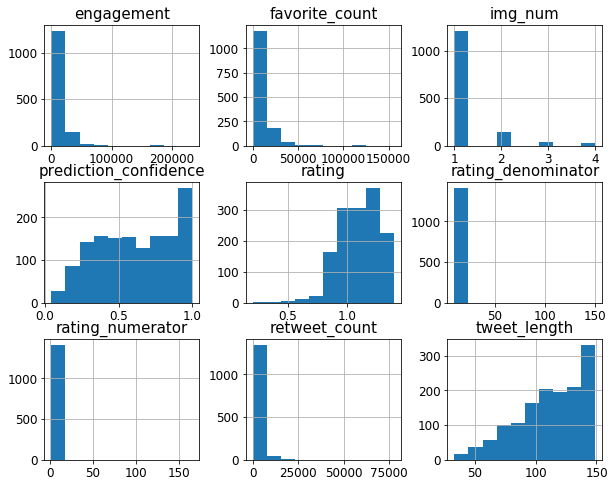

In [230]:
# Let's first quickly review the histogram of all the numerical variables in the dataset
df.hist(figsize=(10,8));

### UNIVARIATE ANALYSIS

#### 1. What is the distribution of favorite count? What is the highest favorite count a WeRateDogs Tweet has ever received?

In [231]:
# Let's check how many unique values are in the "favorite_count" column
df.favorite_count.nunique()

1351

Even though "favorite_count" column is an integer type, since it has so many unique values, we will use a histogram instead of bar chart to analyze its distribution.

In [232]:
# Let's define the function for Histograms of Quantitative Continuous Values

def func_hist(x,var_name, xlabel,ylabel):
    fig,ax = plt.subplots(figsize=(15,8))
    plt.hist(x, bins='auto')
    plt.title('Histogram of {}'.format(var_name), fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_xlim(0,)
    ax.set_ylim(0,)
    
    return plt.show();

It's importat to notice that we chose the "auto" method to select the number of bins of histograms. These auto method chooses the maximum number of bins between the "Sturges" and "Freedman Diaconis" estimators.

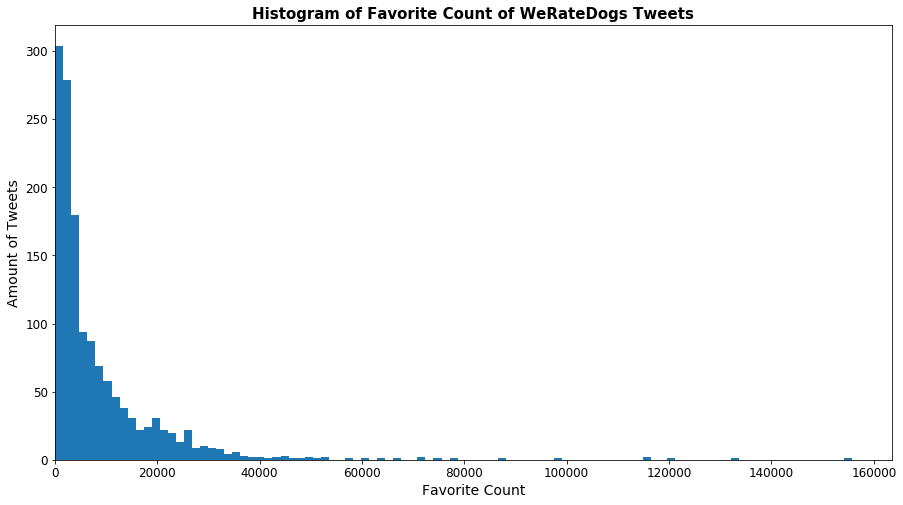

In [233]:
# Let's see the histogram in detail for "favorite_count" column
func_hist(df['favorite_count'], 'Favorite Count of WeRateDogs Tweets', 'Favorite Count', 'Amount of Tweets')

We can see that the distribution of Favorite Count of WeRateDogs Tweets is skewed to the right. This shows that most of the rating Tweets of WeRateDogs in our clean dataset have a lower favorite count (less than 40,000) compared to the minimum amount of Tweets who have a favorite count over 40,000. This higher-favorite-count Tweets can even have over 100,000 favorites.

In [234]:
# Let's define the function for Boxplot of Quantitative Continuous Values

def func_box(X, var_name, xlabel, decimal=0):
    fig, ax = plt.subplots(figsize=(16,6))
    bp = plt.boxplot(X, vert=False, showmeans=True)
    plt.title('Boxplot of {}'.format(var_name), fontweight="bold")
    plt.xlabel(xlabel)
    plt.yticks([1],["Boxplot"], rotation=90, verticalalignment="center")
    ax.grid(b=True, axis='x')
    
    # Adding mean label
    if abs(X.mean() - X.median()) < 0.1:
        ax.text(X.mean(), 1.02, '%.2f' %(X.mean()),color='green')
    elif abs(X.mean() - X.median()) < 1:
        ax.text(X.mean(), 1.02, '%.1f' %(X.mean()),color='green')
    else:
        ax.text(X.mean(), 1.02, '%.0f' %(X.mean()),color='green')
    
    # Adding median label
    x, y = bp['medians'][0].get_xydata()[1] 
    if abs(X.mean() - X.median()) < 0.1:
        ax.text(x, y+0.01, '%.2f' % x, horizontalalignment='center')
    elif abs(X.mean() - X.median()) < 1:
        ax.text(x, y+0.01, '%.1f' % x, horizontalalignment='center')
    else:
        ax.text(x, y+0.01, '%.0f' % x, horizontalalignment='center')
    
    if decimal == 0:
        # Adding quantiles labels
        x, y = bp['boxes'][0].get_xydata()[0]
        ax.text(x,y-0.01, '%.0f' % x, horizontalalignment='center', verticalalignment='top')
        x, y = bp['boxes'][0].get_xydata()[3] 
        ax.text(x,y-0.01, '%.0f' % x, horizontalalignment='center', verticalalignment='top')

        # Adding whiskers labels
        x, y = bp['caps'][0].get_xydata()[0]
        ax.text(x,y-0.01, '%.0f' % x, horizontalalignment='center', verticalalignment='top')
        x, y = bp['whiskers'][1].get_xydata()[1] 
        ax.text(x,y-0.05, '%.0f' % x, horizontalalignment='center', verticalalignment='top')

    else:
        # Adding quantiles labels
        x, y = bp['boxes'][0].get_xydata()[0]
        ax.text(x,y-0.01, '%.1f' % x, horizontalalignment='center', verticalalignment='top')
        x, y = bp['boxes'][0].get_xydata()[3] 
        ax.text(x,y-0.01, '%.1f' % x, horizontalalignment='center', verticalalignment='top')

        # Adding whiskers labels
        x, y = bp['caps'][0].get_xydata()[0]
        ax.text(x,y-0.01, '%.1f' % x, horizontalalignment='center', verticalalignment='top')
        x, y = bp['whiskers'][1].get_xydata()[1] 
        ax.text(x,y-0.05, '%.1f' % x, horizontalalignment='center', verticalalignment='top') 
                
    # Setting xlim
    if X.min() > 0.01:
        if X.max()- X.min() < 2000 * X.min():
            ax.set_xlim(0,)
    return plt.show();

In [235]:
# Let's look at the statistical summary of "favorite_count" column
df.favorite_count.describe()

count      1421.000000
mean       8713.197748
std       12634.787487
min          70.000000
25%        2044.000000
50%        4130.000000
75%       10883.000000
max      155733.000000
Name: favorite_count, dtype: float64

We can see above that the highest favorite count a WeRateDogs Tweet has ever received, in our clean dataset, is 155,733.

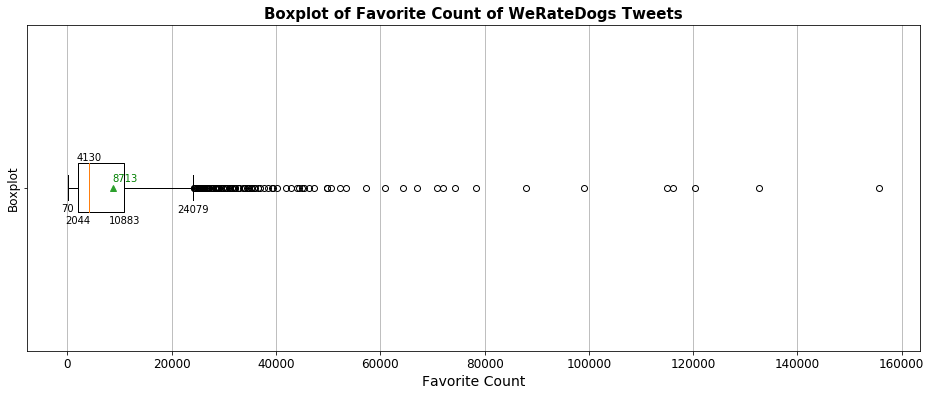

In [236]:
# Let's see the boxplot of "favorite_count" column
func_box(df['favorite_count'], 'Favorite Count of WeRateDogs Tweets', 'Favorite Count')

If we look at the boxplot of Favorite Count of WeRateDogs Tweets, we can see that the majority of Tweets in our clean dataset (between 25% and 75% percentile) had a favorite count between 2,044 and 10,883.
<br><br>
Also, it's worth noticing that since we have a great amount of outliers with high values, the mean (8,713) is much greater than the median (4,130). We should take this into consideration when deciding to use median or mean for our analysis.

#### 2. What is the distribution of retweet count? What is the highest retweet count a WeRateDogs Tweet has ever received?

In [237]:
# Let's check how many unique values are in the "retweet_count" column
df.retweet_count.nunique()

1206

Even though "retweet_count" column is an integer type, since it has so many unique values, we will use a histogram instead of bar chart to analyze its distribution.

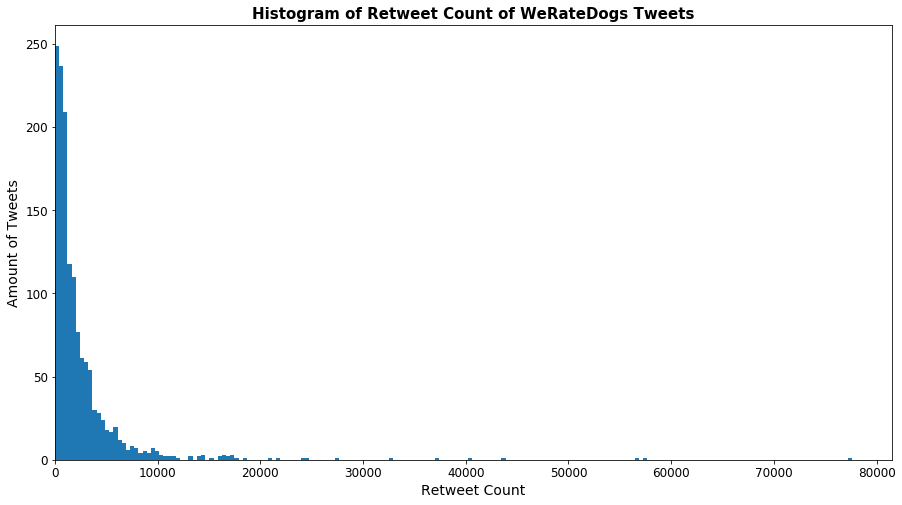

In [238]:
# Let's see the histogram in detail for "retweet_count" column
func_hist(df['retweet_count'], 'Retweet Count of WeRateDogs Tweets', 'Retweet Count', 'Amount of Tweets')

We can see that the distribution of Retweet Count of WeRateDogs Tweets is skewed to the right. This shows that most of the rating Tweets of WeRateDogs in our clean dataset have a lower retweet count (less than 20,000) compared to the minimum amount of Tweets who have a favorite count over 20,000. This higher-retweet-count Tweets can even have over 60,000 retweets.

In [239]:
# Let's look at the statistical summary of "retweet_count" column
df.retweet_count.describe()

count     1421.000000
mean      2503.484166
std       4531.395788
min         11.000000
25%        592.000000
50%       1278.000000
75%       2881.000000
max      77599.000000
Name: retweet_count, dtype: float64

We can see above that the highest retweet count a WeRateDogs Tweet has ever received, in our clean dataset, is 77,599.

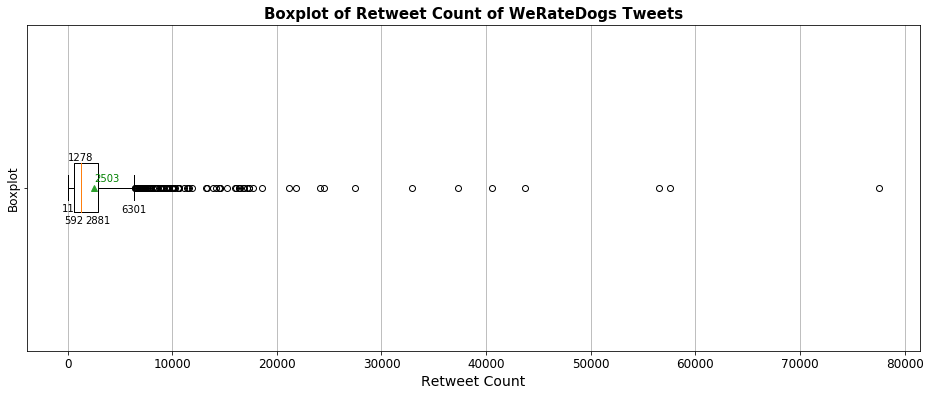

In [240]:
# Let's see the boxplot of "retweet_count" column
func_box(df['retweet_count'], 'Retweet Count of WeRateDogs Tweets', 'Retweet Count')

If we look at the boxplot of Retweet Count of WeRateDogs Tweets, we can see that the majority of Tweets in our clean dataset (between 25% and 75% percentile) had a retweet count between 592 and 2,881.
<br><br>
Also, it's worth noticing that since we have a great amount of outliers with high values, the mean (2,503) is much greater than the median (1,278). We should take this into consideration when deciding to use median or mean for our analysis.

#### 3. What is the distribution of rating's numerator?

Since "rating_numerator" column is a float type, let's plot a histogram to analyze its distribution.

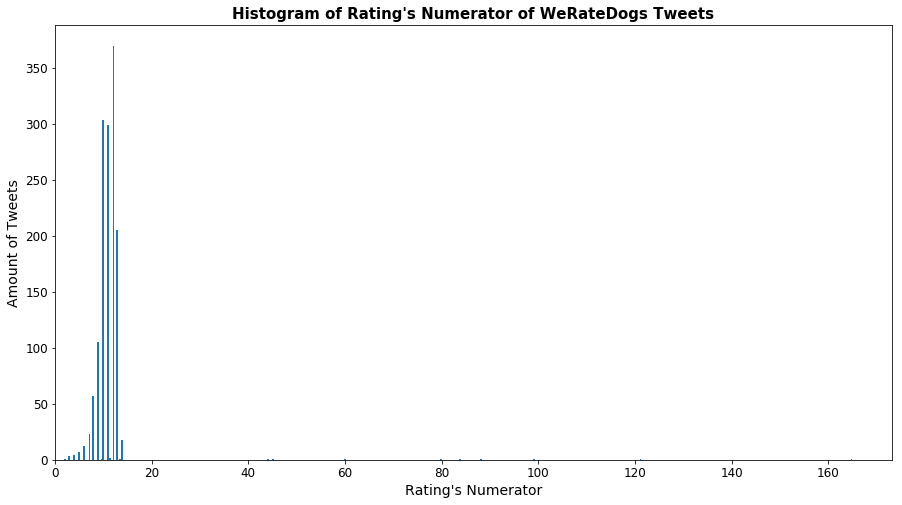

In [241]:
# Let's see the histogram in detail for "rating_numerator" column
func_hist(df['rating_numerator'], 'Rating\'s Numerator of WeRateDogs Tweets', 'Rating\'s Numerator', 'Amount of Tweets')

We can see that the distribution of Rating's Numerator of WeRateDogs Tweets is skewed to the right. This shows that most of the rating Tweets of WeRateDogs in our clean dataset have a lower numerator (less than 20) compared to the minimum amount of Tweets who have a numerator over 20. This higher-numerator Tweets can even be over 160.

In [242]:
# Let's look at the statistical summary of "rating_numerator" column
df.rating_numerator.describe()

count    1421.000000
mean       11.410120
std         6.918639
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max       165.000000
Name: rating_numerator, dtype: float64

We can see above that the highest Rating's Numerator a WeRateDogs Tweet has ever given, in our clean dataset, is 165.

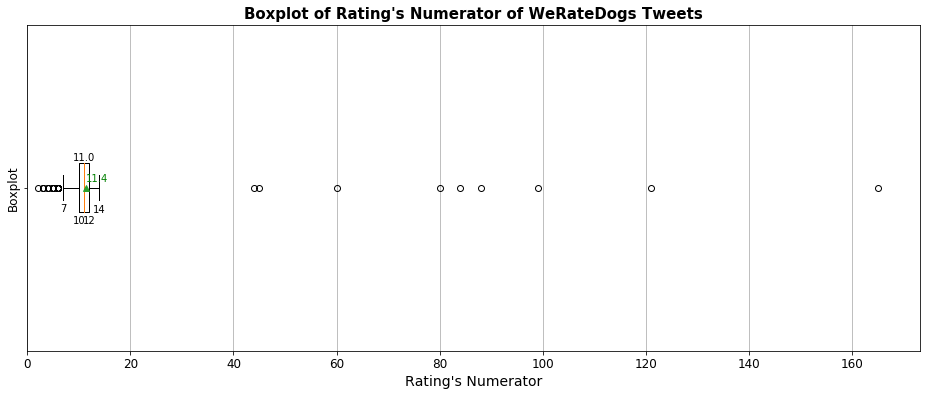

In [243]:
# Let's see the boxplot of "rating_numerator" column
func_box(df['rating_numerator'], 'Rating\'s Numerator of WeRateDogs Tweets', 'Rating\'s Numerator')

If we look at the boxplot of Rating's Numerator of WeRateDogs Tweets, we can see that the majority of rating Tweets in our clean dataset (between 25% and 75% percentile) had a numerator between 10 and 12.
<br><br>
Also, it's worth noticing that since we have some outliers with high values, the mean (11.4) is greater than the median (11). We should take this into consideration when deciding to use median or mean for our analysis.

#### 4. What is the distribution of rating's denominator?

In [244]:
# Let's do value counts of "rating_denominator" column
df.rating_denominator.value_counts()

10.0     1412
50.0        2
80.0        2
150.0       1
110.0       1
40.0        1
90.0        1
70.0        1
Name: rating_denominator, dtype: int64

Even though the "rating_denominator" column is a float type, we will use a bar chart to analyze its distribution given the few unique values it has.

In [245]:
# Let's define the function for bar chart
def func_bar(X,title,xlabel,ylabel):
    fig, ax = plt.subplots(figsize=(15,6))
    X.plot.bar(color='lightblue')
    plt.title(title, fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_xlabel(xlabel, labelpad=15)
    ax.set_ylabel(ylabel, labelpad=15)
    plt.xticks(rotation=0)
    return plt.show();    

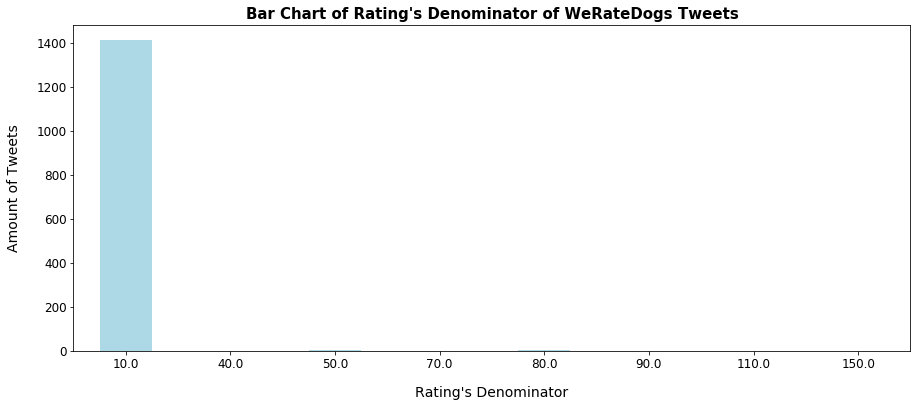

In [246]:
# Let's see the bar chart of "rating_denominator" column
ej1 = df['rating_denominator'].value_counts().sort_index()
func_bar(ej1, 'Bar Chart of Rating\'s Denominator of WeRateDogs Tweets', 'Rating\'s Denominator', 'Amount of Tweets')

We can see that the distribution of Rating's Denominator of WeRateDogs Tweets is skewed to the right. This shows that most of the rating Tweets of WeRateDogs in our clean dataset have a denominator equal to 10 compared to the minimum amount of Tweets who have a denominator over 10. This higher-denominator Tweets can even be over 100.

In [247]:
# Let's look at the statistical summary of "rating_denominator" column
df.rating_denominator.describe()

count    1421.000000
mean       10.443350
std         6.122039
min        10.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       150.000000
Name: rating_denominator, dtype: float64

We can see above that the highest Rating's Denominator a WeRateDogs Tweet has ever given, in our clean dataset, is 150.

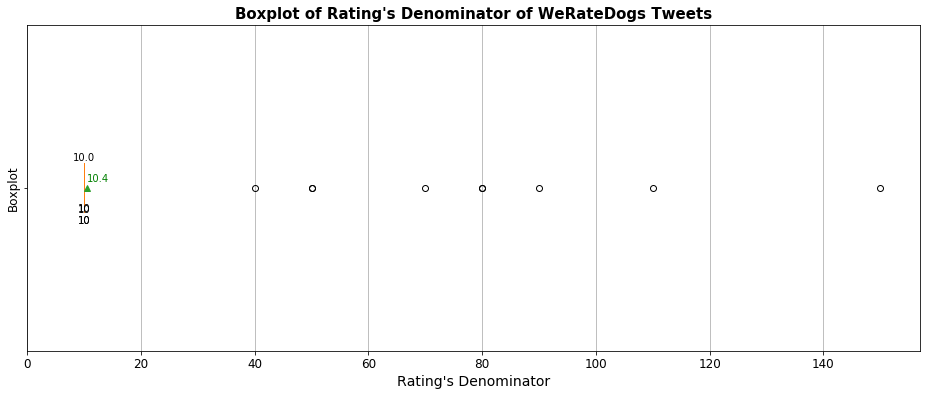

In [248]:
# Let's see the boxplot of "rating_denominator" column
func_box(df['rating_denominator'], 'Rating\'s Denominator of WeRateDogs Tweets', 'Rating\'s Denominator')

If we look at the boxplot of Rating's Denominator of WeRateDogs Tweets, we can see that the majority of rating Tweets in our clean dataset (between 25% and 75% percentile) had a denominator of 10.
<br><br>
Also, it's worth noticing that since we have some outliers with high values, the mean (10.4) is greater than the median (10). We should take this into consideration when deciding to use median or mean for our analysis.

####  5. What is the distribution of rating? 

Since "rating" column is a float type, let's plot a histogram to analyze its distribution.

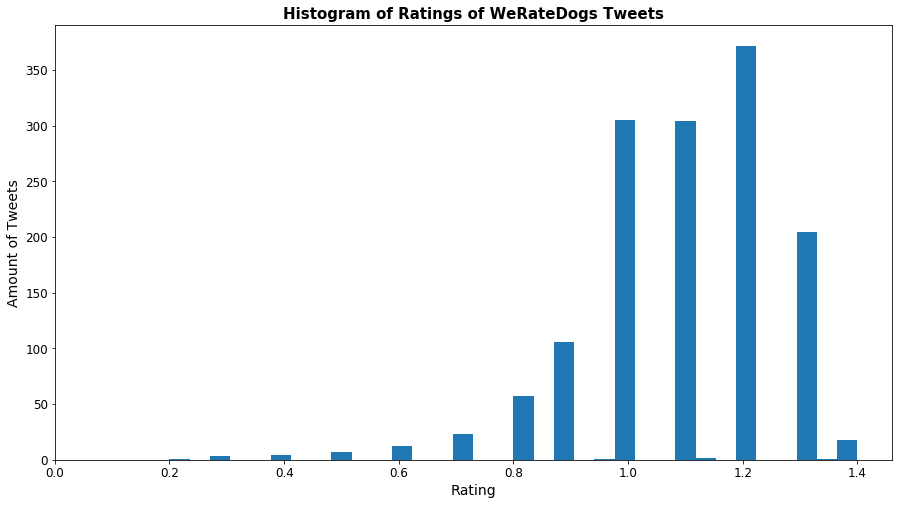

In [249]:
# Let's see the histogram in detail for "rating" column
func_hist(df['rating'], 'Ratings of WeRateDogs Tweets', 'Rating', 'Amount of Tweets')

We can see that the distribution of Ratings of WeRateDogs Tweets is skewed to the left. This shows that most of the Tweets of WeRateDogs in our clean dataset have a higher rating value (more than 0.8) compared to the minimum amount of Tweets who have a rating less than 0.8.

In [250]:
# Let's look at the statistical summary of "rating" column
df.rating.describe()

count    1421.000000
mean        1.092595
std         0.167525
min         0.200000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating, dtype: float64

We can see above that the highest Rating a WeRateDogs Tweet has ever given, in our clean dataset, is 1.4.

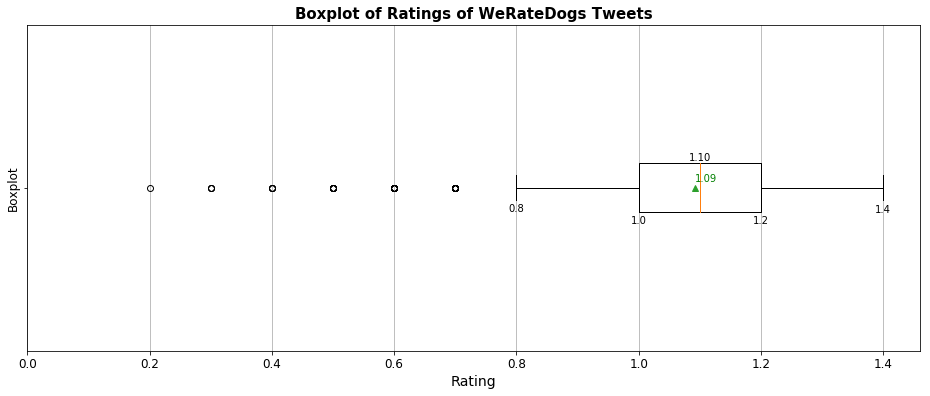

In [251]:
# Let's see the boxplot of "rating" column
func_box(df['rating'], 'Ratings of WeRateDogs Tweets', 'Rating', decimal=1)

If we look at the boxplot of Ratings of WeRateDogs Tweets, we can see that the majority of Tweets in our clean dataset (between 25% and 75% percentile) had a rating between 1 and 1.2.
<br><br>
Also, it's worth noticing that since we have some outliers with low values, the mean (1.09) is a little bit smaller than the median (1.10).

#### 6. What is the distribution of Tweet length (without the picture link)? What's the average tweet length of WeRateDogs? 

In [252]:
# Let's do value counts of "tweet_length" column
df['tweet_length'].value_counts()

141    119
140     92
138     50
139     46
117     44
116     31
137     28
113     27
114     25
136     23
135     23
134     23
115     23
94      20
108     20
99      19
131     18
128     18
132     18
100     18
109     17
110     16
111     16
104     16
101     16
119     16
95      16
121     15
112     15
124     15
      ... 
86       6
63       6
62       6
68       6
66       5
60       5
47       4
42       4
52       4
53       4
54       4
40       4
58       4
70       4
82       4
61       3
41       3
57       2
59       2
51       2
50       2
48       2
39       2
36       1
37       1
149      1
45       1
46       1
49       1
33       1
Name: tweet_length, Length: 107, dtype: int64

Even though "tweet_length" column is an integer type, since it has many unique values, we decided to use a Histogram to analyze its distribution.

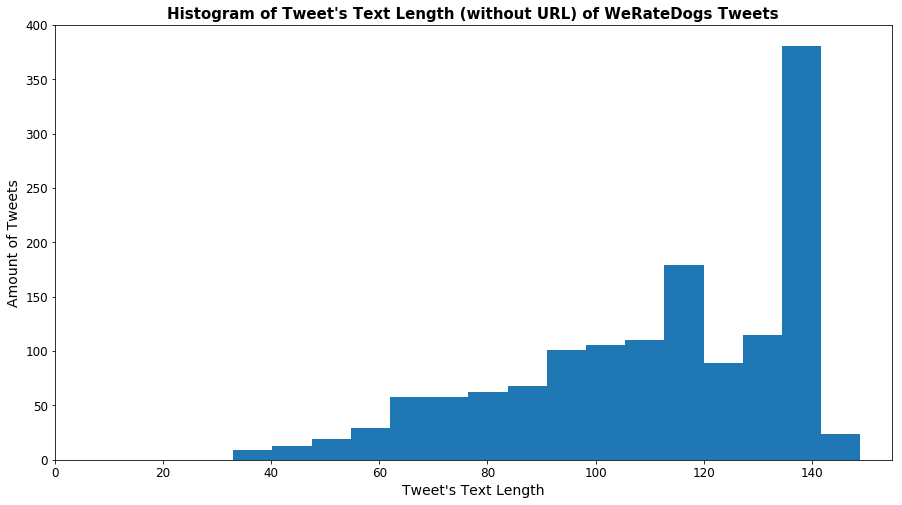

In [253]:
# Let's see the histogram in detail for "tweet_length" column
func_hist(df['tweet_length'], 'Tweet\'s Text Length (without URL) of WeRateDogs Tweets', 'Tweet\'s Text Length', 'Amount of Tweets')

We can see that the distribution of Tweet's Text Length (without URL) of WeRateDogs is skewed to the left. This shows that most of the rating Tweets of WeRateDogs in our clean dataset have a higher text length (more than 80) compared to the minimum amount of Tweets who have a text length less than 80.

In [254]:
# Let's look at the statistical summary of "tweet_length" column
df.tweet_length.describe()

count    1421.000000
mean      111.289937
std        26.417884
min        33.000000
25%        94.000000
50%       116.000000
75%       137.000000
max       149.000000
Name: tweet_length, dtype: float64

We can see above that the average WeRateDogs Tweet's Text Length, in our clean dataset, is 111.29.

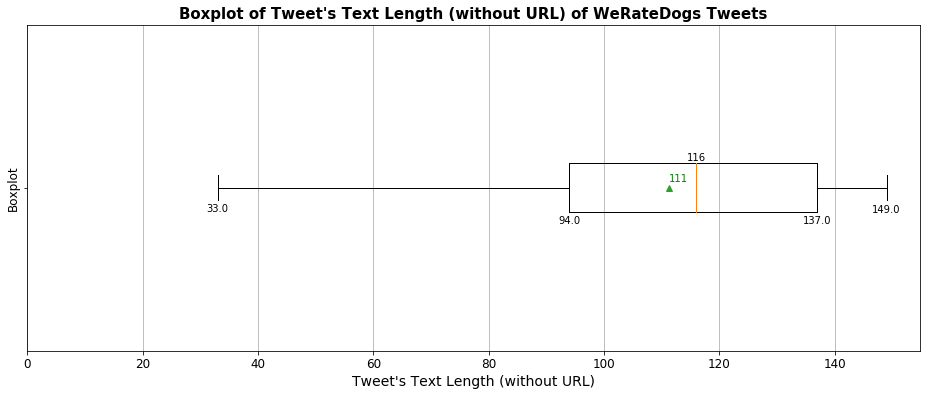

In [255]:
# Let's see the boxplot of "tweet_length" column
func_box(df['tweet_length'], 'Tweet\'s Text Length (without URL) of WeRateDogs Tweets', 'Tweet\'s Text Length (without URL)', decimal=1)

If we look at the boxplot of Tweet's Text Length (without URL) of WeRateDogs, we can see that the majority of Tweets in our clean dataset (between 25% and 75% percentile) had a Text Length between 94 and 137.
<br><br>
Also, it's worth noticing that since we have more Tweets with short Text Length, the mean (111) is smaller than the median (116).

#### 7. What is the distribution of Tweet's image number used for prediction?

Since "img_num" column is an integer type, let's plot a bar chart to analyze its distribution.

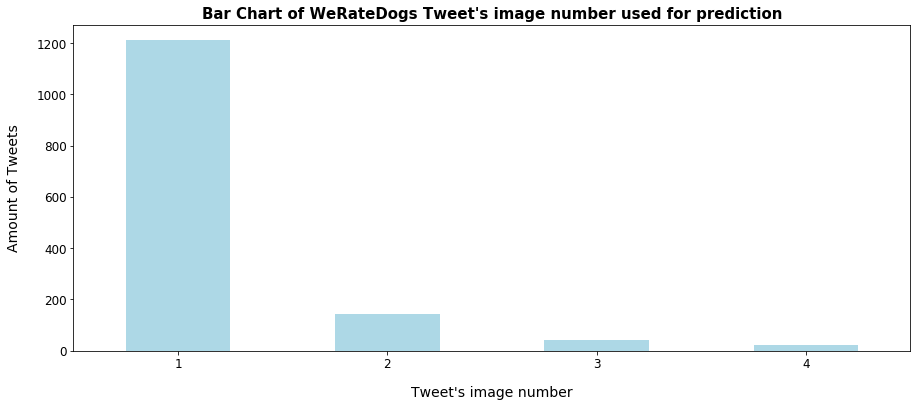

In [256]:
# Let's see the bar chart of "img_num" column
ej2 = df['img_num'].value_counts().sort_index()
func_bar(ej2, 'Bar Chart of WeRateDogs Tweet\'s image number used for prediction', 'Tweet\'s image number', 'Amount of Tweets')

We can see that the distribution of "WeRateDogs Tweet's image number used for prediction" is skewed to the right. This shows that most of the rating Tweets of WeRateDogs in our clean dataset used the first image for the breed prediction compared to the minimum amount of Tweets who used the other images.

In [257]:
# Let's look at the statistical summary of "img_num" column
df.img_num.describe()

count    1421.000000
mean        1.211823
std         0.573623
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: img_num, dtype: float64

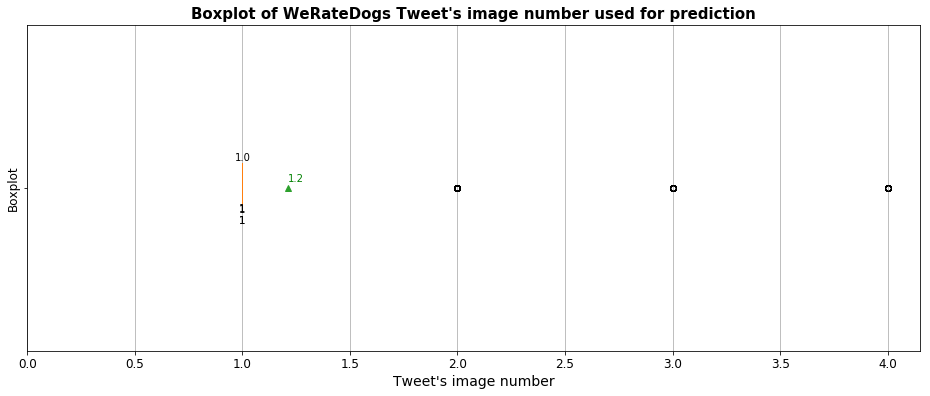

In [258]:
# Let's see the boxplot of "img_num" column
func_box(df['img_num'], 'WeRateDogs Tweet\'s image number used for prediction', 'Tweet\'s image number')

If we look at the boxplot of "WeRateDogs Tweet's image number used for prediction", we can see that the majority of rating Tweets in our clean dataset (between 25% and 75% percentile) used the first image for the breed prediction.
<br><br>
Also, it's worth noticing that since we have outliers with high values, the mean (1.2) is greater than the median (1).

#### 8. What is the distribution of #1 prediction confidence?

Since "prediction_confidence" column is a float type, let's plot a histogram to analyze its distribution.

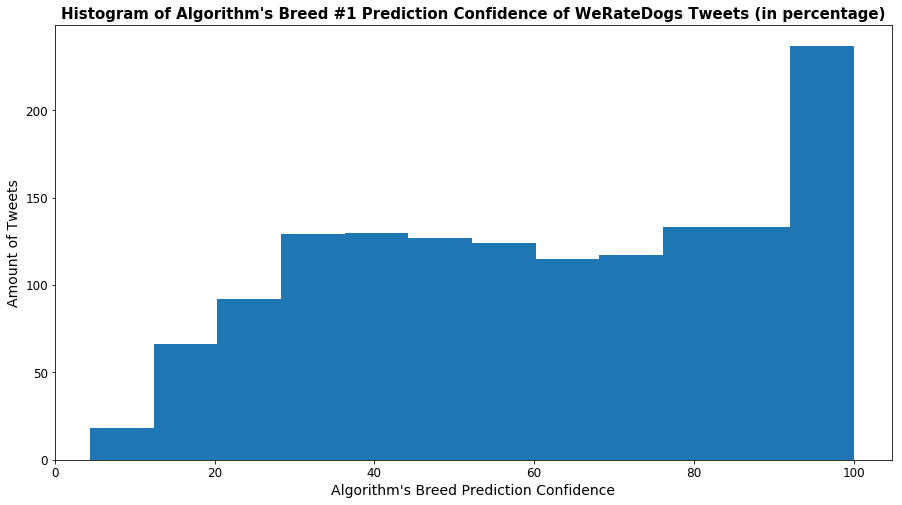

In [259]:
# Let's see the histogram in detail for "prediction_confidence" column
func_hist(df['prediction_confidence']*100, 'Algorithm\'s Breed #1 Prediction Confidence of WeRateDogs Tweets (in percentage)', 'Algorithm\'s Breed Prediction Confidence', 'Amount of Tweets')

We can see that the distribution of "Algorithm's #1 Breed Prediction Confidence of WeRateDogs Tweets" is skewed to the left. This shows that most of the Algorithm's Breed #1 Predictions of WeRateDogs Tweets in our clean dataset have a higher prediction confidence (more than 40%), compared to the minimum amount of predictions who have a confidence less than 40%.

In [260]:
# Let's look at the statistical summary of "prediction_confidence" column
df.prediction_confidence.describe()

count    1421.000000
mean        0.613972
std         0.260301
min         0.044333
25%         0.389513
50%         0.615163
75%         0.850050
max         0.999956
Name: prediction_confidence, dtype: float64

We can see above that the highest "Algorithm's Breed Prediction Confidence of WeRateDogs Tweets", in our clean dataset, is 99.9956%.

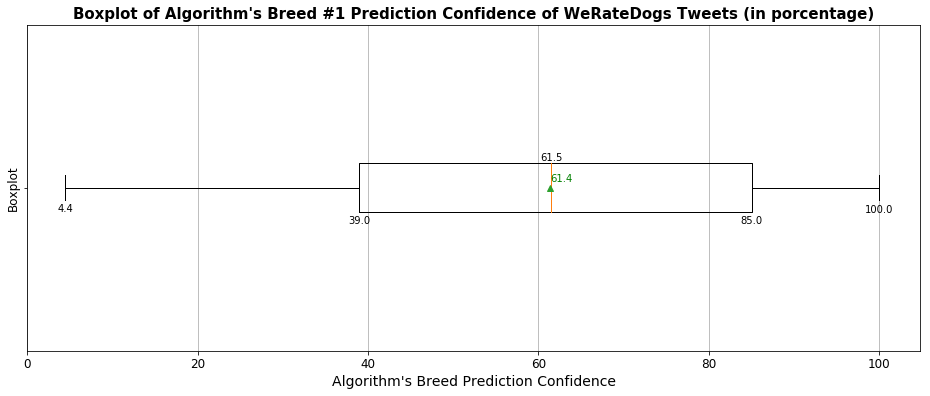

In [261]:
# Let's see the boxplot of "prediction_confidence" column
func_box(df['prediction_confidence']*100, 'Algorithm\'s Breed #1 Prediction Confidence of WeRateDogs Tweets (in porcentage)', 'Algorithm\'s Breed Prediction Confidence', decimal=1)

If we look at the boxplot of "Algorithm's Breed #1 Prediction Confidence of WeRateDogs Tweets", we can see that the majority of Algorithm's Breed #1 Predictions of WeRateDogs Tweets in our clean dataset (between 25% and 75% percentile) had a confidence between 39% and 85%.
<br><br>
Also, it's worth noticing that since we have more Tweets with smaller prediction confidence, the mean (61.4%) is a little bit smaller than the median (61.5%).

#### 9. Which dog stages are the most predominant among the tweets of WeRateDogs?

Since "dog_stage" column is a category type, let's use a bar chart to analyze its distribution.

In [262]:
# Let's define a new function for Bar Chart with mean value displayed, ticks sorted and labels in each bar
def func_bar1(X, Y, title, xlabel, ylabel, text_x, text_y, word_length, mean, meanlabel):
    fig, ax = plt.subplots(figsize=(15,7))
    
    plt.bar(np.arange(len(X)),Y,color='lightblue')
    
    if len(X)>=10:
        plt.xticks(np.arange(len(X)),X.str[:word_length]+'\n'+X.str[word_length:],rotation=45, fontsize=10)
    else:
        plt.xticks(np.arange(len(X)),X.str[:word_length]+'\n'+X.str[word_length:],rotation=0)
    plt.title(title, fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_xlabel(xlabel, labelpad=10)
    ax.set_ylabel(ylabel, labelpad=15)
    for i,v in enumerate(Y):
        if Y.dtypes == "int64":
            ax.text(i - text_x, v + text_y,str(v), color='blue')
        else:
            ax.text(i - text_x, v + text_y,'{:,.2f}'.format(v), color='blue')
    if mean is not None and meanlabel is not None:
        plt.hlines(mean, xmin=-0.4, xmax=len(X)-0.6, linestyles='dashed', label=meanlabel, color='grey')
        ax.text(len(X) - 0.6 - text_x, mean + text_y*2,'{:,.2f}'.format(mean), color='black')
        plt.legend()
    return plt.show();

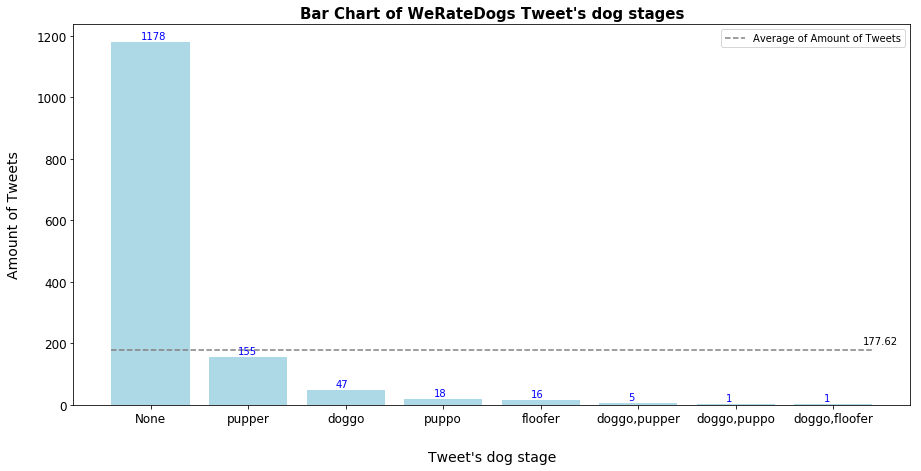

In [263]:
# Let's plot our Bar Chart of "dog_stage"
ej3 = df['dog_stage'].astype(str).value_counts()
x = pd.DataFrame(ej3.index.values, columns=['x']) 
y = pd.DataFrame(ej3.values, columns=['y'])
func_bar1(x['x'], y['y'], 'Bar Chart of WeRateDogs Tweet\'s dog stages', 'Tweet\'s dog stage', 'Amount of Tweets', 0.1, 10, 13, y.y.mean(), 'Average of Amount of Tweets')

In [264]:
# Let's get the number of Tweets that did not have a dog stage
no_ds_tweets = df[df['dog_stage'] == "None"]['tweet_id'].count() 

# Let's see the percentage of Tweets that did not have a dog stage
no_ds_tweets / df.shape[0] * 100

82.899366643209007

In [265]:
# Let's get the number of Tweets that have "pupper" as a dog stage
pupper_tweets = df[df['dog_stage'] == "pupper"]['tweet_id'].count()

# Let's see the percentage of Tweets that have "pupper" as a dog stage
pupper_tweets / df.shape[0] * 100

10.907811400422238

This shows that most of the rating Tweets of WeRateDogs in our clean dataset do not have a dog stage mentioned in it (83%). Out of the rating Tweets who do have a dog stage, the most prominent one is pupper with 155 Tweets (11%). 

#### 10. What breed (according to the prediction model) is the most frequent in WeRateDogs ratings?

In [266]:
# # Let's check the unique values of "dog_breed" column
df.dog_breed.nunique()

111

Since "dog_breed" column is a string type with too many levels, let's use a bar chart to plot the top10 breeds.

In [267]:
# Let's calculate the general dog breed's average mentions
mean = df['dog_breed'].value_counts().mean()
mean

12.801801801801801

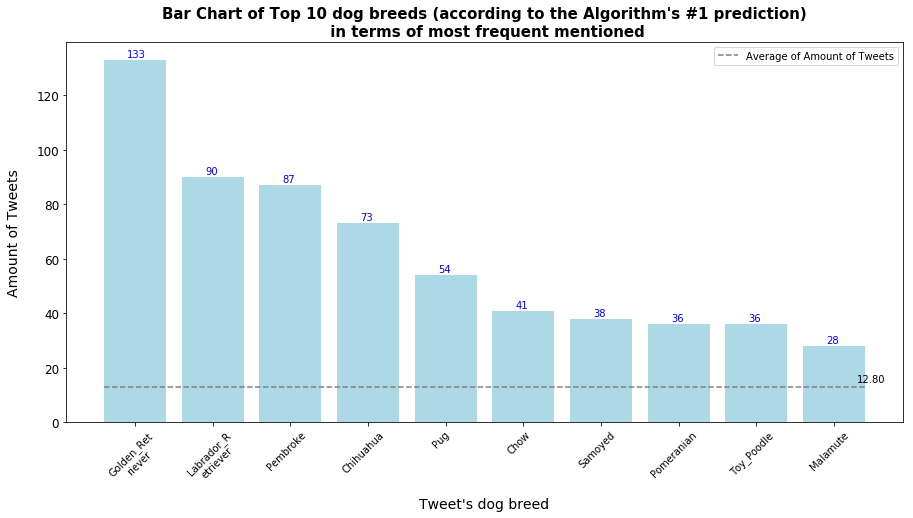

In [268]:
# Let's plot our Bar Chart of "dog_breed"
ej4 = df['dog_breed'].value_counts().head(10)
x = pd.DataFrame(ej4.index.values, columns=['x']) 
y = pd.DataFrame(ej4.values, columns=['y'])
title = 'Bar Chart of Top 10 dog breeds (according to the Algorithm\'s #1 prediction)\n in terms of most frequent mentioned'
func_bar1(x['x'], y['y'], title, 'Tweet\'s dog breed', 'Amount of Tweets', 0.1, 1, 10, mean, 'Average of Amount of Tweets')

In [269]:
# Let's check how many more Tweets are predicted as 'Golden Retriever' than the general mean
gr_tweets = df[df['dog_breed'] == "Golden_Retriever"]['tweet_id'].count() 
diff_tweets = (gr_tweets - mean)/mean
print(diff_tweets)

9.38916256158


In [270]:
# Let's check the percentage of Tweets that were predicted as 'Golden Retriever' 
gr_tweets / df.shape[0] * 100

9.3596059113300498

In our clean dataset, the dog breed most included in the WeRateDogs' rating Tweets, according to the Algorithm's #1 prediction, was  Golden Retriever with 133 Tweets (9%). This dog breed was mentioned 9 times more than the general average, according to the algorithm.

#### 11. What dog names are the most frequent in WeRateDogs ratings?

In [271]:
# Let's check the unique values of "dog_name" column
df.dog_name.nunique()

752

Since "dog_name" column is a string type with too many levels, let's use a bar chart to plot the top10 names.

In [272]:
# Let's calculate the general dog name's average tweet count
mean = df['dog_name'].value_counts().mean()
mean

1.8896276595744681

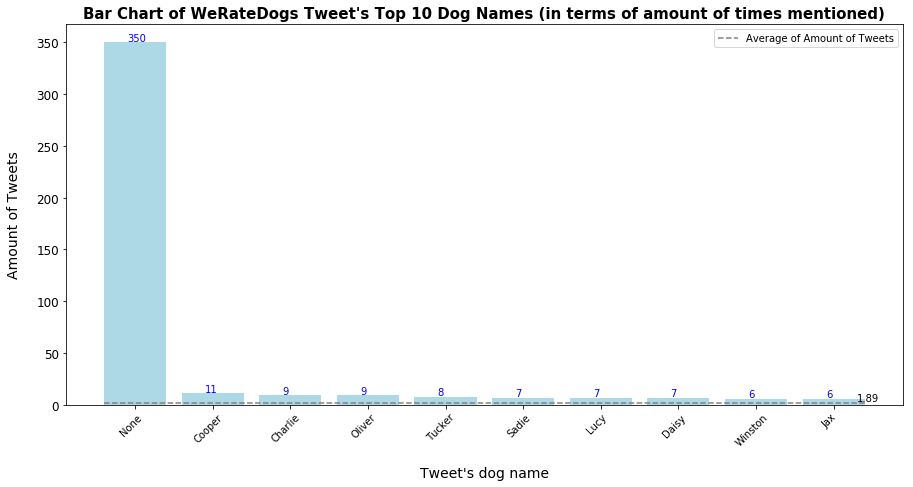

In [273]:
# Let's plot our Bar Chart of "dog_name"
ej5 = df['dog_name'].value_counts().head(10)
x = pd.DataFrame(ej5.index.values, columns=['x']) 
y = pd.DataFrame(ej5.values, columns=['y'])
title = 'Bar Chart of WeRateDogs Tweet\'s Top 10 Dog Names (in terms of amount of times mentioned)'
func_bar1(x['x'], y['y'], title, 'Tweet\'s dog name', 'Amount of Tweets', 0.1, 1, 10, mean, 'Average of Amount of Tweets')

In [274]:
# Let's check how many more Tweets have "Cooper" as dog name than the general mean
cooper_tweets = df[df['dog_name'] == "Cooper"]['tweet_id'].count() 
diff_tweets = (cooper_tweets - mean)/mean
print(diff_tweets)

4.82125263899


In [275]:
# Let's check the percentage of Tweets that did not have a dog name
df[df['dog_name'] == "None"]['tweet_id'].count() / df.shape[0] * 100

24.630541871921181

In [276]:
# Let's check the percentage of Tweets mentioned Cooper
cooper_tweets/df.shape[0]*100

0.77410274454609429

In our clean dataset, most WeRateDogs' rating Tweets did not include a dog name (25%). However, "Cooper" is the dog name most included in the WeRateDogs' rating Tweets with 11 Tweets (0.77%). This dog name was mentioned 4 times more than the general average.

#### 12. What Tweet source is the most used by WeRateDogs?

Since "tweet_source" column is a string type, let's plot a bar chart to analyze its distribution.

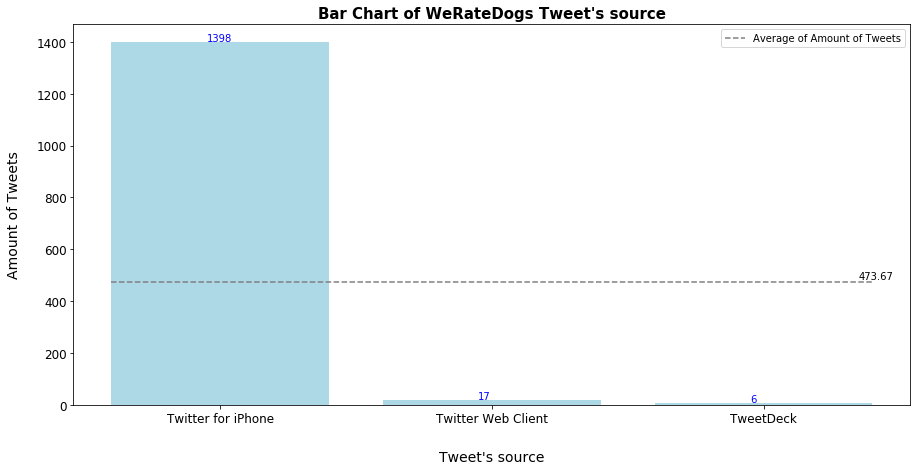

In [277]:
# Let's plot our Bar Chart of "tweet_source"
ej6 = df['tweet_source'].value_counts()
x = pd.DataFrame(ej6.index.values, columns=['x']) 
y = pd.DataFrame(ej6.values, columns=['y'])
func_bar1(x['x'], y['y'], 'Bar Chart of WeRateDogs Tweet\'s source', 'Tweet\'s source', 'Amount of Tweets', 0.05, 5, 18, y.y.mean(), 'Average of Amount of Tweets')

In [278]:
# Let's check how many more Tweets come from iPhone than the general mean
iphone_tweets = df[df['tweet_source'] == "Twitter for iPhone"]['tweet_id'].count() 
aveg_tweets = y.y.mean()
diff_tweets = ((iphone_tweets - aveg_tweets)/aveg_tweets)
print(diff_tweets)

1.95144264602


In [279]:
# Let's check how many Tweets come from iPhone in percentage
iphone_tweets/df.shape[0]*100

98.381421534130894

In our clean dataset, most WeRateDogs' rating Tweets come from iPhone, with 1398 Tweets (98%). This source was used in an amount of Tweets almost 2 times higher than the general average.

#### 13. Do WeRateDogs post in other languages besides English? If so, which are those?

Since "language" column is a string type, let's plot a bar chart to analyze its distribution.

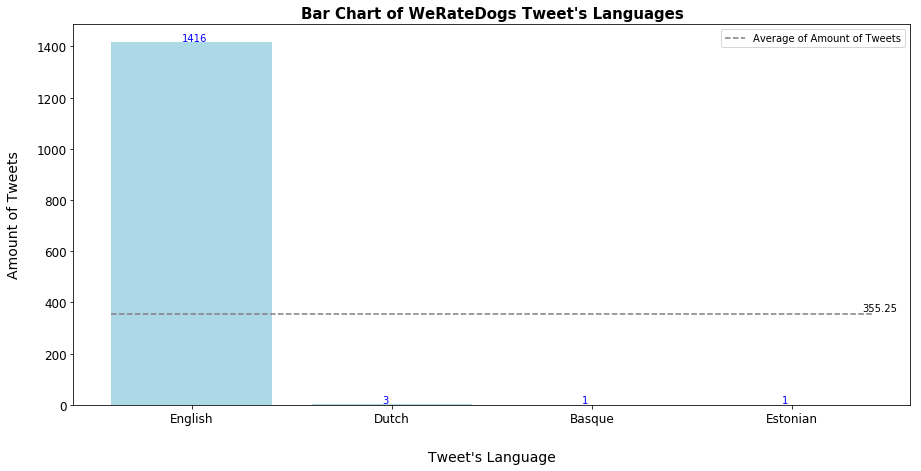

In [280]:
# Let's plot our Bar Chart of "language" column
ej7 = df['language'].value_counts()
x = pd.DataFrame(ej7.index.values, columns=['x']) 
y = pd.DataFrame(ej7.values, columns=['y'])
func_bar1(x['x'], y['y'], 'Bar Chart of WeRateDogs Tweet\'s Languages', 'Tweet\'s Language', 'Amount of Tweets', 0.05, 5, 18, y.y.mean(), 'Average of Amount of Tweets')

In [281]:
# Let's check how many more Tweets are in English than the general mean
en_tweets = df[df['language'] == "English"]['tweet_id'].count() 
aveg_tweets = y.y.mean()
diff_tweets = ((en_tweets - aveg_tweets)/aveg_tweets)
print(diff_tweets)

2.98592540464


In [282]:
# Let's check the percentage of Tweets in English
en_tweets/df.shape[0]*100

99.648135116115412

In our clean dataset, most WeRateDogs' rating Tweets are in English, with 1416 Tweets (99.6%). This language was used in an amount of Tweets almost 3 times higher than the general average.

### Multivariate Analysis

#### 1.	Has the retweet count per WeRateDogs' rating Tweet increased through the time?

In [283]:
# Let's check the retweet count per "timestamp" column
df.sort_values(by=['timestamp'])[['timestamp','retweet_count']]

,timestamp,retweet_count
1420,2015-11-15 22:32:08,460
1419,2015-11-15 23:05:30,42
1418,2015-11-15 23:21:54,41
1417,2015-11-16 00:04:52,131
1416,2015-11-16 00:24:50,40
1415,2015-11-16 00:30:50,51
1414,2015-11-16 00:49:46,220
1413,2015-11-16 01:01:59,53
1412,2015-11-16 01:22:45,197
1411,2015-11-16 01:52:02,52


Since "retweet_count" by "timestamp" would be too cramped in our bar chart, let's group by day and get the average of "retweet_count" per day, to check if it would be a better graph.

In [284]:
# Let's group by day and get the average of "retweet_count" per day
table = df.set_index('timestamp').resample("D")['retweet_count'].mean()
table

timestamp
2015-11-15      181.000000
2015-11-16       86.166667
2015-11-17      117.846154
2015-11-18      115.000000
2015-11-19     1490.777778
2015-11-20      324.615385
2015-11-21      311.333333
2015-11-22      403.083333
2015-11-23      347.461538
2015-11-24     1052.750000
2015-11-25      280.571429
2015-11-26      161.857143
2015-11-27      354.363636
2015-11-28      510.909091
2015-11-29      386.842105
2015-11-30      212.000000
2015-12-01     1392.166667
2015-12-02      902.125000
2015-12-03      606.250000
2015-12-04      419.571429
2015-12-05      563.555556
2015-12-06     1396.100000
2015-12-07      421.357143
2015-12-08      847.857143
2015-12-09      645.857143
2015-12-10      386.272727
2015-12-11      732.333333
2015-12-12      698.307692
2015-12-13      830.625000
2015-12-14     1149.666667
                  ...     
2017-07-03     6410.500000
2017-07-04    10547.000000
2017-07-05     5530.000000
2017-07-06     3997.500000
2017-07-07     4708.500000
2017-07-08     899

Since "retweet_count" by "day" would still be to cramped in our bar chart, let's group by week and get the average of "retweet_count" per week, to check if it would be a better graph.

In [285]:
# Let's group by week and get the average of "retweet_count" per week
table = df.set_index('timestamp').resample("W")['retweet_count'].mean()
table

timestamp
2015-11-15     181.000000
2015-11-22     465.336957
2015-11-29     420.096386
2015-12-06     831.272727
2015-12-13     642.802632
2015-12-20    1587.833333
2015-12-27    1909.829268
2016-01-03    1333.600000
2016-01-10    1229.200000
2016-01-17    1262.074074
2016-01-24     838.000000
2016-01-31    1283.600000
2016-02-07    1382.615385
2016-02-14    1160.480000
2016-02-21    1471.217391
2016-02-28    1226.555556
2016-03-06    1419.636364
2016-03-13    1319.518519
2016-03-20    1167.600000
2016-03-27    1999.833333
2016-04-03    1137.214286
2016-04-10    1614.357143
2016-04-17    1390.166667
2016-04-24    1263.333333
2016-05-01    1442.111111
2016-05-08    1101.454545
2016-05-15    1454.166667
2016-05-22    3468.125000
2016-05-29    1923.454545
2016-06-05    7322.214286
                 ...     
2017-01-15    7442.200000
2017-01-22    7434.384615
2017-01-29    5256.000000
2017-02-05    3231.466667
2017-02-12    6768.222222
2017-02-19    2969.777778
2017-02-26    3840.100000
20

This table looks better, so let's plot our bar chart to analyze data.

In [286]:
# Let's define the function for bar chart with datetime
def func_bar2(X,title,xlabel,ylabel,freq="weekly"):
    fig, ax = plt.subplots(figsize=(15,6))
    X.plot.bar(color='lightblue')
    plt.title(title, fontweight="bold")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if freq=="weekly":
        ticklabels = X.index.strftime('%Y-%m-%d')
    else:
        ticklabels = X.index.strftime('%Y-%m')
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    ax.set_xlabel(xlabel, labelpad=15)
    ax.set_ylabel(ylabel, labelpad=15)
    plt.xticks(fontsize=10)
    return plt.show(); 

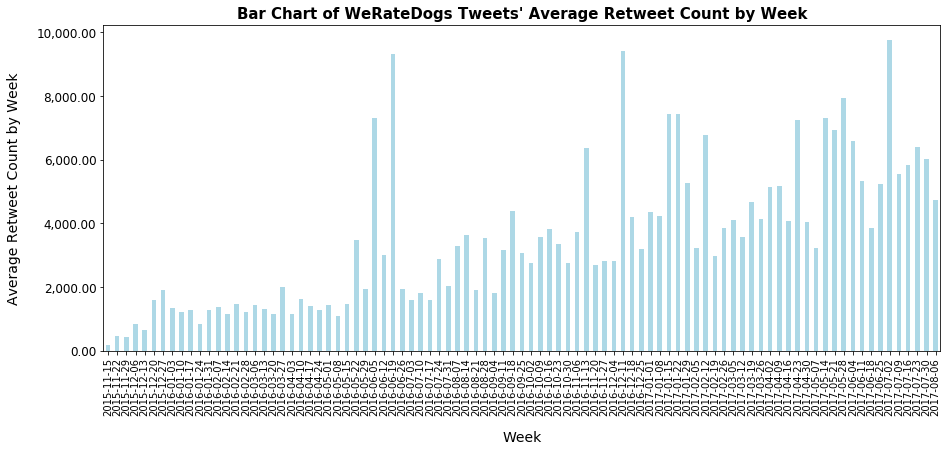

In [287]:
# Let's plot our bar chart
func_bar2(table, 'Bar Chart of WeRateDogs Tweets\' Average Retweet Count by Week', 'Week', 'Average Retweet Count by Week')

In the bar chart above we can notice that WeRateDogs Tweets' Weekly Retweet Count has increased through the time, increasing its weekly count from 181 in the second week of November 2015 to 5,848 in the second week of July 2017.

#### 2.	Has the favorite count per WeRateDogs' rating Tweet increased through the time?

Let's repeat the procedure with "favorite_count" column.

In [288]:
# Let's group by week and get the average of "favorite_count" per week
table = df.set_index('timestamp').resample("W")['favorite_count'].mean()
table

timestamp
2015-11-15      880.333333
2015-11-22     1188.804348
2015-11-29     1129.614458
2015-12-06     1860.848485
2015-12-13     1789.013158
2015-12-20     3660.214286
2015-12-27     4767.121951
2016-01-03     3886.166667
2016-01-10     3549.766667
2016-01-17     3485.592593
2016-01-24     2617.916667
2016-01-31     3612.640000
2016-02-07     3695.769231
2016-02-14     3389.320000
2016-02-21     4125.434783
2016-02-28     3840.166667
2016-03-06     4190.318182
2016-03-13     3896.111111
2016-03-20     3520.450000
2016-03-27     5855.000000
2016-04-03     3770.500000
2016-04-10     5064.214286
2016-04-17     4100.916667
2016-04-24     3783.666667
2016-05-01     4358.555556
2016-05-08     3893.454545
2016-05-15     4202.500000
2016-05-22    10773.375000
2016-05-29     5259.181818
2016-06-05    16014.285714
                  ...     
2017-01-15    22166.100000
2017-01-22    24165.076923
2017-01-29    17468.777778
2017-02-05    14547.466667
2017-02-12    25200.111111
2017-02-19    1393

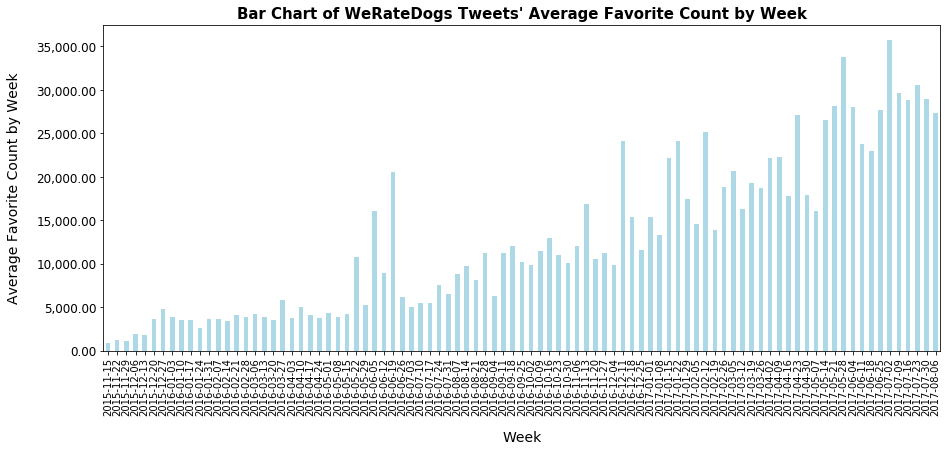

In [289]:
# Let's plot our bar chart
func_bar2(table, 'Bar Chart of WeRateDogs Tweets\' Average Favorite Count by Week', 'Week', 'Average Favorite Count by Week')

In the bar chart above we can notice that WeRateDogs Tweets' Weekly Favorite Count has increased through the time, increasing its weekly count from 880 in the second week of November 2015 to 28,798 in the second week of July 2017.

#### 3.	How many rates have given WeRateDogs through the months? Has it increased?

In [290]:
# Let's check the older date a Tweet was posted in df
df.timestamp.min()

Timestamp('2015-11-15 22:32:08')

In [291]:
# Let's check the most recent date a Tweet was posted in df
df.timestamp.max()

Timestamp('2017-08-01 00:17:27')

Since WeRateDogs' Tweets do no include the complete november 2015 and august 2017 months, let's only analyze full months (December 2015 - July 2017) for this question.

In [292]:
# Let's only get Tweets between December 2015 - July 2017
df_months = df[(df['timestamp'] >= '2015-12-01') & (df['timestamp'] <= '2017-07-31')]

In [293]:
# Let's calculate how many ratings Tweets were posted per month
table = df_months.set_index('timestamp').resample("M")['tweet_id'].count()
table

timestamp
2015-12-31    234
2016-01-31    119
2016-02-29     80
2016-03-31     88
2016-04-30     45
2016-05-31     40
2016-06-30     58
2016-07-31     66
2016-08-31     42
2016-09-30     48
2016-10-31     49
2016-11-30     43
2016-12-31     44
2017-01-31     51
2017-02-28     50
2017-03-31     34
2017-04-30     29
2017-05-31     32
2017-06-30     38
2017-07-31     43
Freq: M, Name: tweet_id, dtype: int64

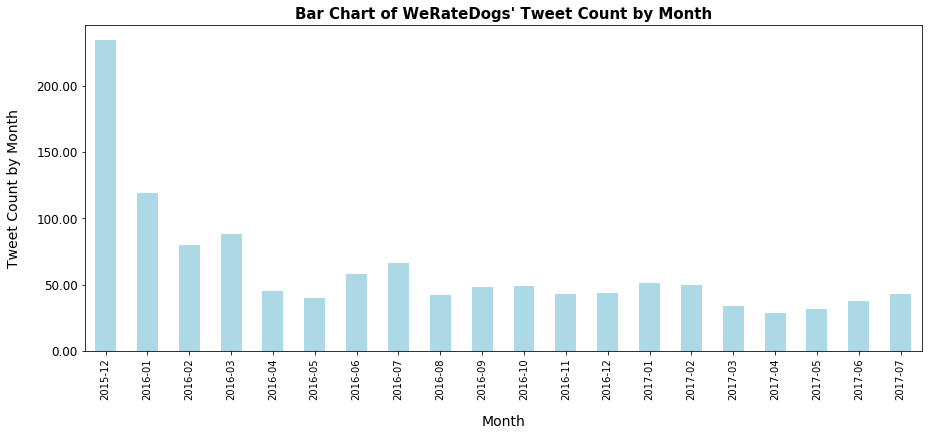

In [294]:
# Let's plot our bar chart
func_bar2(table, 'Bar Chart of WeRateDogs\' Tweet Count by Month', 'Month', 'Tweet Count by Month', freq="monthly")

In [295]:
print(table.min())
print(table.max())

july_mtc = table.loc['2017-07-31',]

# Let's check the decrease in Monthly Tweet Count in percentage
(july_mtc - table.max()) / table.max() * 100

29
234


-81.623931623931625

In the bar chart above we can notice that WeRateDogs' Monthly Tweet Count has decreased through the time, decreasing its monthly count from 234 in December 2015 to 43 in July 2017 (82% less).

#### 4.	What's the average monthly retweet count of WeRateDogs through the time? Has it increased?

In [296]:
# Let's get the monthly "retweet_count"
table1 = df_months.set_index('timestamp').resample("M")['retweet_count'].mean()
table1

timestamp
2015-12-31    1158.692308
2016-01-31    1168.411765
2016-02-29    1330.362500
2016-03-31    1359.613636
2016-04-30    1428.888889
2016-05-31    1949.525000
2016-06-30    4584.344828
2016-07-31    1998.060606
2016-08-31    2759.976190
2016-09-30    2950.312500
2016-10-31    3444.673469
2016-11-30    4002.744186
2016-12-31    4802.136364
2017-01-31    5713.352941
2017-02-28    3955.140000
2017-03-31    4479.294118
2017-04-30    5149.655172
2017-05-31    6265.562500
2017-06-30    5972.763158
2017-07-31    6135.000000
Freq: M, Name: retweet_count, dtype: float64

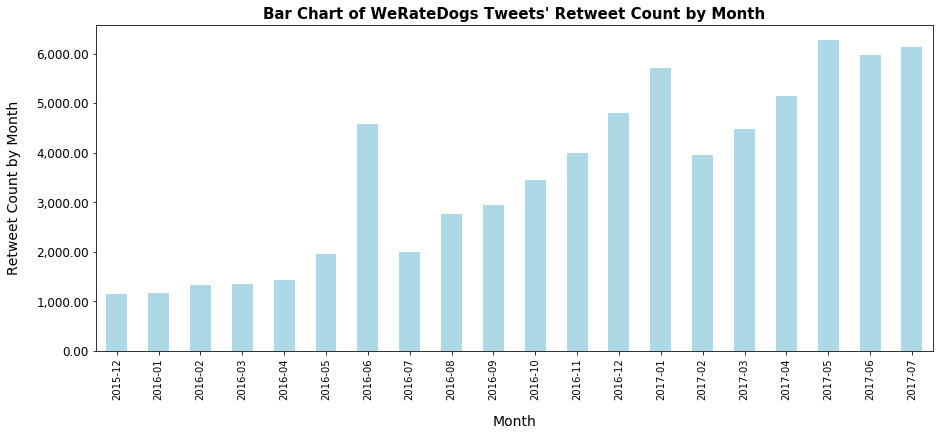

In [297]:
# Let's plot our bar chart
func_bar2(table1, 'Bar Chart of WeRateDogs Tweets\' Retweet Count by Month', 'Month', 'Retweet Count by Month', freq="monthly")

In [298]:
print(table1.min())
print(table1.max())

# Let's calculate the difference in monthly retweet counts
(table1.max() - table1.min())/ table1.min()

1158.69230769
6265.5625


4.4074429064595373

In the bar chart above we can notice that WeRateDogs Tweets' Monthly Retweet Count has increased through the time, increasing its monthly count from 1,159 in December 2015 to 6,135 in July 2017 (4 times higher).

#### 5.	What's the average monthly favorite count of WeRateDogs through the time? Has it increased?

In [299]:
# Let's get the monthly "favorite_count"
table2 = df_months.set_index('timestamp').resample("M")['favorite_count'].mean()
table2

timestamp
2015-12-31     2883.222222
2016-01-31     3345.394958
2016-02-29     3808.987500
2016-03-31     4085.125000
2016-04-30     4402.844444
2016-05-31     5865.150000
2016-06-30    11262.603448
2016-07-31     6092.924242
2016-08-31     8923.047619
2016-09-30     9685.375000
2016-10-31    11456.000000
2016-11-30    12889.674419
2016-12-31    15486.431818
2017-01-31    18371.705882
2017-02-28    17384.040000
2017-03-31    19619.088235
2017-04-30    21493.206897
2017-05-31    26187.031250
2017-06-30    27291.078947
2017-07-31    29819.744186
Freq: M, Name: favorite_count, dtype: float64

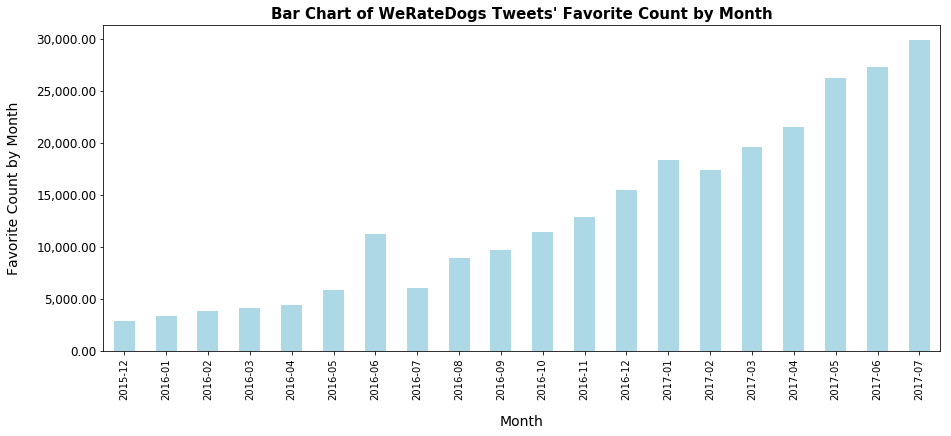

In [300]:
# Let's plot our bar chart
func_bar2(table2, 'Bar Chart of WeRateDogs Tweets\' Favorite Count by Month', 'Month', 'Favorite Count by Month', freq="monthly")

In [301]:
print(table2.min())
print(table2.max())

# Let's calculate the difference in monthly favorite counts
(table2.max() - table2.min())/ table2.min()

2883.22222222
29819.744186


9.3425063653481288

In the bar chart above we can notice that WeRateDogs Tweets' Monthly Favorite Count has increased through the time, increasing its monthly count from 2,883 in December 2015 to 29,820 in July 2017 (9 times higher).

#### 6.	What dog stage received the greatest monthly engagement (retweet count plus favorite count) through time?

In [302]:
# Let's get the monthly "engagement" by "dog_stage"
table3 = df_months.set_index('timestamp').groupby('dog_stage').resample("M")['engagement'].mean()
table3 = table3.reset_index()
table3['month'] = pd.to_datetime(table3['timestamp']).dt.to_period('m')
table3.drop(columns=['timestamp'],inplace=True)
table3

,dog_stage,engagement,month
0,None,3837.411765,2015-12
1,None,4806.942529,2016-01
2,None,5226.600000,2016-02
3,None,5347.157895,2016-03
4,None,5915.500000,2016-04
5,None,6346.827586,2016-05
6,None,9399.270833,2016-06
7,None,7778.729167,2016-07
8,None,11914.575000,2016-08
9,None,11876.974359,2016-09


In [303]:
# Let's reshape our table3 for our plot
table4 = table3.pivot(index='month', columns='dog_stage', values='engagement')
table4 = table4.fillna(0)
table4.head(5)

dog_stage,None,doggo,"doggo,floofer","doggo,pupper","doggo,puppo",floofer,pupper,puppo
month,,,,,,,,
2015-12,3837.411765,0.000000,0.0,0.0,0.0,0.0,4855.574468,0.0
2016-01,4806.942529,0.000000,0.0,0.0,0.0,2716.0,3783.566667,0.0
2016-02,5226.600000,0.000000,0.0,0.0,0.0,1624.0,4985.357143,0.0
2016-03,5347.157895,0.000000,0.0,0.0,0.0,0.0,6062.750000,0.0
2016-04,5915.500000,6009.666667,0.0,0.0,0.0,0.0,4902.500000,0.0


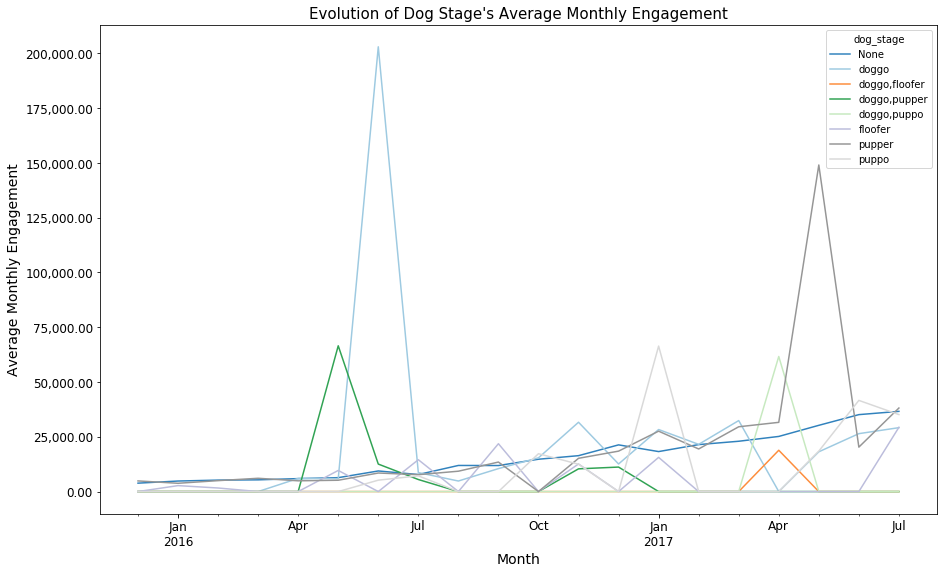

In [304]:
# Let's do our plot
table4.plot(figsize=(15, 9), title='Evolution of Dog Stage\'s Average Monthly Engagement', cmap='tab20c')
plt.ylabel("Average Monthly Engagement")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.xlabel("Month");

This graph is confusing given the amount of dog stages displaying, but we can spot that the "pupper" stage is somehow predominant in engagement through the majority of the months.

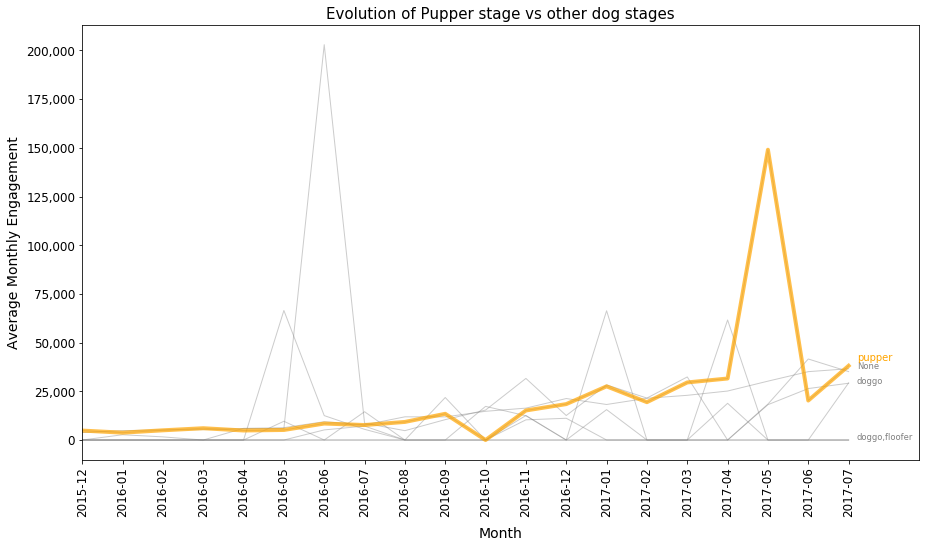

In [305]:
# Let's do a plot showcasing "pupper" stage
fig, ax = plt.subplots(figsize=(15,8))
 
# Multiple line plot
for column in table4:
    plt.plot(table4.index.strftime('%Y-%m').values, table4[column].values, marker='', color='grey', linewidth=1, alpha=0.4)
    
# Now we re do the "pupper" curve, but bigger with distinct color
plt.plot(table4.index.strftime('%Y-%m').values, table4['pupper'].values, marker='', color='orange', linewidth=4, alpha=0.7)

# Annotate the plot
num = 0
heights=[]
import math
for i in table4.values[-1].tolist(): 
    name = list(table4)[num]
    
    # We will avoid genre labels overlapping by only showing the first genre in alphabetical order
    if int(math.ceil(i / 10000.0)) * 10000 not in heights:
        heights.append(int(math.ceil(i / 10000.0)) * 10000)
        if name != 'pupper':
            ax.text(len(table4.index.strftime('%Y-%m').values)-0.8, i, name, horizontalalignment='left', size='small', color='grey')   
    num += 1
# Add a special annotation for the 'pupper' stage
ax.text(len(table4.index.strftime('%Y-%m').values)-0.8, list(table4['pupper'].values)[-1]+2800, 'pupper', horizontalalignment='left', color='orange')

# Add titles and labels
plt.title("Evolution of Pupper stage vs other dog stages")
plt.xlabel("Month", labelpad=10)
plt.ylabel("Average Monthly Engagement", labelpad=5)

# Seting x axis limits
ax.set_xlim(0, len(table4.index)+0.75)

# Format the ticks
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show();

In the line plot above we can see that the "Pupper" stage has received the greatest Average Monthly Engagement (retweet count plus favorite count) among other dog stages mentioned in WeRateDogs rating Tweets through the months, in our clean dataset. 

#### 7.	What dog stage was the most predominant (highest amount of Tweets) through time?

From question #9 in Univariate Analysis, we can expect to "None" dog stage Tweets to be the most predominant (highest amount of Tweets) through the months, but let's confirm it with a multi-line plot.

In [306]:
# Let's get the monthly Tweet count by "dog_stage"
table3 = df_months.set_index('timestamp').groupby('dog_stage').resample("M")['tweet_id'].count()
table3 = table3.reset_index()
table3['month'] = pd.to_datetime(table3['timestamp']).dt.to_period('m')
table3.drop(columns=['timestamp'],inplace=True)
table3

,dog_stage,tweet_id,month
0,None,187,2015-12
1,None,87,2016-01
2,None,65,2016-02
3,None,76,2016-03
4,None,38,2016-04
5,None,29,2016-05
6,None,48,2016-06
7,None,48,2016-07
8,None,40,2016-08
9,None,39,2016-09


In [307]:
# Let's reshape our table3 for our plot
table4 = table3.pivot(index='month', columns='dog_stage', values='tweet_id')
table4 = table4.fillna(0)
table4.head(5)

dog_stage,None,doggo,"doggo,floofer","doggo,pupper","doggo,puppo",floofer,pupper,puppo
month,,,,,,,,
2015-12,187.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0
2016-01,87.0,0.0,0.0,0.0,0.0,2.0,30.0,0.0
2016-02,65.0,0.0,0.0,0.0,0.0,1.0,14.0,0.0
2016-03,76.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
2016-04,38.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0


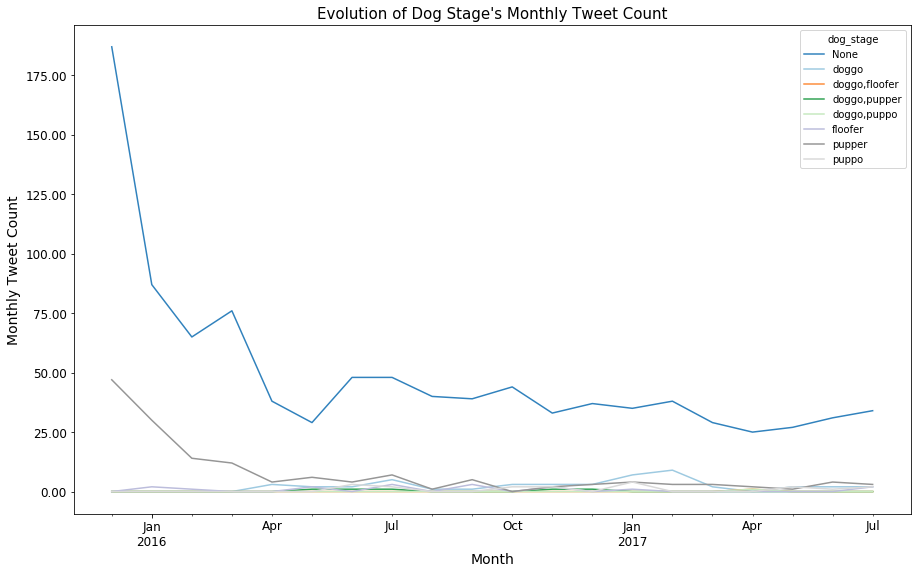

In [308]:
# Let's do our plot
table4.plot(figsize=(15, 9), title='Evolution of Dog Stage\'s Monthly Tweet Count', cmap='tab20c')
plt.ylabel("Monthly Tweet Count")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.xlabel("Month");

As expected, in our clean dataset, "None" dog stage Tweets were the most predominant (with highest amount of Tweets) through the months as seen in the line plot above.

#### 8.	What breeds of dogs (according to the prediction model) receive the highest average retweet count?

In [309]:
# Let's check how many unique values are in "dog_breed" column
df.dog_breed.nunique()

111

Since "dog_breed" column has too many unique levels, let's just display the Top 10 dog breeds in terms of highest average retweet count.

In [310]:
# Let's get the dog breed's general average retweet count
avg_rt_db = df.groupby('dog_breed').retweet_count.mean().mean()
avg_rt_db

2118.9068187976964

In [311]:
# Let's get the Top 10 dog breeds in terms of highest average retweet count
top10_breed_rt = df.groupby('dog_breed').retweet_count.mean().sort_values(ascending=False).head(10).reset_index()
top10_breed_rt

,dog_breed,retweet_count
0,Standard_Poodle,5855.714286
1,English_Springer,5277.666667
2,Afghan_Hound,5208.000000
3,Australian_Terrier,4844.000000
4,Eskimo_Dog,4810.500000
5,Flat-Coated_Retriever,4533.000000
6,Lakeland_Terrier,4508.428571
7,Saluki,4505.000000
8,Giant_Schnauzer,4491.500000
9,French_Bulldog,4275.400000


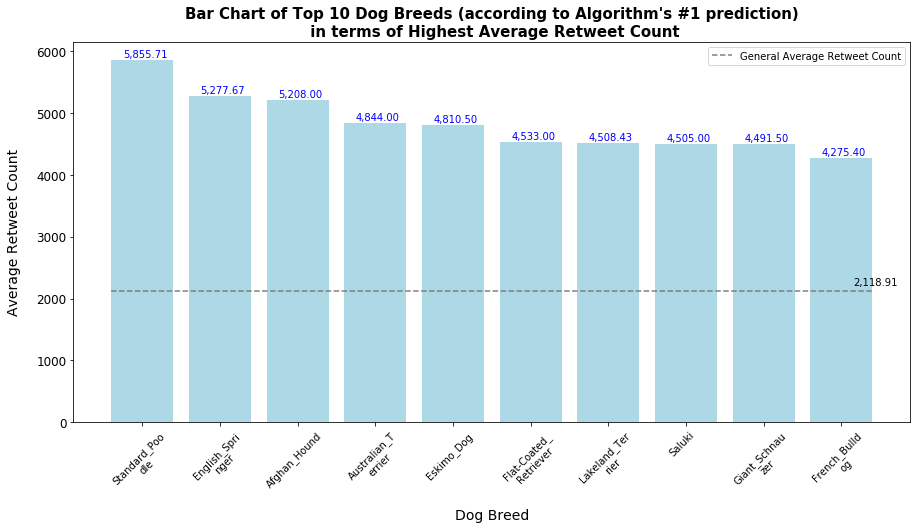

In [312]:
# Let's plot our bar chart
x = top10_breed_rt.dog_breed
y = top10_breed_rt.retweet_count
title = 'Bar Chart of Top 10 Dog Breeds (according to Algorithm\'s #1 prediction)\n in terms of Highest Average Retweet Count'
func_bar1(x, y, title, 'Dog Breed', 'Average Retweet Count', 0.25, 45, 12, avg_rt_db, 'General Average Retweet Count')

In [313]:
# Let's get the "Standard_Poodle" average retweet count
sp_avg_rc = top10_breed_rt[top10_breed_rt['dog_breed']=="Standard_Poodle"]['retweet_count']

# Let's calculate how much higher is its average compared to the general mean
(sp_avg_rc - avg_rt_db) / avg_rt_db * 100

0    176.355441
Name: retweet_count, dtype: float64

In the Bar Chart above we can see that, within the WeRateDogs rating Tweets, Standard Poodle (according to Algorithm's #1 prediction) is the dog breed that received the Highest Average Retweet Count, even 176% higher than the general mean.

#### 9.	What breeds of dogs (according to the prediction model) receive the highest average favorite count?

Since "dog_breed" column has too many unique levels, let's just display the Top 10 dog breeds in terms of highest average favorite count.

In [314]:
# Let's get the dog breed's general average favorite count
avg_fc_db = df.groupby('dog_breed').favorite_count.mean().mean()
avg_fc_db

7646.2916594888757

In [315]:
# Let's get the Top 10 dog breeds in terms of highest average favorite count
top10_breed_fc = df.groupby('dog_breed').favorite_count.mean().sort_values(ascending=False).head(10).reset_index()
top10_breed_fc

,dog_breed,favorite_count
0,Saluki,22150.500000
1,Australian_Terrier,18335.000000
2,Flat-Coated_Retriever,17450.714286
3,French_Bulldog,17444.360000
4,Afghan_Hound,15731.333333
5,Giant_Schnauzer,15721.000000
6,Black-And-Tan_Coonhound,15625.000000
7,Irish_Water_Spaniel,14952.000000
8,Standard_Poodle,14511.142857
9,English_Springer,14343.333333


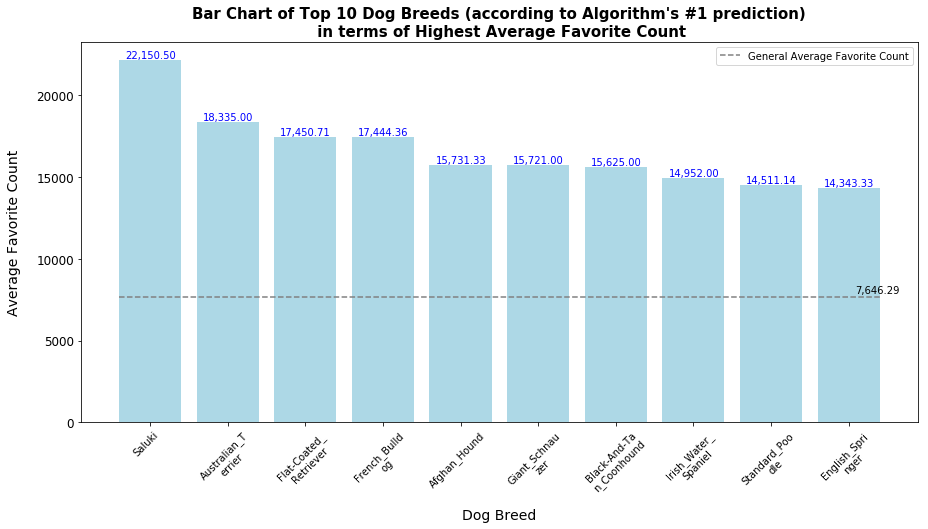

In [316]:
# Let's plot our bar chart
x = top10_breed_fc.dog_breed
y = top10_breed_fc.favorite_count
title = 'Bar Chart of Top 10 Dog Breeds (according to Algorithm\'s #1 prediction)\n in terms of Highest Average Favorite Count'
func_bar1(x, y, title, 'Dog Breed', 'Average Favorite Count', 0.32, 110, 12, avg_fc_db, 'General Average Favorite Count')

In [317]:
# Let's get the "Saluki" average favorite count
sa_avg_fc = top10_breed_fc[top10_breed_fc['dog_breed']=="Saluki"].favorite_count

# Let's calculate how much higher is its average compared to the general mean
(sa_avg_fc - avg_fc_db) / avg_fc_db * 100

0    189.689447
Name: favorite_count, dtype: float64

In the Bar Chart above we can see that, within the WeRateDogs rating Tweets, Saluki (according to Algorithm's #1 prediction) is the dog breed that received the Highest Average Favorite Count, even 189% higher than the general mean.

#### 10.	Which dog stages receive the highest average retweet count?

In [318]:
# Let's get the dog stage's general average retweet count
mean = df.groupby('dog_stage').retweet_count.mean().mean()
mean

5802.6018244186671

In [319]:
# Let's get the dog stages' average retweet count
table = df.groupby('dog_stage').retweet_count.mean().sort_values(ascending=False).reset_index()
table

,dog_stage,retweet_count
0,"doggo,puppo",17314.000000
1,doggo,6968.404255
2,puppo,6025.944444
3,"doggo,pupper",5060.800000
4,floofer,3547.562500
5,"doggo,floofer",3052.000000
6,None,2276.600170
7,pupper,2175.503226


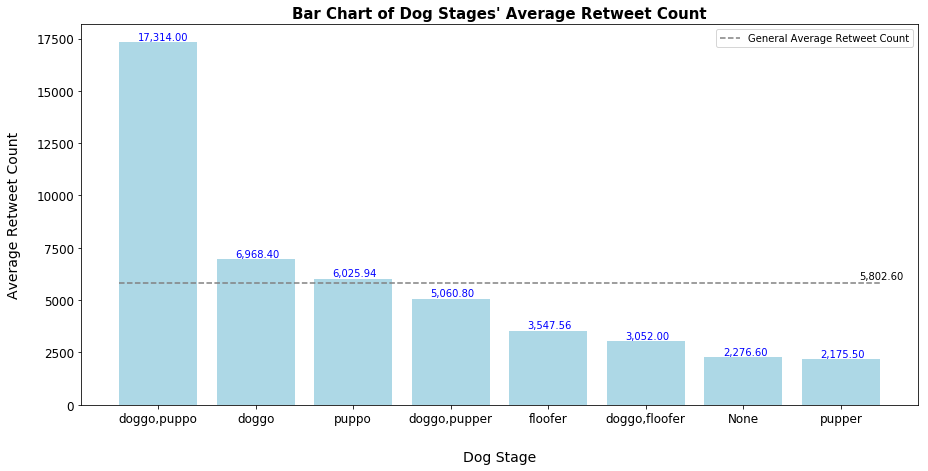

In [320]:
# Let's plot our bar chart
x = table.dog_stage
y = table.retweet_count
title = 'Bar Chart of Dog Stages\' Average Retweet Count'
func_bar1(x, y, title, 'Dog Stage', 'Average Retweet Count', 0.21, 110, 13, mean, 'General Average Retweet Count')

In [321]:
# Let's get the "doggo,puppo" average retweet count
top_rc = table[table['dog_stage']=="doggo,puppo"].retweet_count

# Let's calculate how much higher is its average compared to the general mean
(top_rc - mean) / mean * 100

0    198.383389
Name: retweet_count, dtype: float64

In the Bar Chart above we can see that, within the WeRateDogs rating Tweets, the combination of doggo and puppo is the dog stage that received the Highest Average Retweet Count, even 198% higher than the general mean.

#### 11.	Which dog stages receive the highest average favorite count?

In [322]:
# Let's get the dog stage's general average favorite count
mean = df.groupby('dog_stage').favorite_count.mean().mean()
mean

18117.553731149434

In [323]:
# Let's get the dog stages' average favorite count
table = df.groupby('dog_stage').favorite_count.mean().sort_values(ascending=False).reset_index()
table

,dog_stage,favorite_count
0,"doggo,puppo",44339.000000
1,puppo,21963.222222
2,doggo,20212.553191
3,"doggo,pupper",16161.000000
4,"doggo,floofer",15800.000000
5,floofer,11132.312500
6,None,8153.032258
7,pupper,7179.309677


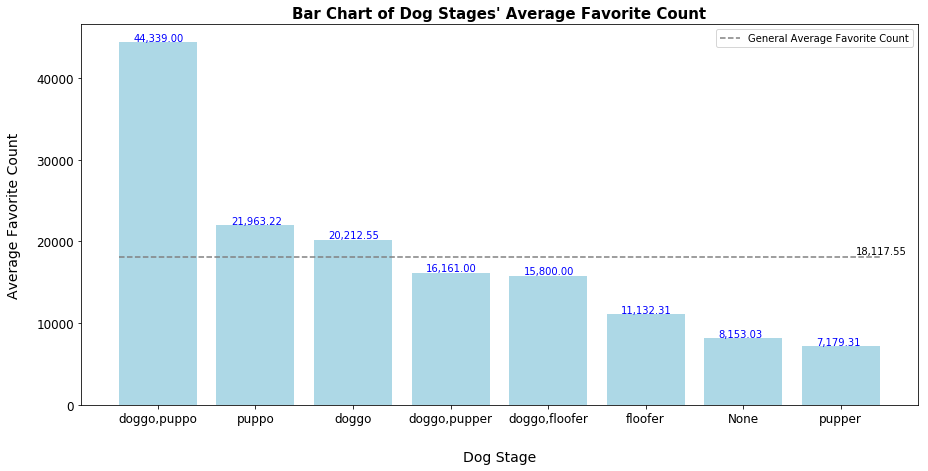

In [324]:
# Let's plot our bar chart
x = table.dog_stage
y = table.favorite_count
title = 'Bar Chart of Dog Stages\' Average Favorite Count'
func_bar1(x, y, title, 'Dog Stage', 'Average Favorite Count', 0.25, 150, 13, mean, 'General Average Favorite Count')

In [325]:
# Let's get the "doggo,puppo" average favorite count
top_fc = table[table['dog_stage']=="doggo,puppo"].favorite_count

# Let's calculate how much higher is its average compared to the general mean
(top_fc - mean) / mean * 100

0    144.729507
Name: favorite_count, dtype: float64

In the Bar Chart above we can see that, within the WeRateDogs rating Tweets, the combination of doggo and puppo is the dog stage that received the Highest Average Favorite Count, even 144% higher than the general mean.

#### 12.	Which dog names receive the highest average retweet count?

Since "dog_name" column has too many unique levels, let's just display the Top 10 dog names in terms of highest average retweet count.

In [326]:
# Let's get the dog name's general average retweet count
mean = df.groupby('dog_name').retweet_count.mean().mean()
mean

2379.8856210470972

In [327]:
# Let's get the Top 10 dog names in terms of highest average retweet count
top10 = df.groupby('dog_name').retweet_count.mean().sort_values(ascending=False).head(10).reset_index()
top10

,dog_name,retweet_count
0,Stephan,56564.0
1,Duddles,40521.0
2,Jamesy,32873.0
3,Hurley,18575.0
4,Aja,17297.0
5,Lilly,16858.0
6,Canela,16361.0
7,Pipsy,16024.0
8,Bretagne,13250.0
9,Gary,11969.0


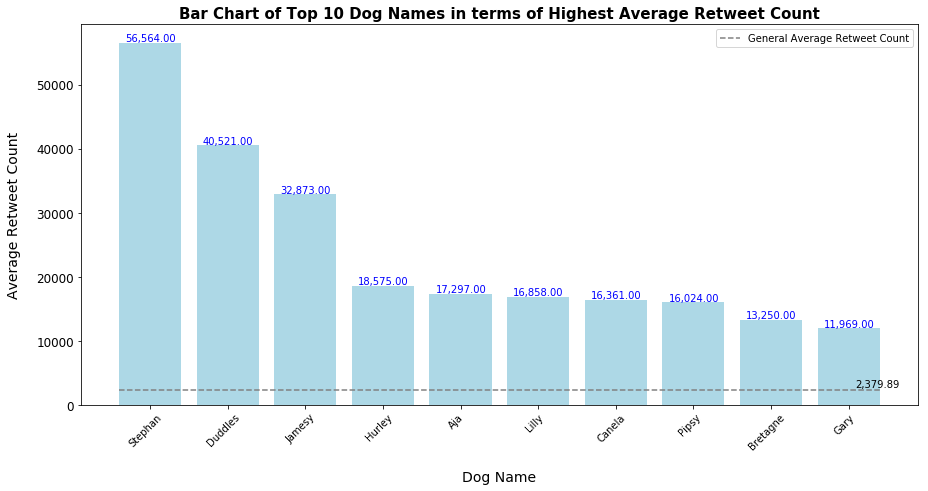

In [328]:
# Let's plot our bar chart
x = top10.dog_name
y = top10.retweet_count
title = 'Bar Chart of Top 10 Dog Names in terms of Highest Average Retweet Count'
func_bar1(x, y, title, 'Dog Name', 'Average Retweet Count', 0.32, 220, 8, mean, 'General Average Retweet Count')

In [329]:
# Let's get the "Stephan" average retweet count
top_rc = top10[top10['dog_name']=="Stephan"].retweet_count

# Let's calculate how much higher is its average compared to the general mean
(top_rc - mean) / mean

0    22.767529
Name: retweet_count, dtype: float64

In the Bar Chart above we can see that, within the WeRateDogs rating Tweets, Stephan is the dog name that received the Highest Average Retweet Count, even 22 times higher than the general mean.

#### 13.	Which dog names receive the highest average favorite count?

Since "dog_name" column has too many unique levels, let's just display the Top 10 dog names in terms of highest average favorite count.

In [330]:
# Let's get the dog name's general average favorite count
mean = df.groupby('dog_name').favorite_count.mean().mean()
mean

8644.6420575914926

In [331]:
# Let's get the Top 10 dog names in terms of highest average favorite count
top10 = df.groupby('dog_name').favorite_count.mean().sort_values(ascending=False).head(10).reset_index()
top10

,dog_name,favorite_count
0,Stephan,120302.0
1,Jamesy,116176.0
2,Duddles,98994.0
3,Aja,74322.0
4,Lilly,67117.0
5,Canela,64312.0
6,Pipsy,45449.0
7,Barney,44090.0
8,Gary,42178.5
9,Alfy,41935.0


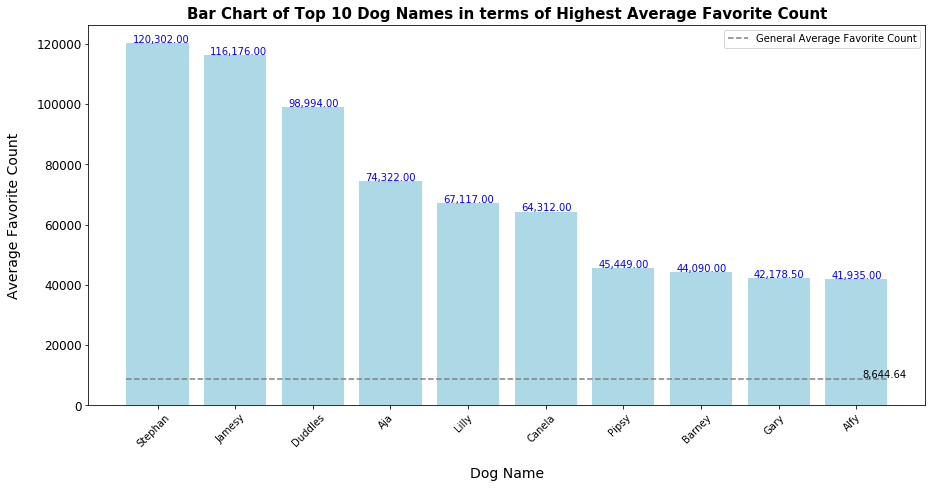

In [332]:
# Let's plot our bar chart
x = top10.dog_name
y = top10.favorite_count
title = 'Bar Chart of Top 10 Dog Names in terms of Highest Average Favorite Count'
func_bar1(x, y, title, 'Dog Name', 'Average Favorite Count', 0.32, 220, 7, mean, 'General Average Favorite Count')

In [333]:
# Let's get the "Stephan" average favorite count
top_fc = top10[top10['dog_name']=="Stephan"].favorite_count

# Let's calculate how much higher is its average compared to the general mean
(top_fc - mean) / mean

0    12.916366
Name: favorite_count, dtype: float64

In the Bar Chart above we can see that, within the WeRateDogs rating Tweets, Stephan is the dog name that received the Highest Average Favorite Count, even 12 times higher than the general mean.

#### 14.	Which day of the week has the highest average retweet count?

In [334]:
# Let's get the day of the week's general average retweet count
mean = df.groupby('day_of_week').retweet_count.mean().mean()
mean

2516.7612138240961

In [335]:
# Let's get the day of the week's average retweet count
table = df.groupby('day_of_week').retweet_count.mean().sort_values(ascending=False).reset_index()
table

,day_of_week,retweet_count
0,Saturday,3065.089385
1,Wednesday,2837.447236
2,Tuesday,2466.362319
3,Friday,2393.292683
4,Monday,2326.745614
5,Thursday,2265.339713
6,Sunday,2263.051546


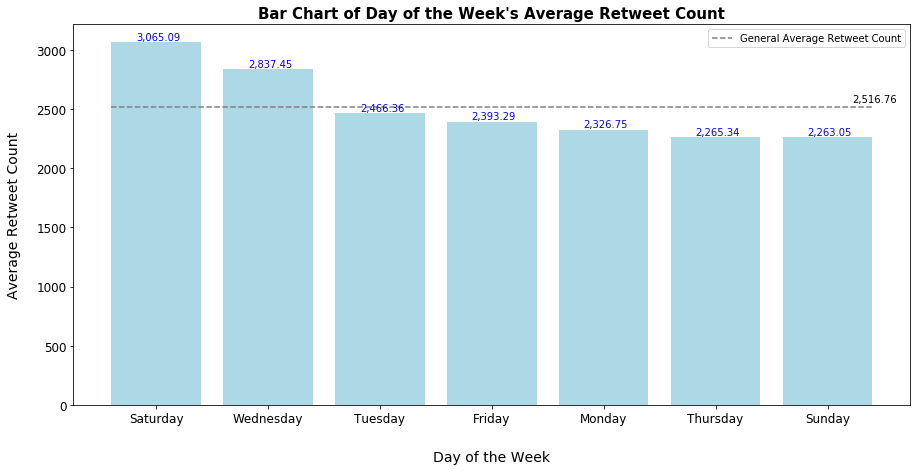

In [336]:
# Let's plot our bar chart
x = table.day_of_week
y = table.retweet_count
title = 'Bar Chart of Day of the Week\'s Average Retweet Count'
func_bar1(x, y, title, 'Day of the Week', 'Average Retweet Count', 0.18, 20, 9, mean, 'General Average Retweet Count')

In [337]:
# Let's get the "Saturday" average retweet count
top_rc = table[table['day_of_week']=="Saturday"].retweet_count

# Let's calculate how much higher is its average compared to the general mean
(top_rc - mean) / mean * 100

0    21.787056
Name: retweet_count, dtype: float64

In the Bar Chart above we can see that, within the WeRateDogs rating Tweets, Saturday is the day with the Highest Average Retweet Count, 22% higher than the general mean.

#### 15.	Which day of the week has the highest average favorite count?

In [338]:
# Let's get the day of the week's general average favorite count
mean = df.groupby('day_of_week').favorite_count.mean().mean()
mean

8739.3992257543414

In [339]:
# Let's get the day of the week's average favorite count
table = df.groupby('day_of_week').favorite_count.mean().sort_values(ascending=False).reset_index()
table

,day_of_week,favorite_count
0,Wednesday,9800.371859
1,Saturday,9761.837989
2,Tuesday,8777.033816
3,Friday,8455.990244
4,Monday,8266.842105
5,Thursday,8172.373206
6,Sunday,7941.345361


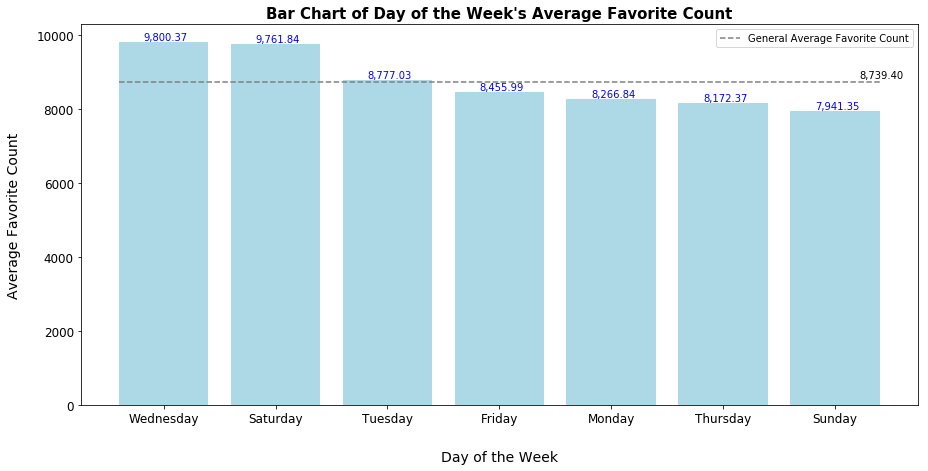

In [340]:
# Let's plot our bar chart
x = table.day_of_week
y = table.favorite_count
title = 'Bar Chart of Day of the Week\'s Average Favorite Count'
func_bar1(x, y, title, 'Day of the Week', 'Average Favorite Count', 0.18, 50, 9, mean, 'General Average Favorite Count')

In [341]:
# Let's get the "Wednesday" average favorite count
top_fc = table[table['day_of_week']=="Wednesday"].favorite_count

# Let's calculate how much higher is its average compared to the general mean
(top_fc - mean) / mean * 100

0    12.140109
Name: favorite_count, dtype: float64

In the Bar Chart above we can see that, within the WeRateDogs rating Tweets, Wednesday is the day with the Highest Average Favorite Count, 12% higher than the general mean.

#### 16.	Do weekend or weekday rate tweets receive the highest average retweet count?

In [342]:
# Let's get the general average retweet count for weekend and weekday
mean = df.groupby('weekend_weekday').retweet_count.mean().mean()
mean

2550.00620101099

In [343]:
# Let's get weekend and weekday's average retweet count
table = df.groupby('weekend_weekday').retweet_count.mean().sort_values(ascending=False).reset_index()
table

,weekend_weekday,retweet_count
0,weekend,2647.943700
1,weekday,2452.068702


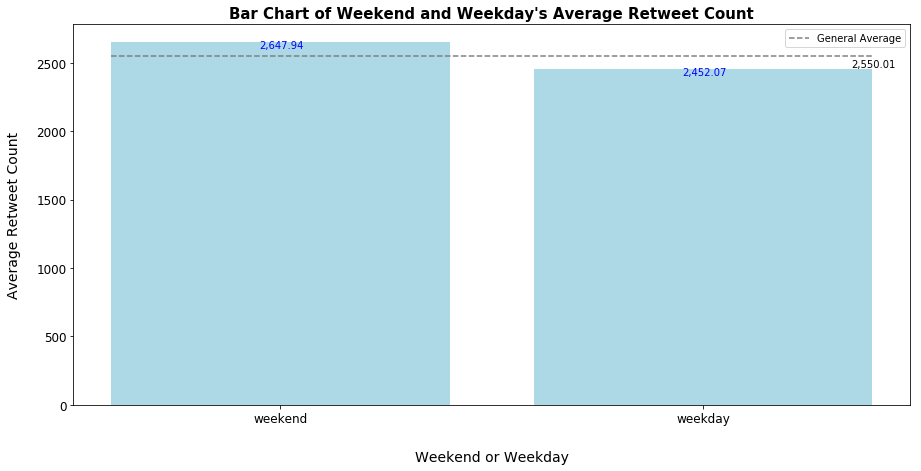

In [344]:
# Let's plot our bar chart
x = table.weekend_weekday
y = table.retweet_count
title = 'Bar Chart of Weekend and Weekday\'s Average Retweet Count'
func_bar1(x, y, title, 'Weekend or Weekday', 'Average Retweet Count', 0.05, -40, 9, mean, 'General Average')

In [345]:
# Let's get the "weekend" average retweet count
top = table[table['weekend_weekday']=="weekend"].retweet_count

# Let's calculate how much higher is Weekend's average compared to the general mean
(top - mean) / mean * 100

0    3.840677
Name: retweet_count, dtype: float64

In [346]:
# Let's get the "weekday" average retweet count
min = table[table['weekend_weekday']=="weekday"].retweet_count.values

# Let's calculate how much higher is Weekend's average compared to Weekday's average
(top - min) / min * 100

0    7.988153
Name: retweet_count, dtype: float64

In the Bar Chart above we can see that, WeRateDogs Weekends' Tweets have a higher Average Retweet Count than Weekdays Tweets. However, just 4% higher than the general mean and 8% higher than Weekdays' average.

#### 17.	Do weekend or weekday rate tweets receive the highest average favorite count?

In [347]:
# Let's get the general average favorite count for weekend and weekday
mean = df.groupby('weekend_weekday').favorite_count.mean().mean()
mean

8745.9780304115593

In [348]:
# Let's get weekend and weekday's average favorite count
table = df.groupby('weekend_weekday').favorite_count.mean().sort_values(ascending=False).reset_index()
table

,weekend_weekday,favorite_count
0,weekend,8814.986595
1,weekday,8676.969466


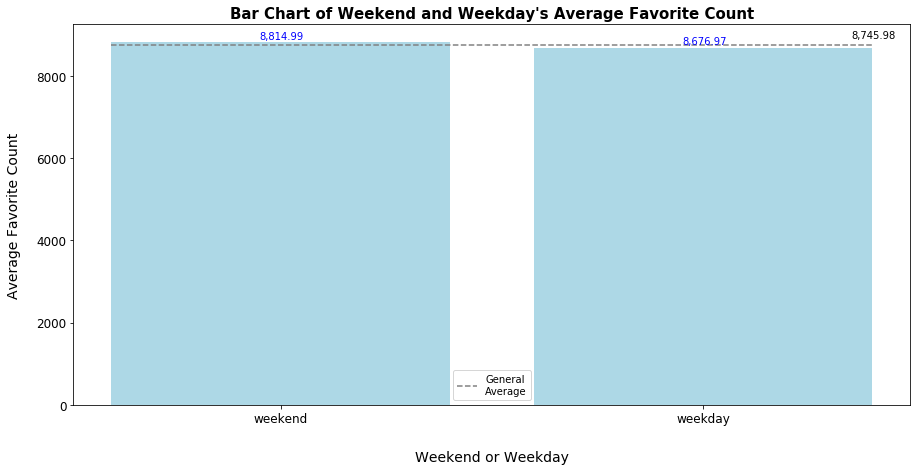

In [349]:
# Let's plot our bar chart
x = table.weekend_weekday
y = table.favorite_count
title = 'Bar Chart of Weekend and Weekday\'s Average Favorite Count'
func_bar1(x, y, title, 'Weekend or Weekday', 'Average Favorite Count', 0.05, 90, 9, mean, 'General\nAverage')

In [350]:
# Let's get the "weekend" average favorite count
top = table[table['weekend_weekday']=="weekend"].favorite_count

# Let's calculate how much higher is Weekend's average compared to the general mean
(top - mean) / mean * 100

0    0.789032
Name: favorite_count, dtype: float64

In [351]:
# Let's get the "weekday" average favorite count
min = table[table['weekend_weekday']=="weekday"].favorite_count.values

# Let's calculate how much higher is Weekend's average compared to Weekday's average
(top - min) / min * 100

0    1.590614
Name: favorite_count, dtype: float64

In the Bar Chart above we can see that, WeRateDogs Weekends' Tweets have a higher Average Favorite Count than Weekdays Tweets. However, just 0.8% higher than the general mean and 1.6% higher than Weekdays' average.

#### 18.	What properties are associated with higher favorite count Tweets?

We will first separate the Tweets with the highest favorite count. In order to do that, for our minimum cut we will use the median instead of the mean, as there are too many outliers with high values.

In [352]:
# Let's create a table of Tweets with higher favorite count
high_fav = df[df['favorite_count'] >= df['favorite_count'].median()]

# Let's check the filter worked. This should be 4130
(high_fav['favorite_count']).min()

4130

In [353]:
# Let's define a scatter matrix function
def func_scatter_matrix(X, title):
    axes = pd.plotting.scatter_matrix(X, alpha = 0.9, figsize = (16, 16), diagonal = 'kde', color='lightblue')
    plt.suptitle(title, y=0.9, fontsize=15, fontweight="bold")
    
    # Adding the corelation coefficient
    corr = X.corr().values
    for i, v in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, v].annotate("r: %.4f" %corr[i,v], (0.7, 0.8), xycoords='axes fraction', ha='center', va='center', color='black')
    
    # Setting up label's size
    if len(X.columns)>7:
        [plt.setp(item.yaxis.get_label(), 'size', 9) for item in axes.ravel()]
        [plt.setp(item.xaxis.get_label(), 'size', 9) for item in axes.ravel()]
    else:
        [plt.setp(item.yaxis.get_label(), 'size', 10) for item in axes.ravel()]
        [plt.setp(item.xaxis.get_label(), 'size', 10) for item in axes.ravel()]        
    return plt.show();

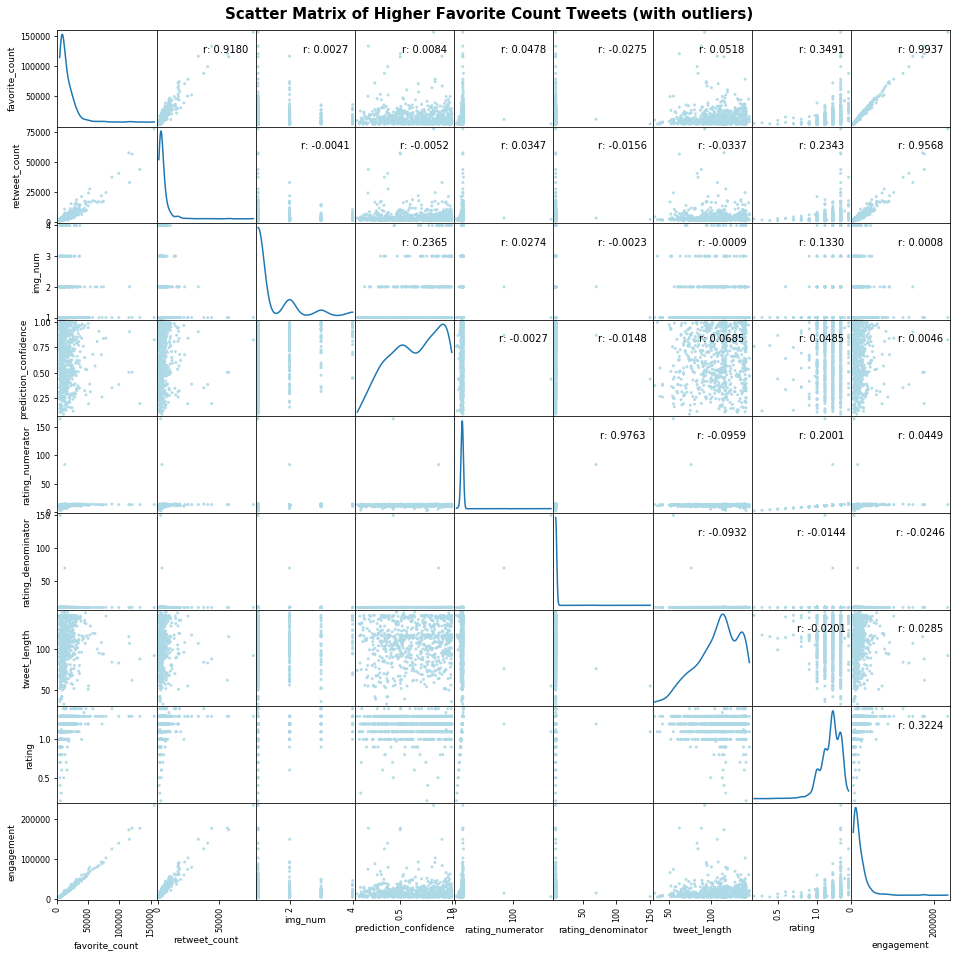

In [354]:
# Let's create a scatter matrix to analyze the quantitative variables of these higher favorite count Tweets
func_scatter_matrix(high_fav, 'Scatter Matrix of Higher Favorite Count Tweets (with outliers)')

In this scatter matrix, we can spot a strong linear positive correlation between the following variables:
- Favorite count vs Engagement (r: 0.9937)
- Rating's numerator vs Rating's denominator (r: 0.9763)
- Retweet count vs Engagement (r: 0.9568)
- Favorite count vs Retweet count (r: 0.9180)

Engagement is calculated as the sum of Favorite count and Retweet count, so the strong correlation between them was somewhat expected.
<br><br>
We then proceed to analyze the data without the outliers to check if it affects the results.

In [355]:
# Let's calculate the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

favorite_count            8839.000000
retweet_count             2289.000000
img_num                      0.000000
prediction_confidence        0.460537
rating_numerator             2.000000
rating_denominator           0.000000
tweet_length                43.000000
rating                       0.200000
engagement               11238.000000
dtype: float64


In [356]:
# Let's check the df shape
df.shape

(1421, 21)

In [357]:
# Let's select only the quantitative columns
num_col = ['favorite_count', 'retweet_count', 'img_num', 'prediction_confidence', 'rating_numerator', 'rating_denominator', 'tweet_length', 'rating', 'engagement'] 

# Let's create a table for Tweets without the outliers
df_wo_out = df[~((df[num_col] < (Q1 - 1.5 * IQR)) | (df[num_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Let's check the table was created successfully
df_wo_out.shape

(1049, 21)

Note that 372 rows considered outliers were dropped.

In [358]:
# Let's select only the highest favorite count Tweets
high_fav1 = df_wo_out[df_wo_out['favorite_count'] >= df['favorite_count'].median()]

# Let's check the filter worked. This should be 4130
(high_fav1['favorite_count']).min()

4130

Note that we still considered the median from the "df" table as our minimum high value, in order to make both scatter matrix comparable.

In [359]:
# Let's check the unique values in "high_fav1" table
high_fav1.nunique()

tweet_id                 438
timestamp                438
tweet_source               2
tweet_text               438
expanded_url             438
dog_name                 309
dog_stage                  7
favorite_count           428
language                   1
retweet_count            421
jpg_url                  438
img_num                    1
dog_breed                 90
prediction_confidence    438
rating_numerator           9
rating_denominator         1
tweet_length              90
rating                     9
engagement               432
day_of_week                7
weekend_weekday            2
dtype: int64

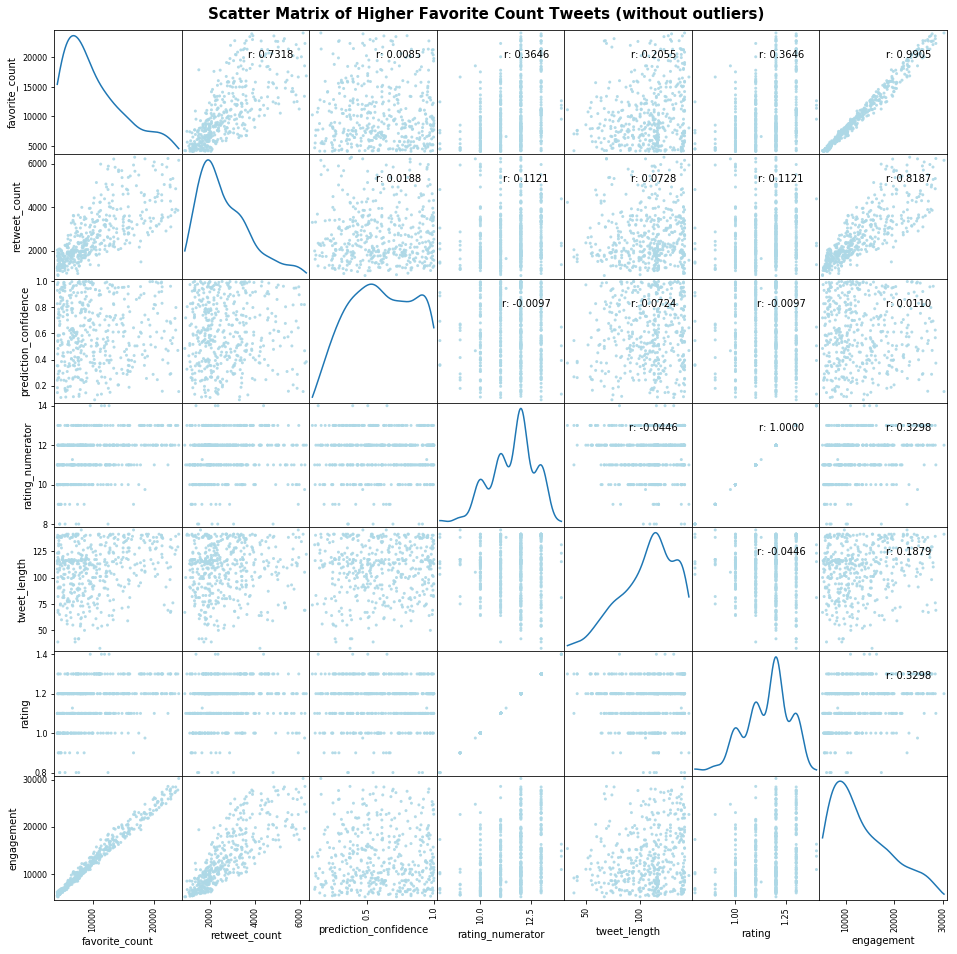

In [360]:
# Let's create a scatter matrix to analyze the quantitative variables 
# of these higher favorite count Tweets (without outliers), 
# except "img_num" and "rating_denominator" column to avoid single-value columns
num_col = ['favorite_count', 'retweet_count', 'prediction_confidence', 'rating_numerator', 'tweet_length', 'rating', 'engagement'] 
func_scatter_matrix(high_fav1[num_col], 'Scatter Matrix of Higher Favorite Count Tweets (without outliers)')

In this new scatter matrix, we can spot some strong linear correlations between the following variables:
- Rating's numerator vs Rating (r: 1)
- Favorite count vs Engagement (r: 0.9905)
- Retweet count vs Engagement (r: 0.8187)
- Favorite count vs Retweet count (r: 0.7318)

Rating is calculated by dividing Rating's numerator with Rating's denominator, so the strong correlation between them was expected. Likewise, Engagement is calculated as the sum of Favorite count and Retweet count, so the strong correlation between them was also expected. 

We notice that with or without outliers, there is a strong linear correlation between retweet count and higher favorite count Tweets.

18.1 Is retweet count associated with higher favorite count Tweets?<br>
There is a strong linear correlation between retweet count and higher favorite count.

18.2 Is rating's numerator associated with higher favorite count Tweets?<br>
There is not a linear correlation between rating's numerator and higher favorite count.

18.3 Is rating's denominator associated with higher favorite count Tweets?<br>
There is not a linear correlation between rating's denominator and higher favorite count.

18.4 Is rating associated with higher favorite count Tweets?<br>
There is not a linear correlation between rating and higher favorite count.

18.5 Is Tweet length associated with higher favorite count Tweets?<br>
There is not a linear correlation between Tweet's text length (without URL) and higher favorite count.

#### 19.	What properties are associated with higher retweet count Tweets?

We will first separate the Tweets with the highest retweet count. In order to do that, for our minimum cut we will use the median instead of the mean, as there are too many outliers with high values.

In [361]:
# Let's create a table of Tweets with higher retweet count
high_ret = df[df['retweet_count'] >= df['retweet_count'].median()]

# Let's check the filter worked. This should be 1278
(high_ret['retweet_count']).min()

1278

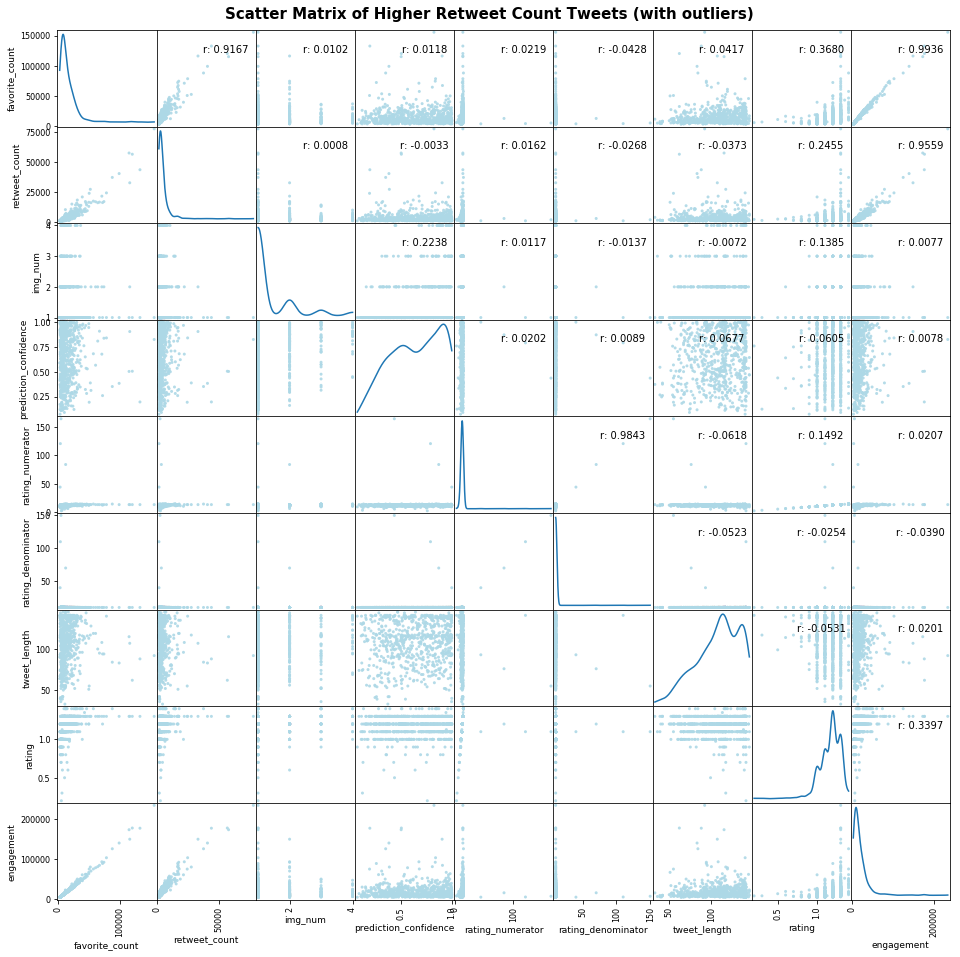

In [362]:
# Let's create a scatter matrix to analyze the quantitative variables of these higher retweet count Tweets
func_scatter_matrix(high_ret, 'Scatter Matrix of Higher Retweet Count Tweets (with outliers)')

In this scatter matrix, we can spot a strong linear positive correlation between the following variables:
- Favorite count vs Engagement (r: 0.9936)
- Retweet count vs Engagement (r: 0.9559)
- Rating's numerator vs Rating's denominator (r: 0.9843)
- Favorite count vs Retweet count (r: 0.9167)

Engagement is calculated as the sum of Favorite count and Retweet count, so the strong correlation between them was somewhat expected.
<br><br>
We then proceed to analyze the data without the outliers to check if it affects the results.

In [363]:
# Let's select only the highest retweet count Tweets
high_ret1 = df_wo_out[df_wo_out['retweet_count'] >= df['retweet_count'].median()]

# Let's check the filter worked. This should be 1278
(high_ret1['retweet_count']).min()

1278

Note that we still considered the median from the "df" table as our minimum high value, in order to make both scatter matrix comparable.

In [364]:
# Let's check the unique values in "high_ret1" table
high_ret1.nunique()

tweet_id                 442
timestamp                442
tweet_source               3
tweet_text               442
expanded_url             442
dog_name                 314
dog_stage                  7
favorite_count           433
language                   1
retweet_count            419
jpg_url                  442
img_num                    1
dog_breed                 88
prediction_confidence    442
rating_numerator           9
rating_denominator         1
tweet_length              93
rating                     9
engagement               438
day_of_week                7
weekend_weekday            2
dtype: int64

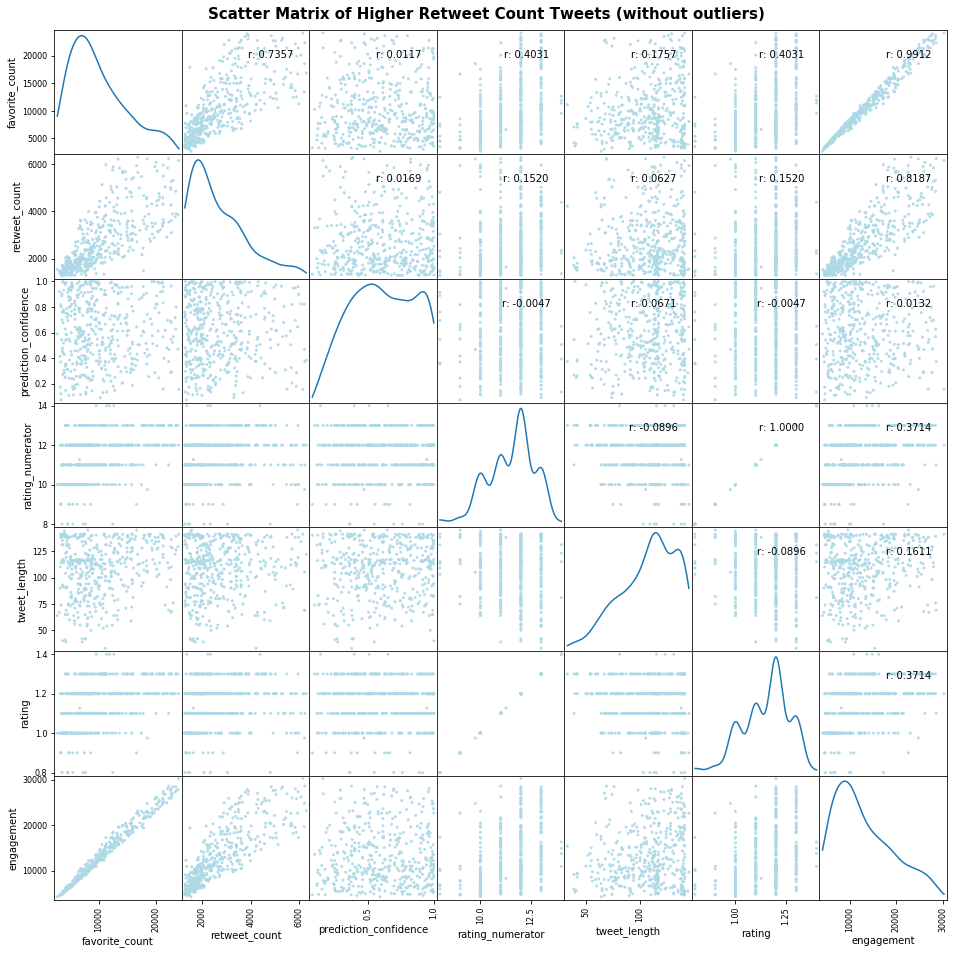

In [365]:
# Let's create a scatter matrix to analyze the quantitative variables 
# of these higher favorite count Tweets (without outliers), 
# except "img_num" and "rating_denominator" column to avoid single-value columns
num_col = ['favorite_count', 'retweet_count', 'prediction_confidence', 'rating_numerator', 'tweet_length', 'rating', 'engagement'] 
func_scatter_matrix(high_ret1[num_col], 'Scatter Matrix of Higher Retweet Count Tweets (without outliers)')

In this new scatter matrix, we can spot some strong linear correlations between the following variables:
- Rating's numerator vs Rating (r: 1)
- Favorite count vs Engagement (r: 0.9912)
- Retweet count vs Engagement (r: 0.8187)
- Favorite count vs Retweet count (r: 0.7357)

Rating is calculated by dividing Rating's numerator with Rating's denominator, so the strong correlation between them was expected. Likewise, Engagement is calculated as the sum of Favorite count and Retweet count, so the strong correlation between them was also expected. 

We notice that with or without outliers, there is a strong linear correlation between favorite count and higher retweet count Tweets.

19.1 Is favorite count associated with higher retweet count Tweets?<br>
There is a strong linear correlation between favorite count and higher retweet count.

19.2 Is rating's numerator associated with higher retweet count Tweets?<br>
There is not a linear correlation between rating's numerator and higher retweet count.

19.3 Is rating's denominator associated with higher retweet count Tweets?<br>
There is not a linear correlation between rating's denominator and higher retweet count.

19.4 Is rating associated with higher retweet count Tweets?<br>
There is not a linear correlation between rating and higher retweet count.

19.5 Is Tweet length associated with higher retweet count Tweets?<br>
There is not a linear correlation between Tweet's text length (without URL) and higher retweet count.

***

## [Conclusions](#conclusions)

For our clean dataset (Rating Tweets of WeRateDog of one single dog and between November 15, 2015 and August 1st, 2017), we can conclude the following:


- Wednesday is the day with the Highest Average Favorite Count, 12% higher than the general mean.
- Saturday is the day with the Highest Average Retweet Count, 22% higher than the general mean.
- Stephan is the dog name that received the Highest Average Favorite Count (12 times higher than the general mean) and the Highest Average Retweet Count (22 times higher than the general mean).
- The combination of doggo and puppo is the dog stage that received the Highest Average Favorite Count (144% higher than the general mean) and the Highest Average Retweet Count (198% higher than the general mean).
- Saluki (according to Algorithm's #1 prediction) is the dog breed that received the Highest Average Favorite Count, even 189% higher than the general mean.
- Standard Poodle (according to Algorithm's #1 prediction) is the dog breed that received the Highest Average Retweet Count, even 176% higher than the general mean.
- "Pupper" stage has received the greatest Average Monthly Engagement (retweet count plus favorite count) among other dog stages mentioned in WeRateDogs rating Tweets through the months.
- WeRateDogs Tweets' Monthly Favorite Count has increased through the time, increasing its monthly count from 2,883 in December 2015 to 29,820 in July 2017 (9 times higher).
- WeRateDogs Tweets' Monthly Retweet Count has increased through the time, increasing its monthly count from 1,159 in December 2015 to 6,135 in July 2017 (4 times higher).
- WeRateDogs' Monthly Tweet Count has decreased through the time, decreasing its monthly count from 234 in December 2015 to 43 in July 2017 (82% less).
- WeRateDogs Tweets' Weekly Favorite Count has increased through the time, increasing its weekly count from 880 in the second week of November 2015 to 28,798 in the second week of July 2017.
- WeRateDogs Tweets' Weekly Retweet Count has increased through the time, increasing its weekly count from 181 in the second week of November 2015 to 5,848 in the second week of July 2017.
- The dog breed most included in the WeRateDogs' rating Tweets, according to the Algorithm's #1 prediction, was Golden Retriever with 133 Tweets (9%). This dog breed was mentioned 9 times more than the general average, according to the algorithm.
- Most WeRateDogs' rating Tweets did not include a dog name (25%). However, "Cooper" is the dog name most included with 11 Tweets (0.77%). This dog name was mentioned 4 times more than the general average.
- Most of the Tweets do not have a dog stage mentioned in it (83%). Out of the rating Tweets who do have a dog stage, the most prominent one is pupper with 155 Tweets (11%).
- "None" dog stage Tweets were the most predominant (with highest amount of Tweets) through the months.
- WeRateDogs Weekends' Tweets have a higher Average Favorite Count than Weekdays Tweets. However, just 1.6% higher than Weekdays' average.
- WeRateDogs Weekends' Tweets have a higher Average Retweet Count than Weekdays Tweets. However, just 8% higher than Weekdays' average.
- The majority of Algorithm's Breed #1 Predictions of WeRateDogs Tweets (between 25% and 75% percentile) had a confidence between 39% and 85%. 
- The majority of Tweets (between 25% and 75% percentile) had a rating's numerator between 10 and 12. 
- The majority of Tweets (between 25% and 75% percentile) had a rating's denominator of 10. 
- The majority of Tweets (between 25% and 75% percentile) had a rating between 1 and 1.2.
- The majority of Tweets (between 25% and 75% percentile) had a retweet count between 592 and 2,881. 
- The majority of Tweets (between 25% and 75% percentile) had a favorite count between 2,044 and 10,883. 
- The majority of Tweets (between 25% and 75% percentile) used the first image for the breed prediction. 
- The majority of Tweets (between 25% and 75% percentile) had a Text Length between 94 and 137. 
- Most WeRateDogs' rating Tweets are in English, with 1416 Tweets (99.6%). 
- Most WeRateDogs' rating Tweets come from iPhone, with 1398 Tweets (98%). 
- The highest favorite count a WeRateDogs Tweet has ever received is 155,733.
- The highest retweet count a WeRateDogs Tweet has ever received is 77,599.
- The highest Rating's Numerator a WeRateDogs Tweet has ever given is 165.
- The highest Rating's Denominator a WeRateDogs Tweet has ever given is 150.
- The highest Rating a WeRateDogs Tweet has ever given is 1.4.
- The average WeRateDogs Tweet's Text Length, in our clean dataset, is 111.29.
- The highest "Algorithm's Breed Prediction Confidence of WeRateDogs Tweets" is 99.9956%.
- There is a strong linear correlation between favorite count and higher retweet count.
- There is a strong linear correlation between retweet count and higher favorite count.

Limitations of this Project:
- This project does not include sentiment analysis or natural language process. However, a NLP and text analysis would be insightful for further analysis.
- There is no information about the follower count through the years in the provided datasets, so the project did not include that analysis.
- The analysis is performed only on the Tweets between November 15, 2015 and August 1st, 2017, since the algorithm for image prediction was not provided to expand the analysis beyond August 1st, 2017.
- Even though there was an effort to find most names in the data, we are not certain to have found them all because of how un-structured the Tweets' text is. So analysis might not be 100% accurate regarding the "name" column.
- Since the `tweet_predictions` data only included the breed prediction of one dog, the Tweets with more than one dog names or ratings were dropped when found during the cleaning process.
- Some Tweets might include more than one dog name, but the project only considered the first name mentioned in the Tweet's text to facilitate the cleaning process.
- A total of 25 Tweets could not be retrieved during the Twitter API query, probably because they were deleted. Therefore the `tweets_info` table ended up having only 2331 rows, instead of the 2356 rows of the `twitter_archive` table.
- The `tweet_predictions` table did not have 16 Tweets of the `tweets_info`.
- In the data provided, there is no information about dog gender or audience, so that analysis was not included.
- We chose the "auto" method to select the number of bins of histogram charts. These auto method chooses the maximum number of bins between the "Sturges" and "Freedman Diaconis" estimators. However, since there is not one single best method to find the number of bins of a histogram, the graph could look different with a different method to choose the number of bins.
- For questions #18 and #19 we only analyzed the linear correlation of data, however there are other types of correlations we could have used, but they are not part of the scope for this project.

Other considerations:
- Even though the dogtionary indicated that floof could be a noun (synonym to floofer) and an adjective (refering to dog's fur), we used its noun definition to look for "floof" strings in "text" column of `twitter_archive` table.
- Regarding the tidyness issues, we considered that `twitter_archive`, `tweets_info` and `tweet_predictions` should be a single table because they refer to a same observational unit: Tweet, being it factual information or prediction using an algorithm.
- The analysis was only based on original Tweets of the WeRateDogs account, retweets or replies were discarted.
- The Twitter API was queried on June 14, 2020. So the results will be based on the info up to that date (p.e: retweet count and favorite count may vary in future).
- We also considered  puppers, doggos, puppos, floofs and floofers for our "dog_stage" column as part of pupper, doggo, puppo and floofer categories.
- We decided to drop all rows without dogs in them. In Cleaning Step #7 we noticed that Tweets without dogs are present in low numerators. But, for a programmatic approach to remove them, we used "p1_dog" column instead of reviewing them manually one by one. We removed all rows with "p1_dog" equal to False because they were our best option to detect Tweets without dogs in them and also, since we were analyzing breeds, we needed to clean rows with other results in "p1". Additionally, we used "p1_dog" instead of "p2_dog" or "p3_dog" because p1 columns represent the algorithm's #1 prediction.
- We considered "dog_stage" column as a category type because it had few unique values, in comparison to "dog_breed" or "dog_name" columns.
- We didn't include a time-evolution analysis of "dog_breed" or "dog_name" columns because since they had too many categories the analysis wouldn't be so useful or clean.

References:
<br>
- Markdown Language: https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd
- Reading from a Json file: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- Info about Tweets: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
- Requests library: https://pypi.org/project/requests/
- Tweepy library: http://www.tweepy.org/
- Query from Twitter API: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- Dealing with None and NaN: https://medium.com/analytics-vidhya/dealing-with-missing-values-nan-and-none-in-python-6fc9b8fb4f31
- Replacing NaN with string values: https://stackoverflow.com/questions/45826792/replacing-nans-in-a-dataframe-with-a-string-value
- Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/reference/
- Mapping functions in pandas: https://stackoverflow.com/questions/24476338/could-we-use-a-multi-branch-condition-on-a-lambda-python-pandas-function
- Getting index of rows: https://stackoverflow.com/questions/18358938/get-row-index-values-of-pandas-dataframe-as-list
- Extracting multiple values from string in pandas: https://stackoverflow.com/questions/56986656/python-extract-multiple-values-from-string-in-pandas-df
- Deleting specific value from array: https://stackoverflow.com/questions/42557558/how-to-delete-specific-values-from-numpy-ndarray
- Deleting elements from array: https://stackoverflow.com/questions/40055835/removing-elements-from-an-array-that-are-in-another-array
- Create day of week column: https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
- Create column based on string: https://stackoverflow.com/questions/54135085/create-new-column-based-on-string
- Group by month and year: https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
- Convert array to dataframe: https://stackoverflow.com/questions/45264141/convert-array-into-dataframe-in-python
- Language Code Identifier: https://github.com/libyal/libfwnt/wiki/Language-Code-identifiers
- Formatting datetime in graph: https://stackoverflow.com/questions/40023746/plotting-of-pandas-dataframe-and-xaxis-as-timestamp-produces-empty-plot
- Convert date format in pandas: https://stackoverflow.com/questions/40744322/convert-month-day-year-to-month-year-with-python-pandas
- Format y-axis for float values: https://stackoverflow.com/questions/29188757/matplotlib-specify-format-of-floats-for-tick-labels
- Round-up integer to the next hundred: https://stackoverflow.com/questions/8866046/python-round-up-integer-to-next-hundred
- Setting up default parameters in plots: https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
- Label size in scatter matrix: https://stackoverflow.com/questions/32121381/label-size-in-panda-plot-scatter-matrix
- Analyzing a Movie Dataset (own work): https://github.com/andrea-villanca/Udacity-DAND/tree/master/Analyzing-a-movie-dataset